<center> </center>
<center></center>
<center></center>
<center></center>

<br>
<br>
<br><center><center></center>
<br>
<br>
<br>
<br><center>
<br><center>Сидоренко Наталья</center>
<br><center>Анализ данных по продажам
<br><center>велосипедов, запчастей к ним,
<br><center>аксессуаров и спортивной одежды,
<br><center>2014 - 2016 гг.


<br>

<br>
<br>
<br>
<br>
<br>
<center>

### Цель исследования:

Цель данного проекта - исследовательский анализ продаж на основании датасетов из «Кейса-31»; оценка влияния признаков покупателей, географии, ассортимента товаров на продажи; возможная выработка рекомендаций по их оптимизации.

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Машинное обучение</a><br>
<a href=#5>4.  Выводы</a><br>  

### КЕЙС-31

Исследуемый датасет состоит из четырех эксель-таблиц:


*   'Customer' (21 признак (6 числовых и 15 категориальных); количество строк: 18484))
*   'Product' (13 признаков (4 числовых и 9 категориальных); количество строк: 606))
*   'Sales' (13 признаков (10 числовых и 3 категориальных); количество строк: 58189))
*   'Territories' (6 признаков (1 числовой и 5 категориальных); количество строк: 11))

- содержит данные по продажам велосипедов, запчастей и аксессуаров к ним, а также спортивной одежды.

### Столбцы данных
#### Таблица 'Customer':
- Customerkey- уникальный номер покупателя. <br>
- FirstName- имя покупателя. <br>
- LastName- фамилия покупателя. <br>
- FullName- фамилия, имя покупателя. <br>
- BirthDate — дата рождения.<br>
- MaritalStatus — семейное положение.<br>
- Gender - пол.<br>
- YearlyIncom - годовой доход.<br>
- TotalChildren - количество детей.<br>
- NumberChildrenAtHome - количество детей, проживающих совместно с покупателем.<br>
- Education - образование покупателя.<br>
- Occupation - сфера профессиональной деятельности.<br>
- HouseOwnerFlag - владение недвижимостью.<br>
- NumberCarsOwned - количество автомобилей.<br>
- AdressLine1 - адрес покупателя.<br>
- DateFirstPurchase - дата первой покупки покупатея.<br>
- CommuteDistance - расстояние от дома до города в милях.<br>
- CustomerCity - город проживания покупателя.<br>
- CustomerStateСode - индекс места проживания.<br>
- CustomerState - штат проживания.<br>
- CustomerCountry - страна проживания.<br>
#### Таблица 'Product':
- ProductKey - код товара.<br>
- ProducName — наименование товара.<br>
- Sub Category — подкатегория товара. <br>
- Category — категория товара. <br>
- StandardCost — себетоимость товара.<br>
- Color — цвет товара. <br>
- ListPrice — отпускная цена.<br>
- DaysToManufacture - срок производства товара, дней.<br>
- ProductLine — продуктовая линейка.<br>
- ModelName — модельный ряд. <br>
- Photo — фото.<br>
- ProductDescription — описание товара.<br>
- StartDate — старт продаж.<br>
#### Таблица 'Sales':
- ProductKey - код товара.<br>
- OrderDate - дата заказа.<br>
- ShipDate - дата отгрузки.<br>
- Customerkey - уникальный номер покупателя. <br>
- PromotionKey — промокод. <br>
- SalesTerritoryKey — код региона продажи. <br>
- SalesOrderKey — код заказа.<br>
- SalesOrderLineNumber — номер строки заказа, присваиваемый новому клиенту. <br>
- OrderQuantity — количество товаров в заказе.<br>
- UnitPrice — цена за единицу товара.<br>
- TotalProductCost — себестоимость товара. <br>
- SalesAmount — выручка.<br>
- TaxAmt — налоги.<br>
Валюта стоимостных показателей датасета не указана (скорее всего, это фунты, т.к. магазин английский), проставлять ее в таблицах пока не будем. <br>
#### Таблица 'Territories':
- SalesTerritoryKey — код региона продажи. <br>
- Region — регион доставки. <br>
- Country — страна доставки. <br>
- Group — территориальная единица. <br>
- RegionImage — фото региона. <br>
- RegionInfo — информация о регионе доставки из Википедии. <br>

## 1.Предобработка данных

### Загрузка необходимых библиотек, датасетов

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.stats as st
import warnings

Подключаем библиотеки и загружаем первый датасет - "Customer"

In [ ]:
df1 = pd.read_excel("https://docs.google.com/spreadsheets/d/19B5jixu5gQeKYI8L8MZInJUCz6jeaq8C/export?format=xlsx")

In [ ]:
df1.head(2).T

0              1
CustomerKey                     11000          11001
FirstName                         Jon         Eugene
LastName                         Yang          Huang
FullName                    Yang, Jon  Huang, Eugene
BirthDate                  1966-04-08     1965-05-14
MaritalStatus                       M              S
Gender                              M              M
YearlyIncome                    90000          60000
TotalChildren                       2              3
NumberChildrenAtHome                0              3
Education                   Bachelors      Bachelors
Occupation               Professional   Professional
HouseOwnerFlag                      1              0
NumberCarsOwned                     0              1
AddressLine1          3761 N. 14th St     2243 W St.
DateFirstPurchase          2005-07-22     2005-07-18
CommuteDistance             1-2 Miles      0-1 Miles
CustomerCity              Rockhampton        Seaford
CustomerStateCode                 QLD            VIC
CustomerState              Queensland       Victoria
CustomerCountry             Australia      Australia

In [ ]:
#ищем пропуски
MissingValue = df1.isnull().sum().sort_values(ascending = False)
Percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

MissingValue  Percent
CustomerKey                      0      0.0
Occupation                       0      0.0
CustomerState                    0      0.0
CustomerStateCode                0      0.0
CustomerCity                     0      0.0
CommuteDistance                  0      0.0
DateFirstPurchase                0      0.0
AddressLine1                     0      0.0
NumberCarsOwned                  0      0.0
HouseOwnerFlag                   0      0.0
Education                        0      0.0
FirstName                        0      0.0
NumberChildrenAtHome             0      0.0
TotalChildren                    0      0.0
YearlyIncome                     0      0.0
Gender                           0      0.0
MaritalStatus                    0      0.0
BirthDate                        0      0.0
FullName                         0      0.0
LastName                         0      0.0
CustomerCountry                  0      0.0

В первой таблице пропусков нет. Для дальнейшего анализа столбцы "AddressLine1", "CustomerStateCode", "FirstName", "LastName" нам не понадобятся - удаляем, чтобы не перепроверять столбец "FullName", а также убрать в нем запятую между именем и фамилией, объединим в него столбцы 'FirstName'и  'LastName', перезапишем. Значения столбца "BirthDate" переводим в возраст в годах на дату начала продаж согласно датасету (2014-01-01). Значения в столбце "CommuteDistance" приводим к средним расстояниям, удаляем из него размерность "Miles". Столбцы "MaritalStatus" и "Gender" переводим в числовой формат, заменив в первом случае М на 1 и S на 0, во втором - М на 1 и F на 0. Проверим форматы столбцов, если нужно преобразуем.

In [ ]:
df1['FullName'] = df1['FirstName'].str.cat(df1['LastName'],sep=" ")

In [ ]:
df1['BirthDate']= pd.to_datetime(df1.BirthDate)
Now  = '2014-01-01'
Now=pd.to_datetime(Now)
from datetime import date
def calculateAge(birthday):
    age = Now.year - birthday.year - ((Now.month, Now.day)<(birthday.month, birthday.day))
    return age
df1['age'] = df1['BirthDate'].apply(calculateAge)

In [ ]:
df1.drop(['FirstName', 'LastName','CustomerStateCode', "AddressLine1", 'BirthDate'], axis= 1 , inplace= True)

In [ ]:
df1['CommuteDistance'] = [x.replace(' Miles','') for x in df1['CommuteDistance']]
df1['CommuteDistance'] = [x.replace('0-1','0.5') for x in df1['CommuteDistance']]
df1['CommuteDistance'] = [x.replace('1-2','1.5') for x in df1['CommuteDistance']]
df1['CommuteDistance'] = [x.replace('2-5','3.5') for x in df1['CommuteDistance']]
df1['CommuteDistance'] = [x.replace('5-10','7.5') for x in df1['CommuteDistance']]
df1['CommuteDistance'] = [x.replace('10+','10') for x in df1['CommuteDistance']]

In [ ]:
df1['MaritalStatus'] = [x.replace('M','1') for x in df1['MaritalStatus']]
df1['MaritalStatus'] = [x.replace('S','0') for x in df1['MaritalStatus']]

In [ ]:
df1['Gender'] = [x.replace('M','1') for x in df1['Gender']]
df1['Gender'] = [x.replace('F','0') for x in df1['Gender']]

In [ ]:
df1['CommuteDistance'] = df1['CommuteDistance'].astype(np.float64)

In [ ]:
df1['MaritalStatus'] = df1['MaritalStatus'].astype(np.int64)
df1['Gender'] = df1['Gender'].astype(np.int64)

In [ ]:
df1["DateFirstPurchase"]=pd.to_datetime(df1['DateFirstPurchase'])

Переименовываем столбы для удобства дальнейшей работы и унификации.

In [ ]:
df1.columns = ['customer_id', 'client_name', 'm-status', 'gender',
       'y_income', 'children', 'children_home', 'education',
       'occupation', 'house', 'cars', 'first_purchase', 'distance', 'city', 'state','country', 'age']

In [ ]:
df1.describe()

customer_id      m-status        gender       y_income      children  \
count  18484.000000  18484.000000  18484.000000   18484.000000  18484.000000   
mean   20241.500000      0.541604      0.505897   57305.777970      1.844352   
min    11000.000000      0.000000      0.000000   10000.000000      0.000000   
25%    15620.750000      0.000000      0.000000   30000.000000      0.000000   
50%    20241.500000      1.000000      1.000000   60000.000000      2.000000   
75%    24862.250000      1.000000      1.000000   70000.000000      3.000000   
max    29483.000000      1.000000      1.000000  170000.000000      5.000000   
std     5336.015523      0.498280      0.499979   32285.841703      1.612408   

       children_home         house          cars  \
count   18484.000000  18484.000000  18484.000000   
mean        1.004058      0.676369      1.502705   
min         0.000000      0.000000      0.000000   
25%         0.000000      0.000000      1.000000   
50%         0.000000      1.000000      2.000000   
75%         2.000000      1.000000      2.000000   
max         5.000000      1.000000      4.000000   
std         1.522660      0.467874      1.138394   

                      first_purchase      distance           age  
count                          18484  18484.000000  18484.000000  
mean   2007-08-19 06:10:59.078121472      3.698712     51.420905  
min              2005-07-01 00:00:00      0.500000     33.000000  
25%              2007-04-15 00:00:00      0.500000     43.000000  
50%              2007-11-05 00:00:00      1.500000     50.000000  
75%              2008-03-13 00:00:00      7.500000     59.000000  
max              2008-07-31 00:00:00     10.000000    103.000000  
std                              NaN      3.495103     11.249800

Загружаем вторую таблицу


In [ ]:
df2 = pd.read_excel("https://docs.google.com/spreadsheets/d/1zMDMU--rJ6RFms_KaFjeVwdr92BCaKsT/export?format=xlsx")

In [ ]:
df2.head(2).T

0  \
ProductKey                                                          1   
ProductName                                           Adjustable Race   
SubCategory                                                       NaN   
Category                                                          NaN   
StandardCost                                                      NaN   
Color                                                             NaN   
ListPrice                                                         NaN   
DaysToManufacture                                                   0   
ProductLine                                                       NaN   
ModelName                                                         NaN   
Photo               http://www.avising.com/me/LearnPBI/DataSources...   
ProductDescription                                                NaN   
StartDate                                         1998-06-01 00:00:00   

                                                                    1  
ProductKey                                                          2  
ProductName                                              Bearing Ball  
SubCategory                                                       NaN  
Category                                                          NaN  
StandardCost                                                      NaN  
Color                                                             NaN  
ListPrice                                                         NaN  
DaysToManufacture                                                   0  
ProductLine                                                       NaN  
ModelName                                                         NaN  
Photo               http://www.avising.com/me/LearnPBI/DataSources...  
ProductDescription                                                NaN  
StartDate                                         1998-06-01 00:00:00

In [ ]:
MissingValue = df2.isnull().sum().sort_values(ascending = False)
Percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

MissingValue    Percent
Color                        254  41.914191
ProductLine                  226  37.293729
StandardCost                 211  34.818482
ListPrice                    211  34.818482
ProductDescription           210  34.653465
SubCategory                  209  34.488449
Category                     209  34.488449
ModelName                    209  34.488449
ProductKey                     0   0.000000
ProductName                    0   0.000000
DaysToManufacture              0   0.000000
Photo                          0   0.000000
StartDate                      0   0.000000

В таблице видим внушительное количество пропусков по 8 столбцам, составлюющих от 34,5 до 41,9 процентов значений столбцов. Заменим пропуски в столбце 'Category' на 'Components' (по смыслу), в 'SubCategory' согласно значениям столбца 'ProductName', в столбцах 'ProductLine' и 'ModelName' пропуски заменим на 'unknown'.
Столбцы 'Photo', 'ProductDescription', 'Color' удалим, т.к. для анализа никакой ценности они не представляют. Проверим форматы. Заменим значения в столбцах "StandardCost" и "ListPrice" на минимальные значения 'Components' по столбцу 'Category', так как в основном пропущена себестоимость и цена болтов, гаек и т.п. запчастей, анализировать эти ценники мы в дальнейшем не будем, поэтому искать цены в интернете смысла нет. Скорее всего в дальнейшем после слияния таблиц эти столбцы будем удалять.

In [ ]:
df2["Category"] = df2['Category'].fillna("Components")

In [ ]:
df2['ProductLine'] = df2['ProductLine'].fillna("unknown")
df2['ModelName'] = df2['ModelName'].fillna("unknown")

In [ ]:
temp1 = df2[['ProductName','SubCategory']]
temp1[:60]

ProductName SubCategory
0            Adjustable Race         NaN
1               Bearing Ball         NaN
2            BB Ball Bearing         NaN
3      Headset Ball Bearings         NaN
4                      Blade         NaN
5                LL Crankarm         NaN
6                ML Crankarm         NaN
7                HL Crankarm         NaN
8            Chainring Bolts         NaN
9              Chainring Nut         NaN
10                 Chainring         NaN
11                Crown Race         NaN
12               Chain Stays         NaN
13                   Decal 1         NaN
14                   Decal 2         NaN
15                 Down Tube         NaN
16         Mountain End Caps         NaN
17             Road End Caps         NaN
18          Touring End Caps         NaN
19                  Fork End         NaN
20                 Freewheel         NaN
21             Flat Washer 1         NaN
22             Flat Washer 6         NaN
23             Flat Washer 2         NaN
24             Flat Washer 9         NaN
25             Flat Washer 4         NaN
26             Flat Washer 3         NaN
27             Flat Washer 8         NaN
28             Flat Washer 5         NaN
29             Flat Washer 7         NaN
30                Fork Crown         NaN
31     Front Derailleur Cage         NaN
32  Front Derailleur Linkage         NaN
33              Guide Pulley         NaN
34              LL Grip Tape         NaN
35              ML Grip Tape         NaN
36              HL Grip Tape         NaN
37        Thin-Jam Hex Nut 9         NaN
38       Thin-Jam Hex Nut 10         NaN
39        Thin-Jam Hex Nut 1         NaN
40        Thin-Jam Hex Nut 2         NaN
41       Thin-Jam Hex Nut 15         NaN
42       Thin-Jam Hex Nut 16         NaN
43        Thin-Jam Hex Nut 5         NaN
44        Thin-Jam Hex Nut 6         NaN
45        Thin-Jam Hex Nut 3         NaN
46        Thin-Jam Hex Nut 4         NaN
47       Thin-Jam Hex Nut 13         NaN
48       Thin-Jam Hex Nut 14         NaN
49        Thin-Jam Hex Nut 7         NaN
50        Thin-Jam Hex Nut 8         NaN
51       Thin-Jam Hex Nut 12         NaN
52       Thin-Jam Hex Nut 11         NaN
53                 Hex Nut 5         NaN
54                 Hex Nut 6         NaN
55                Hex Nut 16         NaN
56                Hex Nut 17         NaN
57                 Hex Nut 7         NaN
58                 Hex Nut 8         NaN
59                 Hex Nut 9         NaN

In [ ]:
df2["SubCategory"].iloc[1:4] = 'Balls'
df2["SubCategory"].iloc[5:8] = 'Crankarms'
df2["SubCategory"].iloc[16:19] = 'Ends Caps'
df2["SubCategory"].iloc[21:30] = 'Washers'
df2["SubCategory"].iloc[34:37] = 'Grip Tapes'
df2["SubCategory"].iloc[76:78] = 'Tires and Tubes'
df2["SubCategory"].iloc[15:16] = 'Tires and Tubes'
df2["SubCategory"].iloc[37:76] = 'Nuts'
df2["SubCategory"].iloc[9:10] = 'Nuts'
df2["SubCategory"].iloc[78:80] = 'Hubs'
df2["SubCategory"].iloc[80:100] = 'Washers'
df2["SubCategory"].iloc[100:139] = 'Nuts'
df2["SubCategory"].iloc[141:154] = 'Washers'
df2["SubCategory"].iloc[157:160] = 'Plates'
df2["SubCategory"].iloc[160:167] = 'Sheets'
df2["SubCategory"].iloc[170:175] = 'Paints'
df2["SubCategory"].iloc[179:186] = 'Rims'
df2["SubCategory"].iloc[186:195] = 'Seat Assembly'
df2["SubCategory"].iloc[205:207] = 'Tires and Tubes'
df2['SubCategory'] = df2['SubCategory'].fillna("other")

<ipython-input-56-fe1c06c2b252>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["SubCategory"].iloc[1:4] = 'Balls'
<ipython-input-56-fe1c06c2b252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df2.drop(['Photo', 'ProductDescription', 'Color'], axis= 1 , inplace= True)

In [ ]:
temp2 = df2.loc[df2['Category']== 'Components']
temp2.describe()
# минимальные значения по 'Category'-'Components': в столбце 'StandardCost' = 9, в столбце "ListPrice"  =  20. На них и заменим наши пропуски (условно) '

ProductKey  StandardCost    ListPrice  DaysToManufacture  \
count  398.000000    187.000000   187.000000         398.000000   
mean   243.190955    302.507818   541.695283           0.572864   
min      1.000000      8.986600    20.240000           0.000000   
25%    100.250000     77.917600   175.490000           0.000000   
50%    199.500000    187.157100   333.420000           1.000000   
75%    405.750000    601.743700  1003.910000           1.000000   
max    603.000000    868.634200  1431.500000           2.000000   
std    170.076553    276.032552   482.119905           0.552956   

                           StartDate  
count                            398  
mean   2002-05-13 22:29:32.864321664  
min              1998-06-01 00:00:00  
25%              1998-06-01 00:00:00  
50%              1998-06-01 00:00:00  
75%              2006-07-01 00:00:00  
max              2007-07-01 00:00:00  
std                              NaN

In [ ]:
df2['StandardCost'] = df2['StandardCost'].fillna(9)
df2['ListPrice'] = df2['ListPrice'].fillna(20)

Переименовываем столбцы

In [ ]:
df2.columns = ['product_id', 'product', 'sub_category', 'category', 'cost',
       'list_price', 'days_manufacture', 'productLine','model','start_date']

Загружаем третью таблицу

In [ ]:
df3 = pd.read_excel("https://docs.google.com/spreadsheets/d/195a2H6PC7-YEq2aQmKVkCuKZtjmsyiP2/export?format=xlsx")

In [ ]:
MissingValue = df3.isnull().sum().sort_values(ascending = False)
Percent = (df3.isnull().sum()/df3.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

MissingValue  Percent
ProductKey                       0      0.0
OrderDate                        0      0.0
ShipDate                         0      0.0
CustomerKey                      0      0.0
PromotionKey                     0      0.0
SalesTerritoryKey                0      0.0
SalesOrderNumber                 0      0.0
SalesOrderLineNumber             0      0.0
OrderQuantity                    0      0.0
UnitPrice                        0      0.0
TotalProductCost                 0      0.0
SalesAmount                      0      0.0
TaxAmt                           0      0.0

In [ ]:
df3.head(3).T

0                    1  \
ProductKey                            214                  214   
OrderDate             2016-01-01 00:00:00  2016-01-01 00:00:00   
ShipDate              2016-01-08 00:00:00  2016-01-08 00:00:00   
CustomerKey                         16313                12132   
PromotionKey                            1                    1   
SalesTerritoryKey                       8                    7   
SalesOrderNumber                  SO51180              SO51181   
SalesOrderLineNumber                    4                    4   
OrderQuantity                           1                    1   
UnitPrice                           34.99                34.99   
TotalProductCost                  13.0863              13.0863   
SalesAmount                         34.99                34.99   
TaxAmt                             2.7992               2.7992   

                                        2  
ProductKey                            214  
OrderDate             2016-01-02 00:00:00  
ShipDate              2016-01-09 00:00:00  
CustomerKey                         12390  
PromotionKey                            1  
SalesTerritoryKey                       8  
SalesOrderNumber                  SO51191  
SalesOrderLineNumber                    4  
OrderQuantity                           1  
UnitPrice                           34.99  
TotalProductCost                  13.0863  
SalesAmount                         34.99  
TaxAmt                             2.7992

Пропусков нет. Удалим из значений столбца "order_number" буквы 'SO'; удалим столбец "SalesOrderLineNumber", проверим форматы и переименуем столбцы. Разобьем дату заказа на месяц и год, а также создадим столбец "year_month".

In [ ]:
df3.drop(['SalesOrderLineNumber'], axis= 1 , inplace= True)

In [ ]:
df3['SalesOrderNumber'] = [x.replace('SO','') for x in df3['SalesOrderNumber']]

In [ ]:
df3['SalesOrderNumber'] = df3['SalesOrderNumber'].astype(int)

In [ ]:
df3['year'] = df3['OrderDate'].dt.year
df3['month'] = df3['OrderDate'].dt.month

In [ ]:
df3.columns = ['product_id', 'order_date', 'ship_date', 'customer_id', 'promotion_id', 'territory_id', 'order_number', 'order_quantity', 'unit_price', 'total_cost', 'revenue', 'tax', 'year', 'month']

In [ ]:
df3['year_month']=df3['year'].map(str) + '-' + df3['month'].map(str)

In [ ]:
df3.head(2)

product_id order_date  ship_date  customer_id  promotion_id  territory_id  \
0         214 2016-01-01 2016-01-08        16313             1             8   
1         214 2016-01-01 2016-01-08        12132             1             7   

   order_number  order_quantity  unit_price  total_cost  revenue     tax  \
0         51180               1       34.99     13.0863    34.99  2.7992   
1         51181               1       34.99     13.0863    34.99  2.7992   

   year  month year_month  
0  2016      1     2016-1  
1  2016      1     2016-1

Загружаем четвертую таблицу

In [ ]:
df4 = pd.read_excel("https://docs.google.com/spreadsheets/d/1dXpT7xf3TKZl69pUqRLHQKL-rLbrh3v9/export?format=xlsx")

In [ ]:
df4

SalesTerritoryKey          Region         Country          Group  \
0                   1       Northwest   United States  North America   
1                   2       Northeast   United States  North America   
2                   3         Central   United States  North America   
3                   4       Southwest   United States  North America   
4                   5       Southeast   United States  North America   
5                   6          Canada          Canada  North America   
6                   7          France          France         Europe   
7                   8         Germany         Germany         Europe   
8                   9       Australia       Australia        Pacific   
9                  10  United Kingdom  United Kingdom         Europe   
10                 11             NaN             NaN            NaN   

                                          RegionImage  \
0   http://www.avising.com/me/LearnPBI/DataSources...   
1   http://www.avising.com/me/LearnPBI/DataSources...   
2   http://www.avising.com/me/LearnPBI/DataSources...   
3   http://www.avising.com/me/LearnPBI/DataSources...   
4   http://www.avising.com/me/LearnPBI/DataSources...   
5   http://www.avising.com/me/LearnPBI/DataSources...   
6   http://www.avising.com/me/LearnPBI/DataSources...   
7   http://www.avising.com/me/LearnPBI/DataSources...   
8   http://www.avising.com/me/LearnPBI/DataSources...   
9   http://www.avising.com/me/LearnPBI/DataSources...   
10  http://www.avising.com/me/LearnPBI/DataSources...   

                                          Region Info  
0   https://en.wikipedia.org/wiki/Northwestern_Uni...  
1   https://en.wikipedia.org/wiki/Northeastern_Uni...  
2   https://en.wikipedia.org/wiki/Central_United_S...  
3   https://en.wikipedia.org/wiki/Southwestern_Uni...  
4   https://en.wikipedia.org/wiki/Southeastern_Uni...  
5                https://en.wikipedia.org/wiki/Canada  
6                https://en.wikipedia.org/wiki/France  
7               https://en.wikipedia.org/wiki/Germany  
8             https://en.wikipedia.org/wiki/Australia  
9        https://en.wikipedia.org/wiki/United_Kingdom  
10                                                NaN

Таблица небольшая - сразу видим строку с пропусками - удалим по индексу. Также удалим столбцы "RegionImage", "Region Info" и переименуем остальные.

In [ ]:
df4 = df4.drop(index=10)

In [ ]:
df4.drop(["RegionImage", "Region Info"], axis= 1 , inplace= True)

In [ ]:
df4.columns = ['territory_id', 'region', 'country', 'group']

Объединим 4 таблицы:

In [ ]:
print(df1.shape, df2.shape, df3.shape, df4.shape)

(18484, 17) (606, 10) (58189, 15) (10, 4)


In [ ]:
df = df3.merge(df1, how= 'left', on= 'customer_id')
df = df.merge(df2, how= 'left', on= 'product_id')
df = df.merge(df4, how= 'left', on= 'territory_id')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.shape)

(58189, 43)


In [ ]:
df.head(2).T

0                      1
product_id                          214                    214
order_date          2016-01-01 00:00:00    2016-01-01 00:00:00
ship_date           2016-01-08 00:00:00    2016-01-08 00:00:00
customer_id                       16313                  12132
promotion_id                          1                      1
territory_id                          8                      7
order_number                      51180                  51181
order_quantity                        1                      1
unit_price                        34.99                  34.99
total_cost                      13.0863                13.0863
revenue                           34.99                  34.99
tax                              2.7992                 2.7992
year                               2016                   2016
month                                 1                      1
year_month                       2016-1                 2016-1
client_name              Hailey Russell      Kaitlyn Henderson
m-status                              0                      1
gender                                0                      0
y_income                          30000                 110000
children                              4                      3
children_home                         4                      4
education               Partial College        Partial College
occupation                     Clerical           Professional
house                                 1                      1
cars                                  1                      4
first_purchase      2006-11-14 00:00:00    2005-08-02 00:00:00
distance                            0.5                    7.5
city                          Paderborn     Tremblay-en-France
state               Nordrhein-Westfalen      Seine Saint Denis
country_x                       Germany                 France
age                                  35                     58
product           Sport-100 Helmet, Red  Sport-100 Helmet, Red
sub_category                    Helmets                Helmets
category                    Accessories            Accessories
cost                            13.0863                13.0863
list_price                        34.99                  34.99
days_manufacture                      0                      0
productLine                       Sport                  Sport
model                         Sport-100              Sport-100
start_date          2007-07-01 00:00:00    2007-07-01 00:00:00
region                          Germany                 France
country_y                       Germany                 France
group                            Europe                 Europe

Кодируем категориальные данные:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['education_code'] = label_encoder.fit_transform(df['education'])
# кодируем: 0:Bachelors, 3:Partial College, 1:Graduate Degree, 2:High School, 4:Partial High School

df['occupation_code'] = label_encoder.fit_transform(df['occupation'])
# кодируем: 3:Professional, 4:Skilled Manual, 1:Management, 0:Clerical, 2:Manual

df['country_x'] = label_encoder.fit_transform(df['country_x'])
# кодируем: 5:United States, 0:Australia, 1:Canada, 4:United Kingdom, 3:Germany, 2:France

df['subcategory_code'] = label_encoder.fit_transform(df['sub_category'])
# кодируем: 14:Tires and Tubes, 11:Road Bikes, 2:Bottles and Cages, 7:Helmets, 10:Mountain Bikes, 9:Jerseys, 15:Touring Bikes, 3:Caps, 5:Fenders, 6:Gloves, 12:Shorts, 4:Cleaners, 8:Hydration Packs, 13:Socks, 16:Vests, 0:Bike Racks, 1:Bike Stands

df['category_code'] = label_encoder.fit_transform(df['category'])
# кодируем: 0:Accessories, 1:Bikes, 2:Clothing

df['productline_code'] = label_encoder.fit_transform(df['productLine'])
# кодируем: 2:Sport, 0:Mountain, 1:Road, 3:Touring

df['region_code'] = label_encoder.fit_transform(df['region'])
# кодируем: 0:Australia, 8:, 6:Northwest, 1:Canada, 9:United Kingdom, 4:Germany, 3:France, 7:Southeast, 5:Northeast, 2:Central

df['group_code'] = label_encoder.fit_transform(df['group'])
# кодируем: 1:North America, 0:Europe, 2:Pacific

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        58189 non-null  int64         
 1   order_date        58189 non-null  datetime64[ns]
 2   ship_date         58189 non-null  datetime64[ns]
 3   customer_id       58189 non-null  int64         
 4   promotion_id      58189 non-null  int64         
 5   territory_id      58189 non-null  int64         
 6   order_number      58189 non-null  int64         
 7   order_quantity    58189 non-null  int64         
 8   unit_price        58189 non-null  float64       
 9   total_cost        58189 non-null  float64       
 10  revenue           58189 non-null  float64       
 11  tax               58189 non-null  float64       
 12  year              58189 non-null  int32         
 13  month             58189 non-null  int32         
 14  year_month        5818

Посмотрим нормальность распределения основных признаков

<ipython-input-35-018d66ef3d36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20, ax=axs[0])
<ipython-input-35-018d66ef3d36>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y_income'], bins=20, ax=axs[1])
<ipython-input-35-018d66ef3d36>:7: UserWarning: 

`distplot` is a d

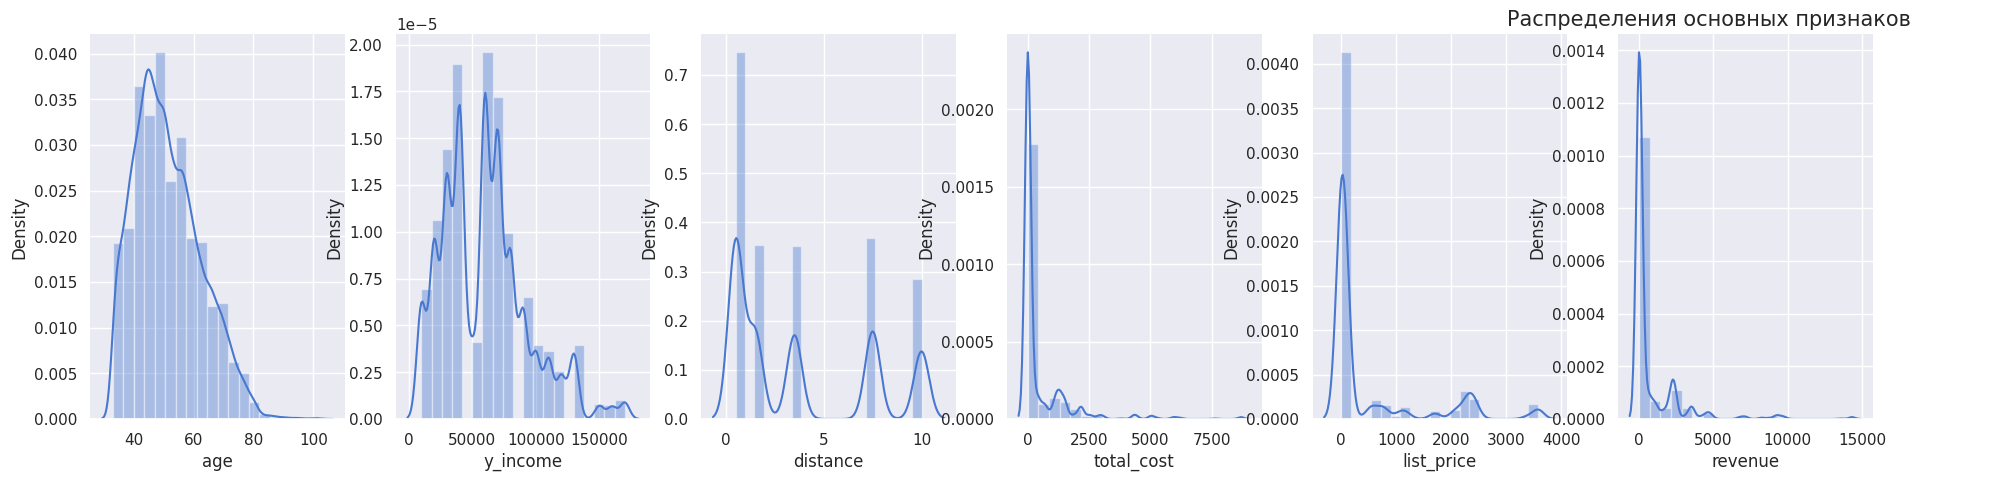

In [ ]:
import seaborn as sns
sns.set(palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 6, figsize=(23, 5))
sns.despine(left=True)
sns.distplot(df['age'], bins=20, ax=axs[0])
sns.distplot(df['y_income'], bins=20, ax=axs[1])
sns.distplot(df['distance'], bins=20, ax=axs[2])
sns.distplot(df['total_cost'], bins=20, ax=axs[3])
sns.distplot(df['list_price'], bins=20, ax=axs[4])
sns.distplot(df['revenue'], bins=20, ax=axs[5])
plt.title('Распределения основных признаков           ', fontsize=15);
plt.show()

Как видно на графике, большинство признаков распределено ненормально с разной степенью отклонений - как правило, распределение наборов данных имеет положительную ассимметрию

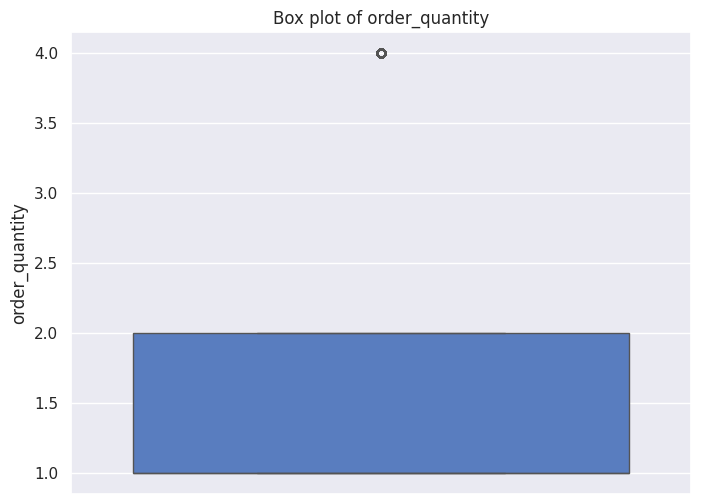

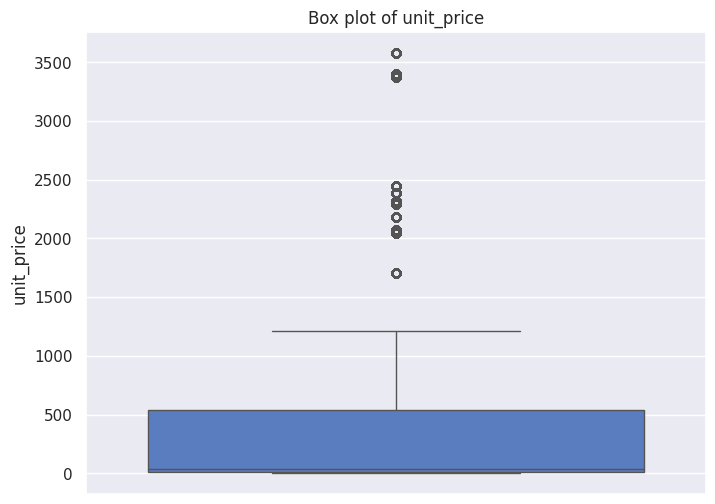

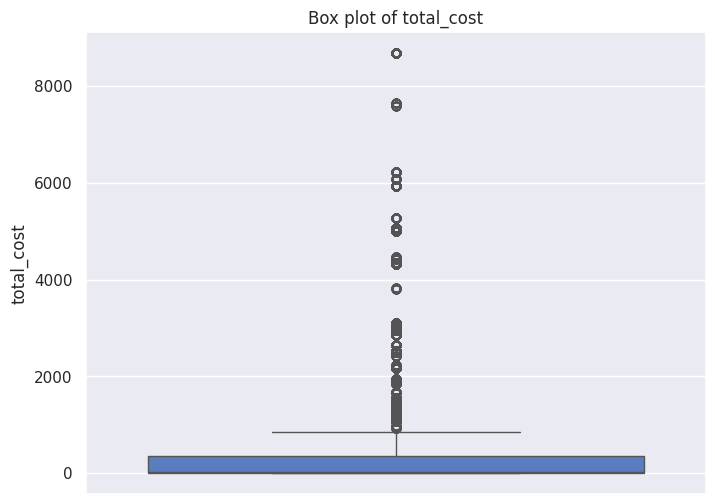

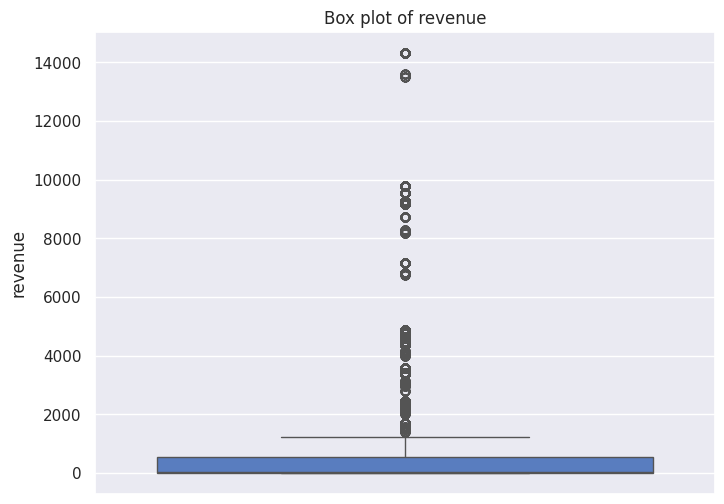

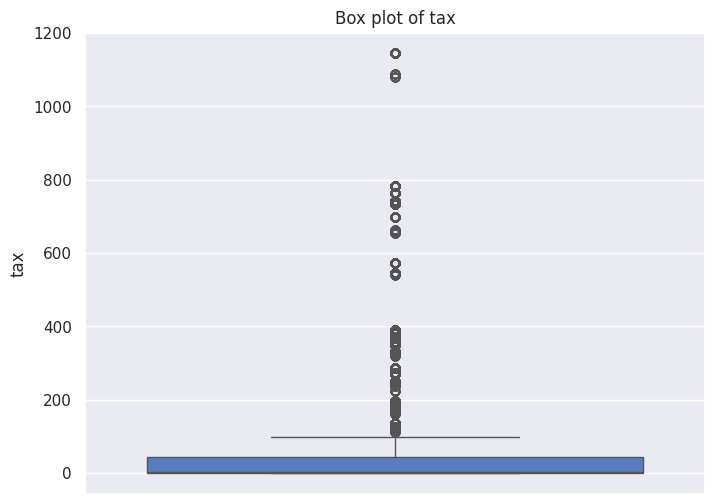

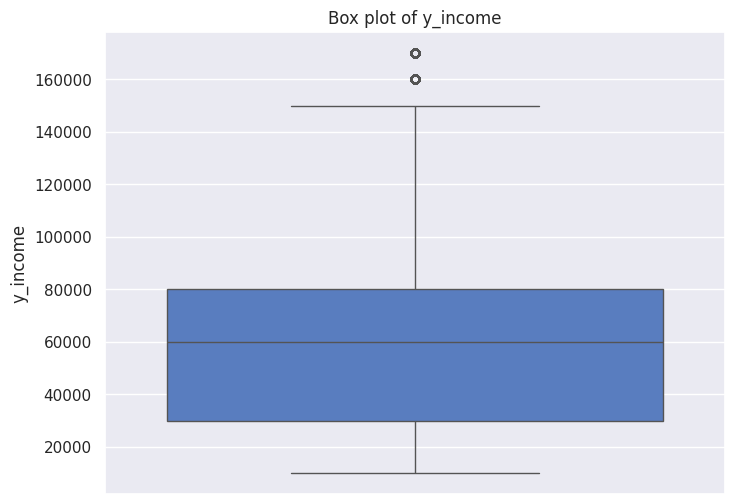

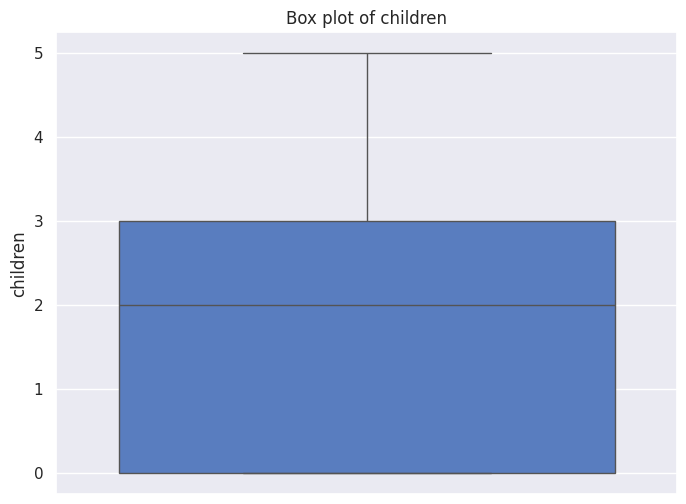

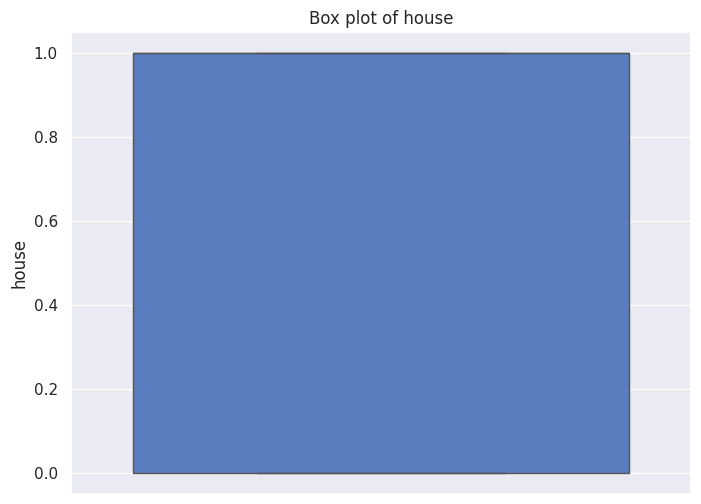

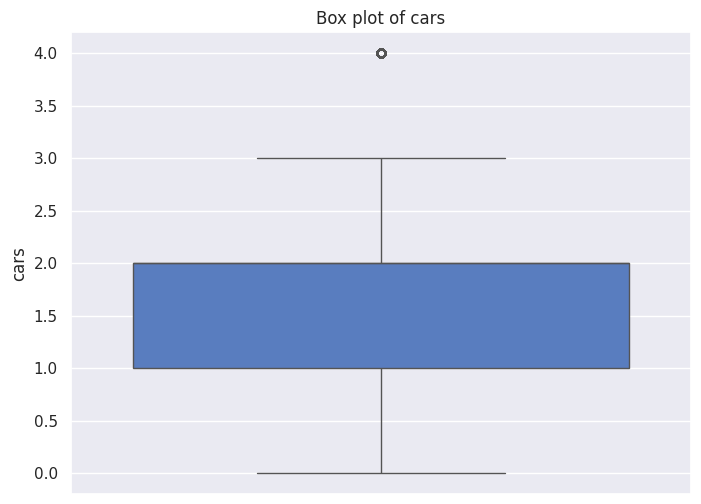

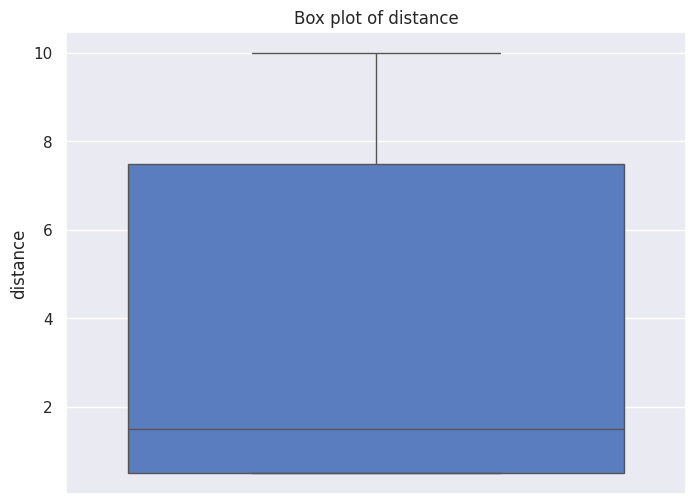

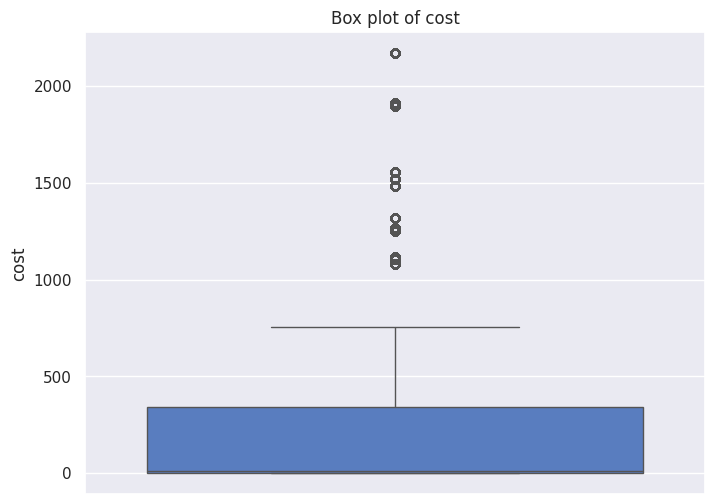

In [ ]:
df_numeric = df.drop(['product_id', 'order_date', 'ship_date', 'customer_id', 'promotion_id',
       'territory_id', 'order_number', 'year', 'month', 'year_month',
       'client_name', 'm-status', 'gender', 'children_home', 'education', 'occupation',
       'first_purchase', 'city', 'state', 'country_x', 'age',
       'product', 'sub_category', 'category', 'list_price',
       'days_manufacture', 'productLine', 'model', 'start_date', 'region',
       'country_y', 'group', 'education_code', 'occupation_code',
       'subcategory_code', 'category_code', 'productline_code', 'region_code',
       'group_code', 'profit', 'marginality'],axis=1)
for col in df_numeric:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.ylabel(col)
    plt.title(f'Box plot of {col}')
    plt.show()

Рассмотрим боксплоты, построенные по основным числовым признакам. По цене товара - видим большие положительные выбросы, самую низкую медиану, небольшой межквартильный диапазон. То же распределение по себестоимости товара, выручке, налогам. По годовому доходу довольно большой межквартильный диапазон, медиана выше среднего, выбросов мало. Количество детей: медиана выше среднего, диапазон узкий, выбросов нет. По показателю дальности от города диапазон узкий, медиана ниже среднего.


#  <a name="2"> 2. Исследовательский анализ данных</a>

Добавим новые признаки в нашу таблицу: "прибыль" и "маржинальность, %":

In [ ]:
df['profit'] = df['revenue'] - df['total_cost'] - df['tax']
df['marginality'] = 100*df.profit / df.revenue

Сделаем три отдельных датасета по годам:

In [ ]:
df5 = df.loc[df['year']==2016]
df14 = df.loc[df['year']==2014]
df15 = df.loc[df['year']==2015]

In [ ]:
print(f'Количество покупателей: {df.customer_id.nunique()}')

Количество покупателей: 17918


Рассмотрим признаки покупателей, влияющие на продажи

In [ ]:
age65 = len(df.loc[(df.age>=65)])
age65

8035

Соответственно, в нашем датасете почти половина клиентов (45%) - люди пенсионного возраста. Возможно? они покупают велосипед, потому что опасаются водить машину или стараются вести активный образ жизни, либо покупают велосипеды не себе.

Построим гистограмму распределения возраста

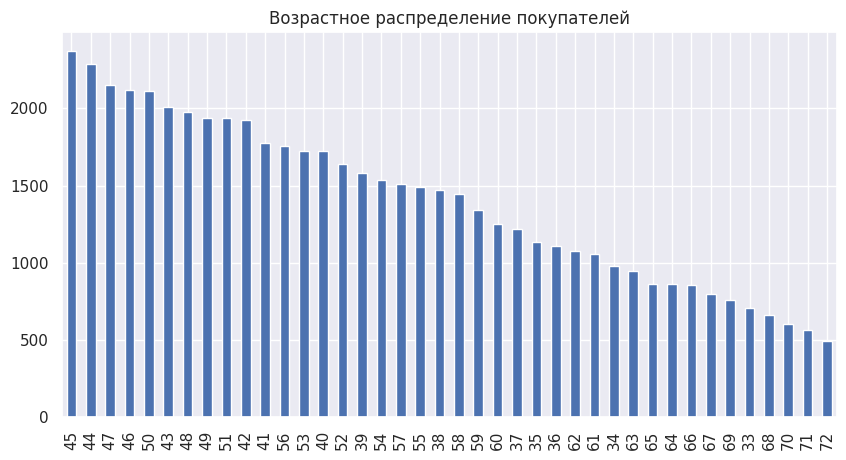

In [ ]:
df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Возрастное распределение покупателей")
plt.ylabel('')
plt.xlabel('');

На рисунке видно, что чаще покупалелями велосипедов оказываются в возрасте 44-45 лет, реже всего покупают клиенты старше 70 лет. Распределение покупателей по возрастам было равномерным, без пиков и провалов.



In [ ]:
age_group_profit = pd.pivot_table(data=df,
    index=['age'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
age_group_profit

Исходя из таблицы, наибольшую среднюю прибыль приносили покупатели в возрасте 44 лет, а наименьшую - 92-94 лет. Самому возрастному клиенту 103 года. Люди старше 100 лет, интересовались не велосипедами, а аксессуарами (запчастями) и одеждой. Самому моодому клиенту - 33 года.

In [ ]:
age100 = df.loc[(df.age>=100)]
age100

product_id order_date  ship_date  customer_id  promotion_id  \
4757          222 2016-05-22 2016-05-29        18034             1   
5362          222 2016-09-07 2016-09-14        14992             1   
20448         465 2016-12-05 2016-12-12        16471             1   
21189         472 2016-09-05 2016-09-12        14841             1   
31913         480 2016-08-19 2016-08-26        12725             1   
32244         480 2016-09-29 2016-10-05        25527             2   
32801         480 2016-11-25 2016-12-01        16325             2   
33840         483 2016-08-19 2016-08-26        12725             1   
36101         485 2016-09-05 2016-09-12        14841             1   
37075         486 2016-11-25 2016-12-01        16325             1   
41531         528 2016-10-12 2016-10-19        16325             1   
42640         529 2016-03-28 2016-04-05        16455             1   
42986         529 2016-05-22 2016-05-29        18034             1   
44269         529 2016-12-05 2016-12-12        16471             1   
45248         530 2016-08-19 2016-08-26        12725             1   
45411         530 2016-09-29 2016-10-05        25527             1   
45691         530 2016-11-25 2016-12-01        16325             1   
48580         537 2016-09-07 2016-09-14        14992             1   
50202         539 2016-03-28 2016-04-05        16455             1   
50330         539 2016-05-22 2016-05-29        18034             1   
50847         539 2016-12-05 2016-12-12        16471             1   

       territory_id  order_number  order_quantity  unit_price  total_cost  \
4757              8         58385               1       34.99     13.0863   
5362             10         65708               2       34.99     26.1726   
20448             7         72221               1       24.49      9.1593   
21189             8         65587               1       63.50     23.7490   
31913             8         64494               1        2.29      0.8565   
32244             7         67122               4        2.29      3.4260   
32801            10         71313               1        2.29      0.8565   
33840             8         64494               1      120.00     44.8800   
36101             8         65587               1       21.98      8.2205   
37075            10         71313               1      159.00     59.4660   
41531            10         68120               4        4.99      7.4652   
42640             7         55119               2        3.99      2.9846   
42986             8         58385               1        3.99      1.4923   
44269             7         72221               1        3.99      1.4923   
45248             8         64494               1        4.99      1.8663   
45411             7         67122               4        4.99      7.4652   
45691            10         71313               1        4.99      1.8663   
48580            10         65708               2       35.00     26.1800   
50202             7         55119               2       24.99     18.6926   
50330             8         58385               1       24.99      9.3463   
50847             7         72221               1       24.99      9.3463   

       ...   group  education_code  occupation_code  subcategory_code  \
4757   ...  Europe               2                2                 7   
5362   ...  Europe               4                2                 7   
20448  ...  Europe               2                2                 6   
21189  ...  Europe               4                2                16   
31913  ...  Europe               4                2                14   
32244  ...  Europe               4                2                14   
32801  ...  Europe               3                0                14   
33840  ...  Europe               4                2                 0   
36101  ...  Europe               4                2                 5   
37075  ...  Europe               3       

Столетний рубеж перешагнул 21 человек, причем предпочитают они как запчасти - дорожные шины: ML Road Tire, Touring Tire Tube, Road Tire Tube, патчи, так и синие спортивные шлемы Sport-100 Helmet (причем, покупали они эти товары более одного раза)

In [ ]:
gender_profit = pd.pivot_table(data=df,
    index=['gender'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
gender_profit

Существенной разницы по гендеру не наблюдалось, однако средняя прибыль у женщин была выше

In [ ]:
status_profit = pd.pivot_table(data=df,
    index=['m-status'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
status_profit

Средняя прибыль была выше у одиноких клиентов (незарегистрировавших отношения). Возможно, они, не нуждаясь в больших машинах, живя недалеко от цивилизации, предпочитали передвигаться на велосипедах или просто экономили.

In [ ]:
income_profit = pd.pivot_table(data=df,
    index=['y_income'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
income_profit

Самая высокая средняя выручка была у покупателей с ежегодным доходом 170000 фунтов (1063 фунта). Средняя выручка покупателей с доходами до 7000 фунтов распределялась более равномерно (от 625 до 763 фунтов).

<ipython-input-40-8f30b3137a11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="y_income",


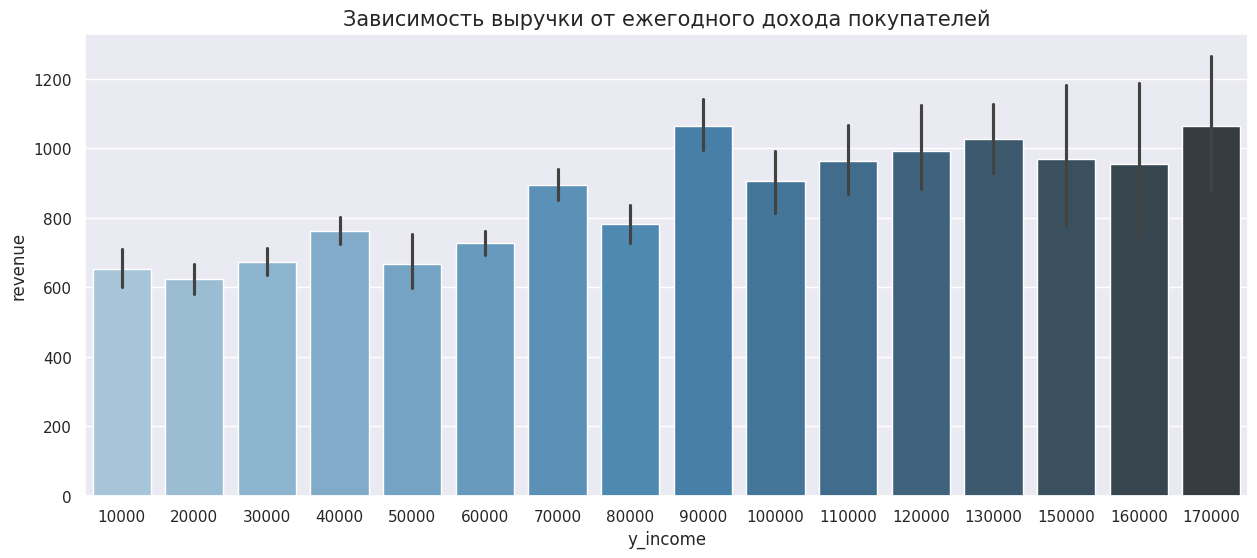

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="y_income",
                 y="revenue",
                 data=df,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от ежегодного дохода покупателей",fontsize=15)

Средняя выручка была выше у покупателей с высоким доходом (более 170000), а также с доходом 9000. Средняя выручка при ежегодном доходе до 7000 фунтов практически не различалась.

In [ ]:
ch_profit = pd.pivot_table(data=df,
    index=['children_home'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'sum']).style.background_gradient()
ch_profit

Суммарная выручка была выше у бездетных покупателей (28124197 фунтов), самая низкая - при наличии трех детей (2239792 фунта)

<ipython-input-76-892c608c4595>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="children_home",


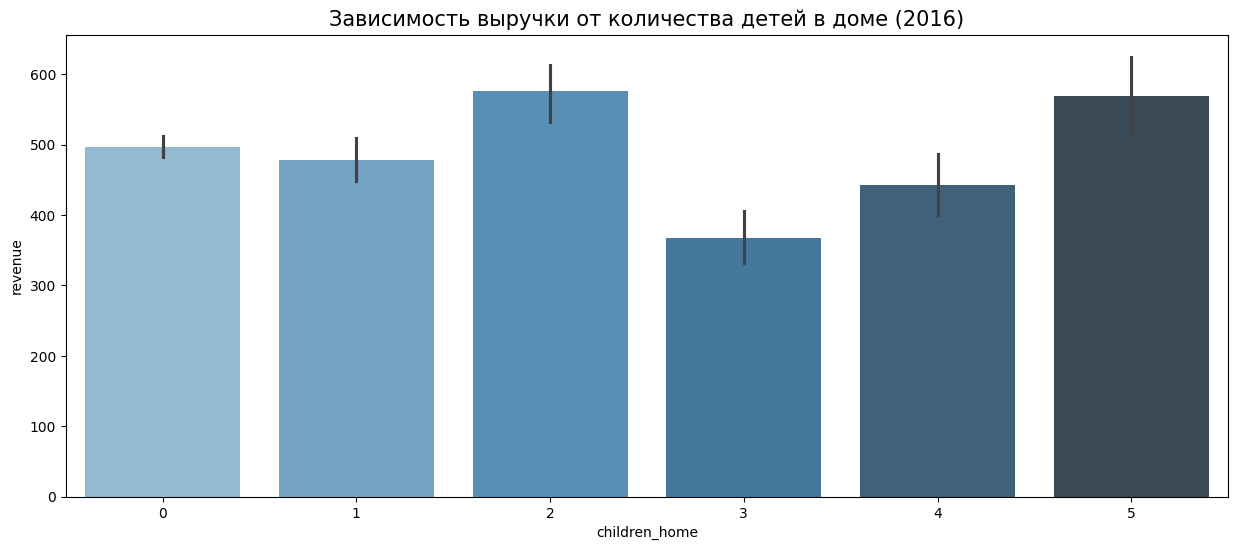

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="children_home",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от количества детей в доме (2016)",fontsize=15)


Если рассматривать суммарную выручку, то в бездетных семьях она была выше. Если рассматривать среднюю выручку за 2016 год - в семьях с двумя и пятью детьми средняя выручка была наибольшей, правда она не намного отличалась от выручки бездетных покупателей.

In [ ]:
edu_profit = pd.pivot_table(data=df,
    index=['education'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
edu_profit

Самая высокая средняя выручка была у покупателей с высшим образованием: "бакалавров" (885 фунтов) и со степенью "Graduate Degree" (840 фунтов).

<ipython-input-77-edca11f0c67d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="education",


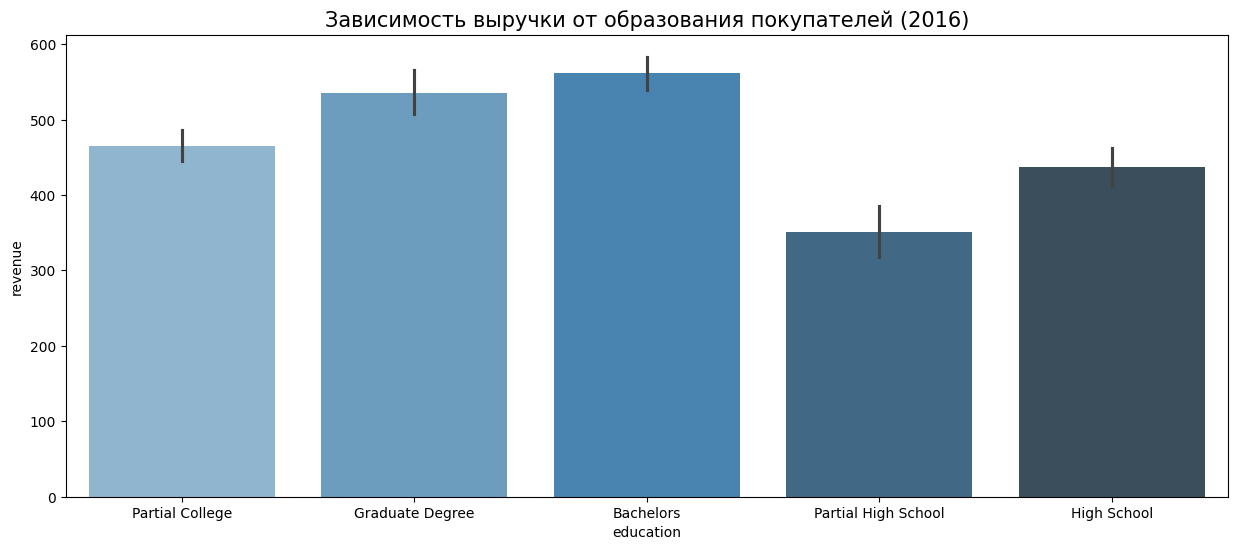

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="education",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от образования покупателей (2016)",fontsize=15)

И средняя прибыль, и выручка были выше у клиентов с высшим образованием (степени "бакалавр" и "Graduate Degree"), и ниже у клиентов с незаконченным средним образованием.

In [ ]:
oc_profit = pd.pivot_table(data=df,
    index=['occupation'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
oc_profit

самая высокая средняя выручка была у менеджеров (859 фунтов) и владельцев бизнеса (ИП) (844 фунта)

<ipython-input-78-e69f6eb46f63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="occupation",


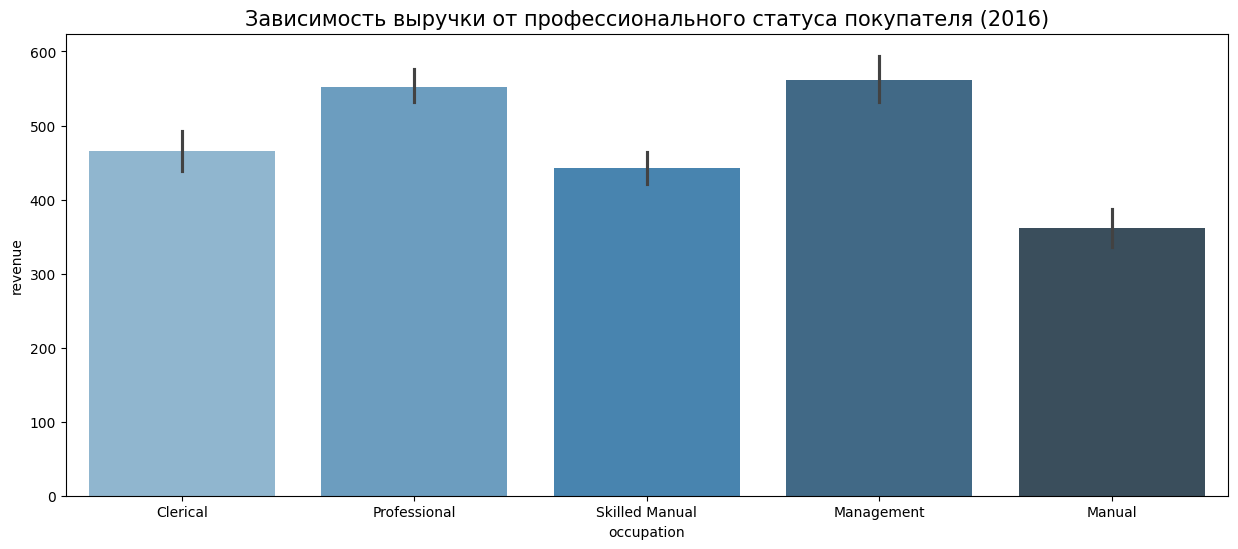

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="occupation",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от профессионального статуса покупателя (2016)",fontsize=15)

Наибольшую прибыль приносили клиенты-руководители и клиенты с профессиональными лицензиями (ИП)

In [ ]:
car_profit = pd.pivot_table(data=df,
    index=['cars'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
car_profit

Средняя выручка у покупателей, не имеющих машину, была выше - 902 фунта, самая низкая - у владельцев 2х авто (676 фунтов)

<ipython-input-36-eac2cc6a34d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="cars",


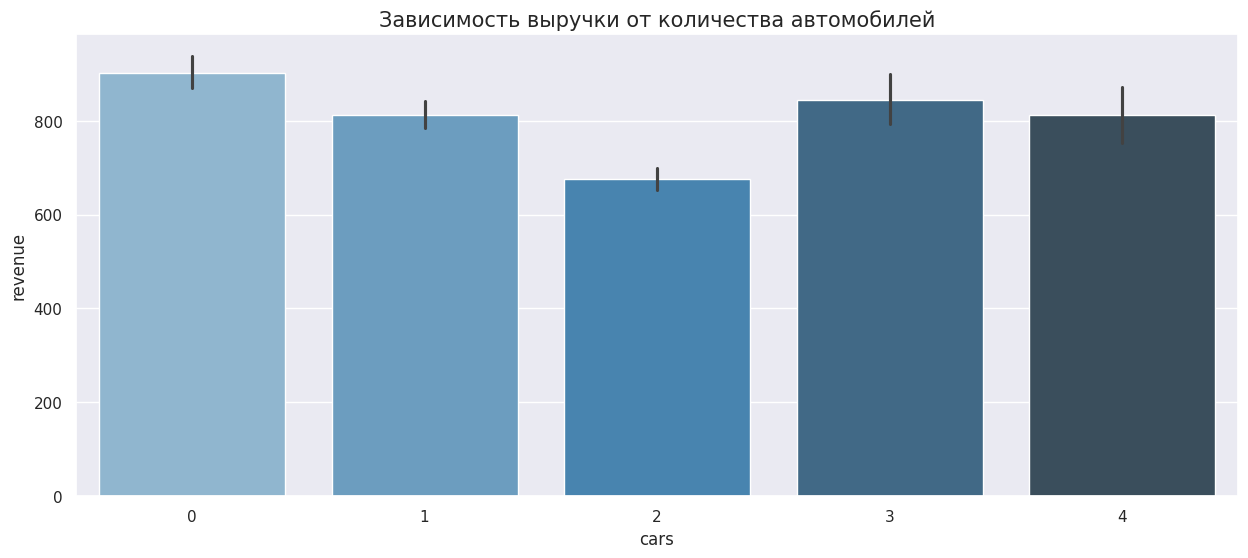

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="cars",
                 y="revenue",
                 data=df,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от количества автомобилей",fontsize=15)

Велосипеды и связанные с ними товары чаще всего покупали люди без машин, реже всего - с двумя машинами

In [ ]:
h_profit = pd.pivot_table(data=df,
    index=['house'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
h_profit

Средняя выручка у домовладельцев была выше - 793,3 фунта, у покупателей, не имеющих собственности (783,1 фунт)

<ipython-input-44-13717d2566ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="house",


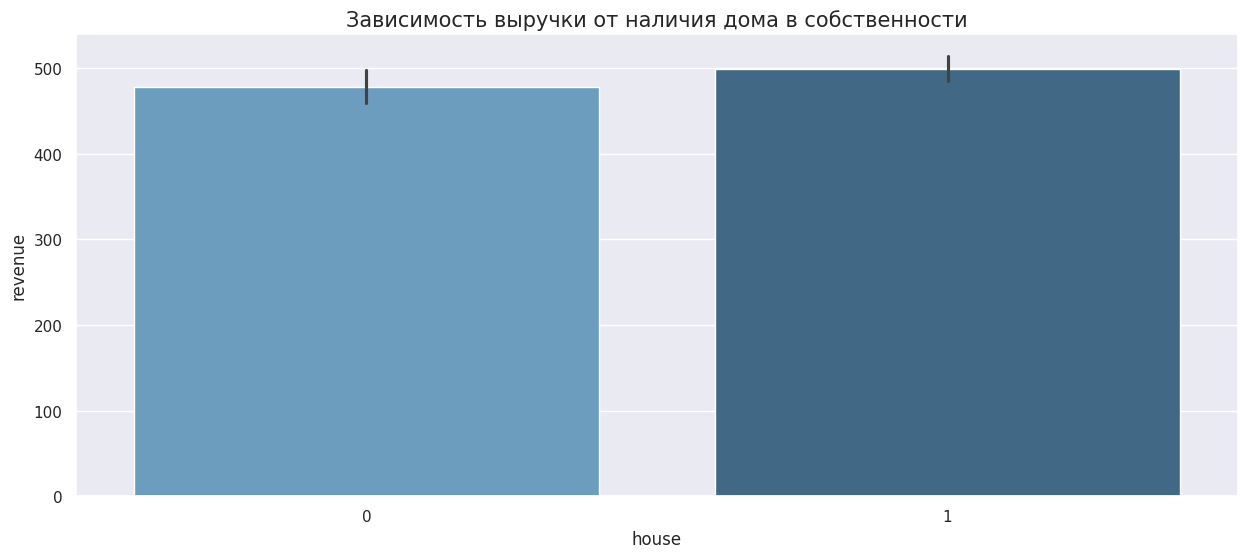

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="house",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от наличия дома в собственности",fontsize=15)

Средняя выручка была повыше у покупателей, владеющих собственным домом

In [ ]:
d_profit = pd.pivot_table(data=df,
    index=['distance'],
    values=['profit', 'revenue'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
d_profit

Самая высокая средняя выручка у покупателей, проживающих на расстоянии не больше мили от города - 848 фунтов.

<ipython-input-45-e39168a611c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="distance",


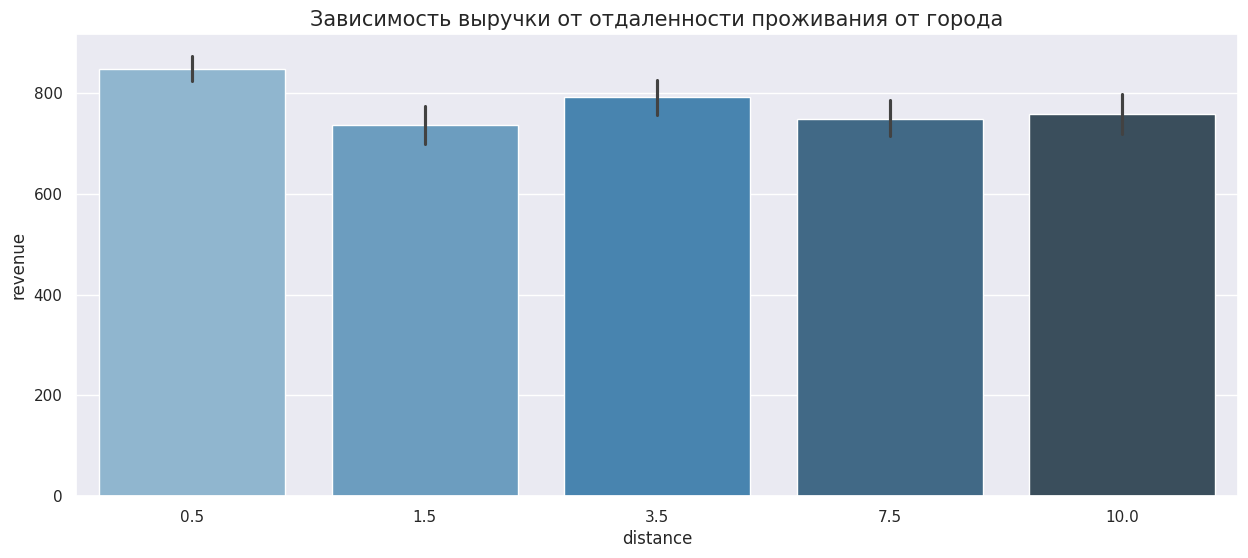

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="distance",
                 y="revenue",
                 data=df,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от отдаленности проживания от города",fontsize=15)

Продажи зависели от расстояния от дома покупателя до города и были выше, если клиент жил в радиусе мили. Средняя выручка снижалась на радиусе от 2 до 5 миль, но все еще была высокой

In [ ]:
df.gender.value_counts()

gender
1    29314
0    28875
Name: count, dtype: int64

В датасете 29314 мужчин и 28875 женщин

(-1.1012442901500237,
 1.100059251911906,
 -1.1049996427955295,
 1.204992625959452)

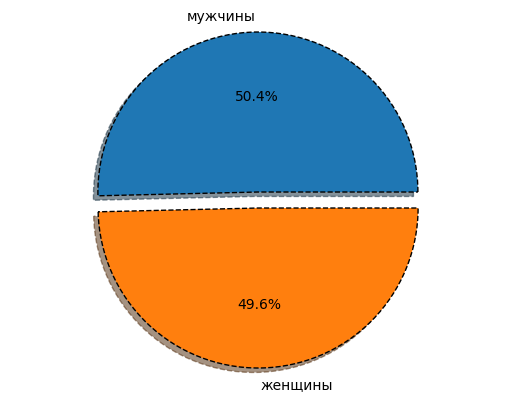

In [ ]:
vals = [29314, 28875]
labels = ['мужчины', 'женщины']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--', 'edgecolor':'k'}, rotatelabels=False)
ax.axis('equal')

На графике показано, что разницы по гендеру в численности покупателей практически не было: мужчин - 50,4%, женщин - 49,6%

Я решила проверить Гипотезу: зависит ли прибыль от пола при помощи теста Левене (из библиотеки scipy, который проверяет гипотезу о равенстве дисперсий генеральных совокупностей)  и T-теста, который используется для сравнения средних значений двух групп и позволяет определить, есть ли статистически значимая разница между ними

Гипотеза_1: прибыль не зависит от гендера

In [ ]:
male_profit = df.loc[(df.gender==1), 'profit']
female_profit = df.loc[(df.gender==0), 'profit']

from scipy import stats
results = stats.levene(male_profit, female_profit)
alpha = 0.05

print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.030624503207133173
Отклонить гипотезу о равенстве дисперсий


In [ ]:
t_stat, p_value = stats.ttest_ind(male_profit, female_profit, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

if (p_value < 0.05):
    print('Существует значительная разница в прибыли между покупателями мужского и женского пола')
else:
    print(' Нет никакой разницы в прибыли между покупателями мужского и женского пола')

T-statistic value:  -2.1950688145751696
P-Value:  0.028162605489945557
Существует значительная разница в прибыли между покупателями мужского и женского пола


Таким образом, мы можем с 95% уверенностью отвергнуть нулевую гипотезу о том, что прибыль клиентов-женщин и клиентов-мужчин одинакова. (P-Value: 0.028162249511982287, что меньше 0,05)

Гипотеза_2: прибыль не зависит от семейного положения покупателя

In [ ]:
status_1_profit = df.loc[(df['m-status']==1), 'profit']
status_0_profit = df.loc[(df['m-status']==0), 'profit']
from scipy import stats
results = stats.levene(status_1_profit, status_0_profit)
alpha = 0.05

print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

3.381346348189535e-09
Отклонить гипотезу о равенстве дисперсий


In [ ]:
t_stat, p_value = stats.ttest_ind(status_1_profit, status_0_profit, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Существует значительная разница в прибыли между одинокими покупателями и находящимися в браке')
else:
    print(' Нет никакой разницы в прибыли между одинокими покупателями и находящимися в браке')

T-statistic value:  -5.948561750164094
P-Value:  2.7214137947371303e-09
Существует значительная разница в прибыли между одинокими покупателями и находящимися в браке


Таким образом, можно с уверенностью говорить о том, что прибыль зависит от семейного статуса покупателя

In [ ]:
df['m-status'].value_counts()

m-status
1    31992
0    26197
Name: count, dtype: int64

 В датасете семейных клиентов было 31992, несемейных - 26197

(-1.116358275373262,
 1.1007789654939464,
 -1.1049336394456541,
 1.203716942473919)

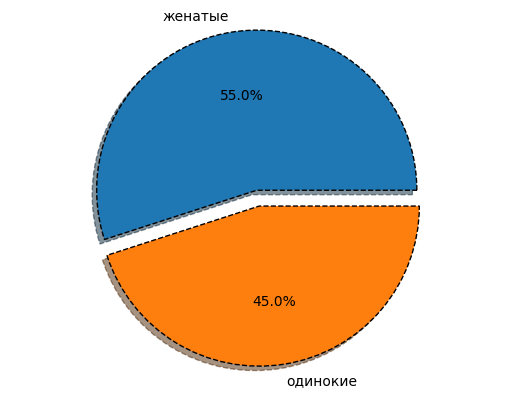

In [ ]:
vals = [31992, 26197]
labels = ['женатые', 'одинокие']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--', 'edgecolor':'k'}, rotatelabels=False)
ax.axis('equal')

Как видно из графика, доля одиноких покупателей(45%) была меньше, чем семейных - 55%

### Проведем XYZ-анализ клиентов за 2016 год

XYZ-анализ - это метод классификации, который подразделяет клиентов на три категории в зависимости от регулярности покупок:

Класс X: покупают часто.

Класс Y: покупают нерегулярно, но больше одного раза.

Класс Z: покупки случайные и непредсказуемые.

<ipython-input-79-c31e3adb145a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month',


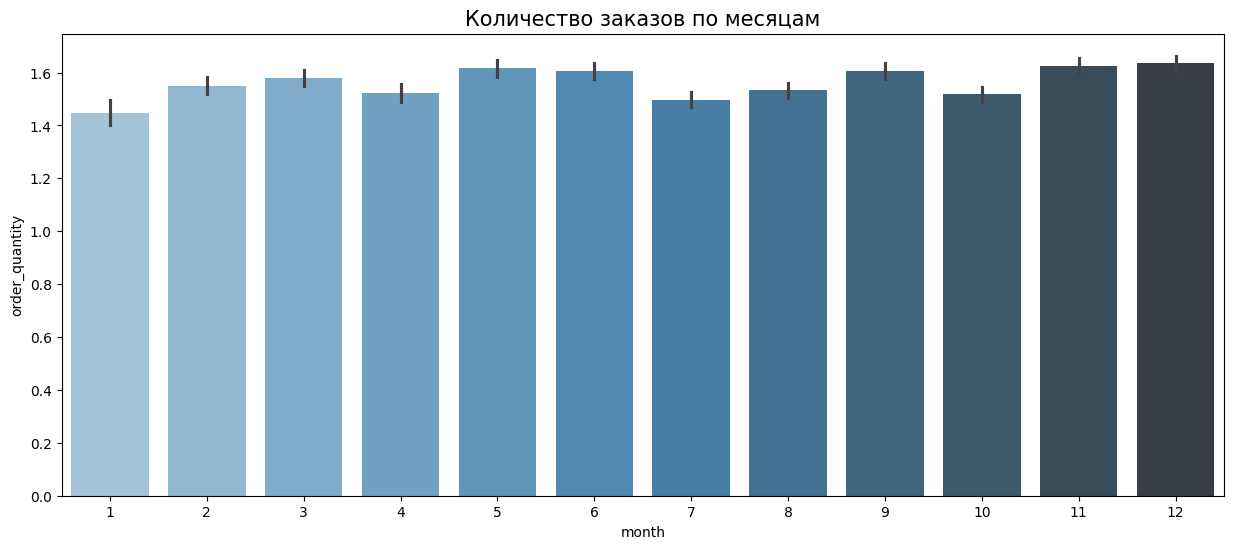

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='month',
                 y='order_quantity',
                 data=df5,
                 palette="Blues_d")\
                .set_title("Количество заказов по месяцам 2016 г",fontsize=15)

Чтобы получить краткий обзор сезонности в наборе данных, построим график количества заказов по месяцам 2016 г. Мы можем наблюдать тенденцию постепенного увеличения количества заказов с января по март, с апреля по май-июнь, с июля по сентябрь, с октября по декабрь. Распределение заказов носит циклический характер, наивысшей точки количество заказов достигает в декабре.

<ipython-input-80-4b53718e5aad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="month",


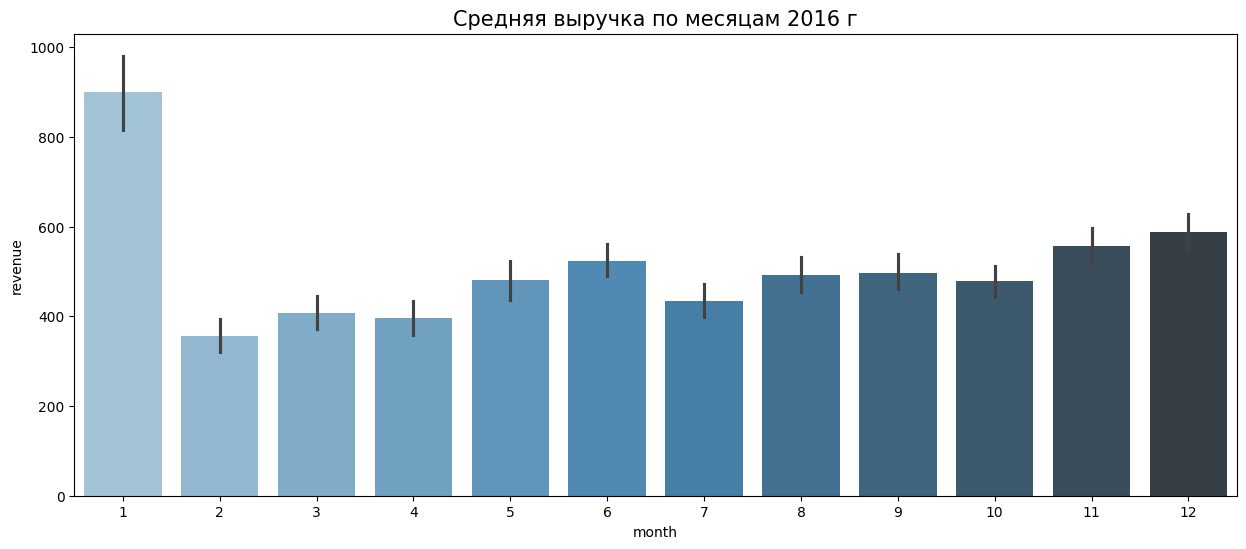

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Средняя выручка по месяцам 2016 г",fontsize=15)

При рассмотрении динамики выручки в феврале наблюдался сильный обвал - выручка снижалась более чем в два раза. Далее наблюдалось поступательное движение по июнь, потом небольшой спад и снова поступательное движение до декабря.

In [ ]:
summarized_data_by_month = df5.groupby(['customer_id','month'])['order_quantity'].sum().to_frame().reset_index()
summarized_data_by_month.head()

customer_id  month  order_quantity
0        11000      1               2
1        11000      5               5
2        11001      1              12
3        11001     12               4
4        11002      1               1

Сделаем Пивот по количеству заказов в месяц по 2016 году по каждому клиенту, пропуски заменим на ноль(по месяцам, когда заказов не случилось):

In [ ]:
summarized_data_by_month = summarized_data_by_month.pivot(index='customer_id', columns='month', values='order_quantity')\
                           .add_prefix('month_').reset_index().fillna(0)
summarized_data_by_month.head()

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0            11000      2.0      0.0      0.0      0.0      5.0      0.0   
1            11001     12.0      0.0      0.0      0.0      0.0      0.0   
2            11002      1.0      2.0      0.0      0.0      0.0      0.0   
3            11003      4.0      0.0      0.0      0.0      4.0      0.0   
4            11004      3.0      0.0      0.0      0.0      4.0      0.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  
0          0.0      0.0      0.0       0.0       0.0       0.0  
1          0.0      0.0      0.0       0.0       0.0       4.0  
2          0.0      0.0      0.0       0.0       0.0       0.0  
3          0.0      0.0      0.0       0.0       0.0       0.0  
4          0.0      0.0      0.0       0.0       0.0       0.0

Рассчитаем общий количество заказов и стандартное отклонение заказов по клиентам

In [ ]:
summarized_data_by_month['std_demand'] = summarized_data_by_month[["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"]].std(axis=1)
summarized_data_by_month.head()

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0            11000      2.0      0.0      0.0      0.0      5.0      0.0   
1            11001     12.0      0.0      0.0      0.0      0.0      0.0   
2            11002      1.0      2.0      0.0      0.0      0.0      0.0   
3            11003      4.0      0.0      0.0      0.0      4.0      0.0   
4            11004      3.0      0.0      0.0      0.0      4.0      0.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  
0          0.0      0.0      0.0       0.0       0.0       0.0    1.505042  
1          0.0      0.0      0.0       0.0       0.0       4.0    3.550501  
2          0.0      0.0      0.0       0.0       0.0       0.0    0.621582  
3          0.0      0.0      0.0       0.0       0.0       0.0    1.556998  
4          0.0      0.0      0.0       0.0       0.0       0.0    1.378954

In [ ]:
summarized_data_by_month['total_demand'] = summarized_data_by_month.iloc[:, 1:13].sum(axis=1)
summarized_data_by_month['average_demand'] = summarized_data_by_month.iloc[:, 1:13].mean(axis=1)
summarized_data_by_month.head()

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0            11000      2.0      0.0      0.0      0.0      5.0      0.0   
1            11001     12.0      0.0      0.0      0.0      0.0      0.0   
2            11002      1.0      2.0      0.0      0.0      0.0      0.0   
3            11003      4.0      0.0      0.0      0.0      4.0      0.0   
4            11004      3.0      0.0      0.0      0.0      4.0      0.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
0          0.0      0.0      0.0       0.0       0.0       0.0    1.505042   
1          0.0      0.0      0.0       0.0       0.0       4.0    3.550501   
2          0.0      0.0      0.0       0.0       0.0       0.0    0.621582   
3          0.0      0.0      0.0       0.0       0.0       0.0    1.556998   
4          0.0      0.0      0.0       0.0       0.0       0.0    1.378954   

month  total_demand  average_demand  
0               7.0        0.583333  
1              16.0        1.333333  
2               3.0        0.250000  
3               8.0        0.666667  
4               7.0        0.583333

Рассчитаем коэффициент вариации:

In [ ]:
summarized_data_by_month['cov_demand'] = summarized_data_by_month['std_demand'] / summarized_data_by_month['average_demand']
summarized_data_by_month.head()

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0            11000      2.0      0.0      0.0      0.0      5.0      0.0   
1            11001     12.0      0.0      0.0      0.0      0.0      0.0   
2            11002      1.0      2.0      0.0      0.0      0.0      0.0   
3            11003      4.0      0.0      0.0      0.0      4.0      0.0   
4            11004      3.0      0.0      0.0      0.0      4.0      0.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
0          0.0      0.0      0.0       0.0       0.0       0.0    1.505042   
1          0.0      0.0      0.0       0.0       0.0       4.0    3.550501   
2          0.0      0.0      0.0       0.0       0.0       0.0    0.621582   
3          0.0      0.0      0.0       0.0       0.0       0.0    1.556998   
4          0.0      0.0      0.0       0.0       0.0       0.0    1.378954   

month  total_demand  average_demand  cov_demand  
0               7.0        0.583333    2.580072  
1              16.0        1.333333    2.662876  
2               3.0        0.250000    2.486326  
3               8.0        0.666667    2.335497  
4               7.0        0.583333    2.363922

In [ ]:
summarized_data_by_month.sort_values(by='cov_demand', ascending=False).head(5)

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
1627         12650      0.0      0.0      0.0      0.0      0.0     19.0   
7131         18293      0.0     17.0      0.0      0.0      0.0      0.0   
8518         19726      0.0     14.0      0.0      0.0      0.0      0.0   
2370         13408      0.0      0.0      0.0      0.0      7.0      0.0   
1839         12865      0.0      0.0      0.0      7.0      0.0      0.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
1627       0.0      0.0      0.0       0.0       0.0       0.0    5.484828   
7131       0.0      0.0      0.0       0.0       0.0       0.0    4.907477   
8518       0.0      0.0      0.0       0.0       0.0       0.0    4.041452   
2370       0.0      0.0      0.0       0.0       0.0       0.0    2.020726   
1839       0.0      0.0      0.0       0.0       0.0       0.0    2.020726   

month  total_demand  average_demand  cov_demand  
1627           19.0        1.583333    3.464102  
7131           17.0        1.416667    3.464102  
8518           14.0        1.166667    3.464102  
2370            7.0        0.583333    3.464102  
1839            7.0        0.583333    3.464102

In [ ]:
print(summarized_data_by_month['cov_demand'].min(), summarized_data_by_month['cov_demand'].max(),summarized_data_by_month['cov_demand'].mean())

0.5867217604984702 3.4641016151377557 3.3227980116869333


Минимальный коэффициент вариации (CV) равен 0,59, максимальный 3,46, средний 3,32

Создадим функцию, которая берет cov_demand из датафрейма и присваивает соответствующий класс на основе правил коэффициента вариации XYZ.

In [ ]:
def xyz_classify_customer(cov):
    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [ ]:
summarized_data_by_month['xyz_class'] = summarized_data_by_month['cov_demand'].apply(xyz_classify_customer)
summarized_data_by_month.xyz_class.value_counts()

xyz_class
Z    17393
Y       19
Name: count, dtype: int64

(-1.2049993830260752,
 1.104999970620289,
 -1.0996571955985188,
 1.1003428043314167)

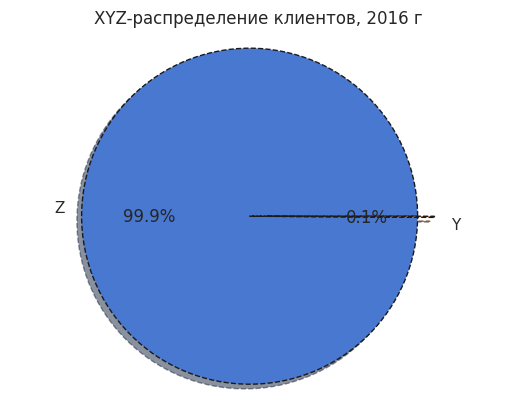

In [ ]:
vals = [17393, 19]
labels = ['Z', 'Y']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--', 'edgecolor':'k'}, rotatelabels=True)
ax.set_title('XYZ-распределение клиентов, 2016 г')
ax.axis('equal')

Таким образом, класс "X" клиентов в нашем датасете отсутствует, "Y" класс включает всего 19 человек или 0,11% ,"Z" класс -99,89%

In [ ]:
Ycus = summarized_data_by_month.loc[summarized_data_by_month['xyz_class'] == 'Y']
Ycus

month  customer_id  month_1  month_2  month_3  month_4  month_5  month_6  \
19           11019      0.0      3.0      7.0      1.0      7.0      0.0   
90           11091      0.0      3.0     13.0     21.0      2.0      9.0   
174          11176      0.0     18.0      5.0      7.0      3.0     17.0   
183          11185      0.0     20.0      6.0      0.0      7.0      0.0   
198          11200      0.0     22.0     16.0     20.0     14.0      3.0   
213          11215      0.0      4.0     14.0      8.0      9.0      1.0   
221          11223      0.0      4.0      6.0      3.0     10.0      2.0   
260          11262      0.0      4.0      5.0      0.0      8.0     12.0   
274          11276      0.0      4.0      0.0      5.0      3.0      0.0   
275          11277      0.0     13.0      3.0      8.0      9.0      4.0   
285          11287      0.0     12.0      0.0      4.0     11.0      7.0   
298          11300      0.0     10.0     12.0      1.0      7.0      1.0   
328          11330      0.0      5.0      2.0      0.0     19.0     10.0   
329          11331      0.0     25.0     20.0      5.0     17.0      7.0   
496          11502      0.0      2.0      4.0      3.0      5.0      3.0   
499          11505      0.0      1.0      6.0      9.0      7.0      2.0   
514          11520      0.0      3.0      2.0      6.0      3.0      5.0   
559          11566      0.0     12.0     16.0     12.0      5.0      6.0   
622          11632      0.0     11.0      9.0      5.0      1.0      6.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
19         2.0      4.0      9.0      13.0       0.0       6.0    4.141439   
90         6.0      9.0      2.0       5.0      10.0      12.0    5.944185   
174        2.0      5.0      7.0       4.0       8.0       0.0    5.820549   
183        9.0     17.0      6.0      10.0       9.0       1.0    6.542981   
198        3.0     14.0     13.0       5.0       1.0       4.0    7.739607   
213        5.0      0.0     13.0       0.0       6.0       1.0    5.035480   
221       19.0      3.0     10.0       7.0       9.0       4.0    5.107184   
260        5.0     16.0     28.0      10.0       3.0       9.0    7.808309   
274        6.0     11.0      3.0       2.0      10.0      10.0    4.011348   
275       25.0     15.0      9.0       2.0       7.0       0.0    7.204271   
285        7.0      2.0      0.0       5.0      10.0       1.0    4.461111   
298        9.0     20.0      6.0       3.0      20.0      23.0    8.003787   
328        9.0      1.0      8.0       5.0       7.0      13.0    5.712161   
329       18.0      2.0      3.0       0.0       6.0       4.0    8.649312   
496        4.0     11.0      5.0       9.0       8.0       0.0    3.397860   
499       10.0      4.0      0.0       4.0       8.0       1.0    3.601347   
514        2.0      0.0      6.0       0.0       8.0       5.0    2.674232   
559        5.0      4.0      9.0       9.0       4.0       8.0    4.400413   
622        4.0      6.0      0.0       0.0       6.0       2.0    3.663911   

month  total_demand  average_demand  cov_demand xyz_class  
19             52.0        4.333333    0.955717         Y  
90             92.0        7.666667    0.775328         Y  
174            76.0        6.333333    0.919034         Y  
183            85.0        7.083333    0.923715         Y  
198           115.0        9.583333    0.807611         Y  
213            61.0        5.083333    0.990586         Y  
221            77.0        6.416667    0.795925         Y  
260           100.0        8.333333    0.936997         Y  
274            54.0        4.500000    0.891411         Y  
275            95.0        7.916667    0.910013         Y  
285            59.0        4.916667    0.907345         Y  
298           112.0        9.333333    0.857549         Y  
328            79.0        6.583333    0.867670         Y  
329           107.0        8.916667    0.970016         Y  
496            54.

В "Y" вошли следующие клиенты: 11019 (Lal Luke), 11091(Perez Dalton), 11176(Roberts Mason), 11185 (Henderson Ashley), 11200 (Griffin Jason), 11215 (Perry Ana), 11223 (Patterson Hailey), 11262(Simmons, Jennifer), 11276(Chapman Nancy), 11277(Jackson Charles), 11287 (Garcia Henry), 11300(Barnes Fernando), 11331(Jenkins Samantha), 11502(Peterson Jared), 11505(Powell Jasmine), 11520 (Morgan Jada), 11566(Shan April), 11632(Jenkins Alexandra). Что интересно, один клиент из Франции, все остальные из Канады (British Colambia)

In [ ]:
summarized_data_by_month.groupby('xyz_class').agg(
    total_skus=('customer_id', 'nunique'),
    total_demand=('total_demand', 'sum'),
    std_demand=('std_demand', 'mean'),
    avg_demand=('average_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

total_skus  total_demand  std_demand  avg_demand  avg_cov_demand
xyz_class                                                                  
Y                  19        1450.0    5.469447    6.359649        0.861232
Z               17393       81434.0    1.246931    0.390167        3.325487

In [ ]:
df_monthly = summarized_data_by_month.groupby('xyz_class').agg(
    month_1=('month_1', 'sum'),
    month_2=('month_2', 'sum'),
    month_3=('month_3', 'sum'),
    month_4=('month_4', 'sum'),
    month_5=('month_5', 'sum'),
    month_6=('month_6', 'sum'),
    month_7=('month_7', 'sum'),
    month_8=('month_8', 'sum'),
    month_9=('month_9', 'sum'),
    month_10=('month_10', 'sum'),
    month_11=('month_11', 'sum'),
    month_12=('month_12', 'sum'),
)
df_monthly.head()

month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
xyz_class                                                                  
Y              0.0    176.0    146.0    118.0    147.0     95.0    150.0   
Z           2041.0   5745.0   5987.0   6195.0   6608.0   8370.0   6708.0   

           month_8  month_9  month_10  month_11  month_12  
xyz_class                                                  
Y            144.0    137.0      93.0     140.0     104.0  
Z           6940.0   7416.0    7634.0    8829.0    8961.0

Клиенты "Y" покупали делали в месяц от 95 до 176 заказов (в среднем 132 заказа), а клиенты "Z" - делали в месяц от 2041 до 8961 заказов в месяц (в среднем 6786)

Для построения графика нам потребовалось преобразовать данные из широкого формата в длинный, поэтому мы воспользовались функцией unstack() для создания длинного фрейма данных, затем сбросимли индекс и переименовали столбцы в соответствие с базовыми данными:

In [ ]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

month xyz_class  demand
0  month_1         Y     0.0
1  month_1         Z  2041.0
2  month_2         Y   176.0
3  month_2         Z  5745.0
4  month_3         Y   146.0

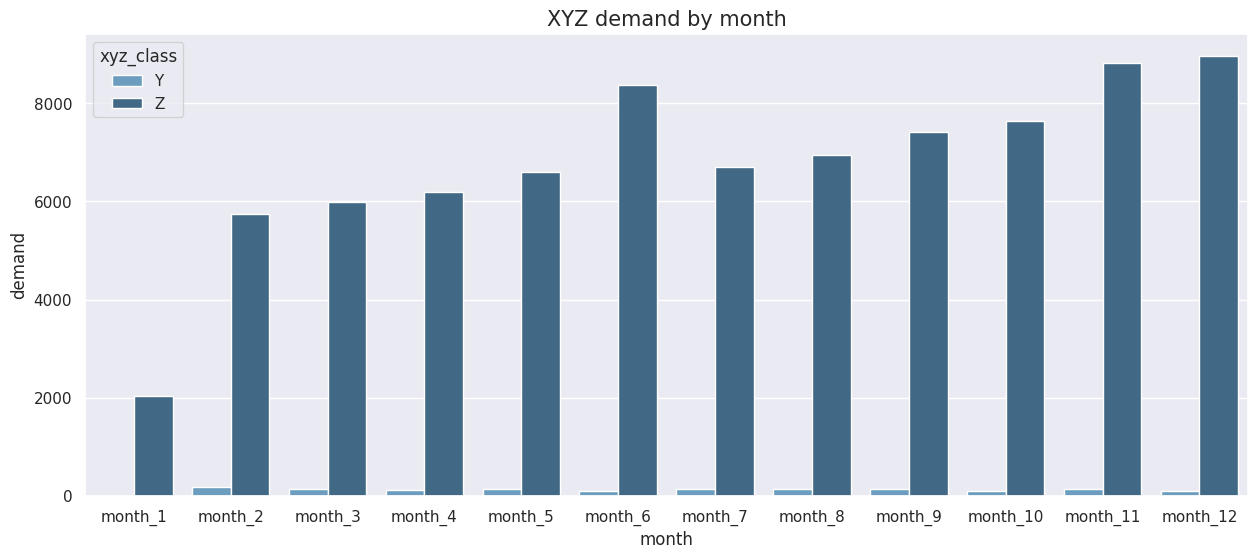

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month",
                 y="demand",
                 hue="xyz_class",
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month, 2016",fontsize=15)

Как показано на графике, в категории клиентов "Y" ежемесячные колебания по 2016 году минимальны, в то время как в категории "Z" ежемесячные изменения более волатильны. Если смотреть динамику по месяцам, то она была положительной с промежуточными пиками в июне и в ноябре-декабре. Отметим, что почти все клиенты нашего датасета обладали коэффициентом вариативности выше 25%. Покупки случайные единичные, прогнозировать их маловозможно.

### Проведем АВС-анализ клиентов датасета за 2016 год:

Группируем по столбцу id клиента с функцией агрегации по сумме выручки

In [ ]:
df_4 = df5.groupby('customer_id').agg(total_revenue=('revenue','sum')).sort_values(by='total_revenue', ascending=False).reset_index()

пару год-месяц склеиваем и переводим в строку

In [ ]:
df_4['year_month']=df5['year'].map(str) + '-' + df5['month'].map(str)
df_4.head()

customer_id  total_revenue year_month
0        13575       21734.49     2016-1
1        12321       21578.54     2016-1
2        11242       20210.15     2016-1
3        12131       19515.21     2016-1
4        12132       19418.18     2016-1

Рассчитываем накопление по месяцам, нормируем кумулятивную сумму и смотрим, сколько клиент вкладывает в выручку

In [ ]:
df_4['rev_cum_sum'] = df_4['total_revenue'].cumsum()
df_4['rev_all'] = df_4['total_revenue'].sum()
df_4['rev_percent'] = df_4['rev_cum_sum']/df_4['rev_all']
df_4.head(100)

customer_id  total_revenue year_month  rev_cum_sum      rev_all  \
0         13575       21734.49     2016-1     21734.49  25983251.71   
1         12321       21578.54     2016-1     43313.03  25983251.71   
2         11242       20210.15     2016-1     63523.18  25983251.71   
3         12131       19515.21     2016-1     83038.39  25983251.71   
4         12132       19418.18     2016-1    102456.57  25983251.71   
..          ...            ...        ...          ...          ...   
95        12010       11983.39     2016-2   1397322.21  25983251.71   
96        14428       11982.22     2016-2   1409304.43  25983251.71   
97        11009       11973.52     2016-2   1421277.95  25983251.71   
98        13139       11962.21     2016-2   1433240.16  25983251.71   
99        16297       11947.23     2016-2   1445187.39  25983251.71   

    rev_percent  
0      0.000836  
1      0.001667  
2      0.002445  
3      0.003196  
4      0.003943  
..          ...  
95     0.053778  
96     0.054239  
97     0.054700  
98     0.055160  
99     0.055620  

[100 rows x 6 columns]

Создаем функцию классификации "condition_abc" и затем применяем к датасету

In [ ]:
def condition_abc(x):
 if x>0 and x<=0.80:
   return "A"
 elif x>0.80 and x<=0.90:
   return "B"
 else:
   return 'C'

In [ ]:
df_4['ABC']=df_4['rev_percent'].apply(condition_abc)
df_4.tail(10)

customer_id  total_revenue year_month   rev_cum_sum      rev_all  \
0            13575       21734.49     2016-1  2.173449e+04  25983251.71   
1            12321       21578.54     2016-1  4.331303e+04  25983251.71   
2            11242       20210.15     2016-1  6.352318e+04  25983251.71   
3            12131       19515.21     2016-1  8.303839e+04  25983251.71   
4            12132       19418.18     2016-1  1.024566e+05  25983251.71   
...            ...            ...        ...           ...          ...   
17407        19086           2.29        NaN  2.598324e+07  25983251.71   
17408        11533           2.29        NaN  2.598324e+07  25983251.71   
17409        28781           2.29        NaN  2.598325e+07  25983251.71   
17410        11228           2.29        NaN  2.598325e+07  25983251.71   
17411        28093           2.29        NaN  2.598325e+07  25983251.71   

       rev_percent ABC  
0         0.000836   A  
1         0.001667   A  
2         0.002445   A  
3         0.003196   A  
4         0.003943   A  
...            ...  ..  
17407     1.000000   C  
17408     1.000000   C  
17409     1.000000   C  
17410     1.000000   C  
17411     1.000000   C  

[17412 rows x 7 columns]

In [ ]:
print(f"Количество клиентов в классе А: {len(df_4.loc[df_4['ABC'] == 'A'])} - 26,8%")
print(f"Количество клиентов в классе B: {len(df_4.loc[df_4['ABC'] == 'B'])} - 9,7%")
print(f"Количество клиентов в классе C: {len(df_4.loc[df_4['ABC'] == 'C'])} - 63,5")

Количество клиентов в классе А: 4664 - 26,8%
Количество клиентов в классе B: 1681 - 9,7%
Количество клиентов в классе C: 11067 - 63,5


Группируем по столбцу "АВС" и считаем выручку внутри классов

In [ ]:
df_4_check = df_4.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()
df_4_check
df_4_check.head()

<ipython-input-133-b9a8cfa48ab7>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_4_check = df_4.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()


ABC  total_revenue
0   A    20784322.88
1   B     2599724.88
2   C     2599203.95

Таким образом, мы разбили клиентов на 3 класса: "А (80% вклад в суммарную выручку), "B" (10% вклад в суммарную выручку) И "C" (10% вклад в суммарную выручку). Суммировать с таблицей XYZ смысла почти нет - подавляющее большинство клиентов находится в классе "Z"

### Проведем RFM анализ по данным 2016 года
Вариант 1



RFM — это метод, используемый для анализа ценности клиентов. R - Давность – как давно клиенты совершали покупки? F - Частота – Как часто они совершали покупки? M - Денежная стоимость: сколько они тратили?

In [ ]:
import datetime as dt
from datetime import date,timedelta
df5['order_date'] = pd.to_datetime(df5['order_date'])
df5['order_date'].max()
performans_date = df5["order_date"].max() + timedelta(days=2)
performans_date

<ipython-input-39-8618225e76f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['order_date'] = pd.to_datetime(df['order_date'])


Timestamp('2017-01-01 00:00:00')

In [ ]:
rfm_df = df5.groupby("customer_id").agg \
                                    ({"order_date" : lambda order_date :(performans_date - order_date.max()).days,  # Recency
                                     "order_number" : lambda order_number: order_number.nunique(),  # Frequency
                                     "revenue":  lambda revenue: revenue.sum()})    # Monetary

In [ ]:
rfm_df.head()

order_date  order_number  revenue
customer_id                                   
11000               242             2  4849.00
11001                20             2  5428.82
11002               309             2  4714.05
11003               235             2  4739.30
11004               244             2  7215.08

In [ ]:
rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df.head()

recency  frequency  monetary
customer_id                              
11000            242          2   4849.00
11001             20          2   5428.82
11002            309          2   4714.05
11003            235          2   4739.30
11004            244          2   7215.08

In [ ]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['monetary'], 5, [1, 2, 3, 4, 5])

Для классификации нам достаточно частоты и давности:

In [ ]:
rfm_df["RFM_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head()

recency  frequency  monetary Recency_Score Frequency_Score  \
customer_id                                                               
11000            242          2   4849.00             2               5   
11001             20          2   5428.82             5               5   
11002            309          2   4714.05             1               5   
11003            235          2   4739.30             2               5   
11004            244          2   7215.08             2               5   

            Monetary_Score RFM_SCORE  
customer_id                           
11000                    5        25  
11001                    5        55  
11002                    5        15  
11003                    5        25  
11004                    5        25

In [ ]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

recency  frequency  monetary Recency_Score Frequency_Score  \
customer_id                                                               
11000            242          2   4849.00             2               5   
11001             20          2   5428.82             5               5   
11002            309          2   4714.05             1               5   
11003            235          2   4739.30             2               5   
11004            244          2   7215.08             2               5   

            Monetary_Score RFM_SCORE Segment  
customer_id                                   
11000                    5        25      25  
11001                    5        55      55  
11002                    5        15      15  
11003                    5        25      25  
11004                    5        25      25

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'потерянные',
    r'[1-2][3-4]': 'зона риска',
    r'[1-2]5': 'уходящие',
    r'3[1-2]': 'спящие',
    r'33': 'внимание',
    r'[3-4][4-5]': 'лояльные',
    r'41': 'перспективные',
    r'51': 'новые',
    r'[4-5][2-3]': 'потенциально_лояльные',
    r'5[4-5]': 'BEST'
}

In [ ]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

customer_id  recency  frequency  monetary Recency_Score Frequency_Score  \
0        11000      242          2   4849.00             2               5   
1        11001       20          2   5428.82             5               5   
2        11002      309          2   4714.05             1               5   
3        11003      235          2   4739.30             2               5   
4        11004      244          2   7215.08             2               5   

  Monetary_Score RFM_SCORE   Segment  
0              5        25  уходящие  
1              5        55      BEST  
2              5        15  уходящие  
3              5        25  уходящие  
4              5        25  уходящие

In [ ]:
rfm_df.groupby('Segment').agg({"customer_id":"count"}).sort_values("customer_id",ascending=False)

customer_id
Segment                           
потерянные                    3146
лояльные                      2985
зона риска                    2932
потенциально_лояльные         2583
BEST                          1651
спящие                        1289
уходящие                       874
внимание                       700
перспективные                  672
новые                          580

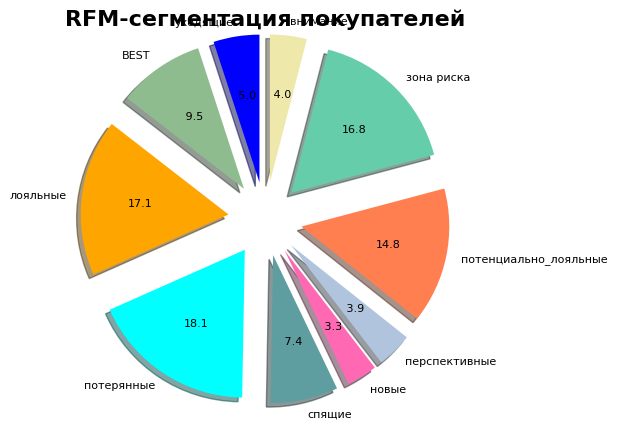

In [ ]:
colors  = ("blue", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 8},
                                                 autopct = '%4.1f',
                                                 startangle= 90,
                                                 radius =1,
                                                 rotatelabels=False,
                                                 shadow = True,
                                                 explode = explodes)
plt.ylabel("")
plt.title("RFM-сегментация покупателей",fontsize=16,fontweight="bold");

Исходя из диаграммы, самый большой сегмент составляют "потерянные" клиенты (18% - 3146 человек), на втором месте "лояльные" (17% - 2985),  далее  - "зона риска" (17% - 2932), примерно одинаковое количество "новых" (580 - 3,3%), "перспективных"(672 - 4%) и "требующих внимания"(4%), "уходящих" (5%). "Чемпионов" (BEST) тоже немного - 9,5% (1651 - вдвое меньше потерянных) . Не так все плохо, особенно если учесть, что анализируемые товары - длительного пользования (велосипеды люди покупают нечасто) - один раз за весь анализируемый период (2014-2016 гг.), гораздо чаще приобретаются запчасти, аксессуары и спортивная одежда (об ассортименте речь пойдет ниже)

In [ ]:
rfm_df[["recency", "frequency", "monetary"]].agg(["mean"])

recency  frequency     monetary
mean  152.015507    1.22071  1492.261183

In [ ]:
rfm_df[["Segment","recency", "frequency", "monetary"]].groupby("Segment").agg(["mean", "count","sum"])

recency               frequency              \
                             mean count     sum      mean count   sum   
Segment                                                                 
BEST                    25.531193  1651   42152  2.013325  1651  3324   
внимание               143.578571   700  100505  1.000000   700   700   
зона риска             257.706685  2932  755596  1.000000  2932  2932   
лояльные               110.975209  2985  331261  1.542714  2985  4605   
новые                   26.281034   580   15243  1.000000   580   580   
перспективные           79.437500   672   53382  1.000000   672   672   
потенциально_лояльные   53.320945  2583  137728  1.000000  2583  2583   
потерянные             259.671964  3146  816928  1.000000  3146  3146   
спящие                 143.611327  1289  185115  1.000000  1289  1289   
уходящие               239.112128   874  208984  1.629291   874  1424   

                          monetary                    
                              mean count         sum  
Segment                                               
BEST                   1941.230515  1651  3204971.58  
внимание                918.842800   700   643189.96  
зона риска              897.734635  2932  2632157.95  
лояльные               1843.457072  2985  5502719.36  
новые                  1523.213483   580   883463.82  
перспективные          1511.030536   672  1015412.52  
потенциально_лояльные  1555.429408  2583  4017674.16  
потерянные             1501.579704  3146  4723969.75  
спящие                 1376.887324  1289  1774807.76  
уходящие               1813.369394   874  1584884.85

Критически важные клиенты:
"BEST" ("чемпионы"), "лояльные клиенты", "уходящие".
Они нуждаются в особом внимании. "Уходящих" всего 5%, а "чемпионы" и "лояльные" в сумме составляют 26,6 процентов. В сегменте "уходящих" пока немного - 874 человека, которые в последний раз совершали покупки почти 2 месяца назад, соответственно раз в 3-4 месяца можно делать им рассылку с акциями и бонусами, дабы подбодрить к продажам.
"Чемпионы" принесли за 2016 г - 3,2 млн фунтов, выручка "лояльных" составила 5,5 млн, "потенциально-лояльных" - 4 млн. Поскольку сегмент "чемпионов" состоит из клиентов, которые чаще всех тратят деньги и могут легко адаптироваться к новым продуктам и услугам, для этого сегмента можно применять стратегии перекрестных продаж, а также поздравлять с праздниками, например.
Выручка "потерянных" составила 4,72 млн, "новых" же 0,88 млн. Т.е. доход от "новых" клиентов не перекрывает выручку последних. Либо придется будить "спящих" - это 1,78 млн выручки, либо увеличивать количество "новых". Тем более что портрет потенциального покупателя у нас есть, значит можно разработать именно такие рекламные мероприятия, которые будут максимально эффективны.

### Второй вариант RFM-анализа за 2016 г

In [ ]:
today = dt.datetime(2016,12,31)
print(today)

df_16 = df5[df5['order_quantity'] > 0]
df_16 = df5[df5['revenue'] > 0]
df_16.shape

2016-12-31 00:00:00


(52761, 52)

Назначила дату "Сегодня" - это следующий день после "максимальной даты" исследуемого датасета. Отсекаем отрицательные значения в столбцах количества и прибыли - "на всякий случай". Далее рассчитаем показатели "давности"(data_x), "денежности"(data_y) и "частоты" (data_z) посредством группировок столбца "customer_id"

In [ ]:
data_x = df_16.groupby('customer_id').agg({'revenue': lambda x: x.sum(),
                                        'order_date': lambda x: (today - x.max()).days})
data_x.head()

revenue  order_date
customer_id                     
11000        4849.00         241
11001        5428.82          19
11002        4714.05         308
11003        4739.30         234
11004        7215.08         243

In [ ]:
data_y = df_16.groupby(['customer_id','order_number']).agg({'revenue': lambda x: x.sum()})
data_y.head(6)

revenue
customer_id order_number         
11000       51522         2341.97
            57418         2507.03
11001       51493         4839.86
            72773          588.96
11002       51238         2294.99
            53237         2419.06

In [ ]:
data_z = data_y.groupby('customer_id').agg({'revenue': lambda x: len(x)})
data_z.head()

revenue
customer_id         
11000              2
11001              2
11002              2
11003              2
11004              2

In [ ]:
# RFM таблица
rfm_table= pd.merge(data_x,data_z, on='customer_id')

In [ ]:
# переименуем столбцы
rfm_table.rename(columns= {'order_date': 'Recency',
                          'revenue_y': 'Frequency',
                          'revenue_x': 'Monetary'}, inplace= True)
rfm_table.head()

Monetary  Recency  Frequency
customer_id                              
11000         4849.00      241          2
11001         5428.82       19          2
11002         4714.05      308          2
11003         4739.30      234          2
11004         7215.08      243          2

Разобьем на квантили и применим функцию:

In [ ]:
def FScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]:
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

quantiles = rfm_table.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(FScore, args=('Frequency',quantiles,))

#Recency
rfm_table = rfm_table.sort_values('Recency',ascending=True)
rfm_table['Rec_Tile'] = pd.qcut(rfm_table['Recency'],5,labels=False)

#Monetary
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'],5,labels=False)

# дабы избежать нуля, прибавляем 1
rfm_table['Rec_Tile'] = rfm_table['Rec_Tile'] + 1
rfm_table['Freq_Tile'] = rfm_table['Freq_Tile'] + 1
rfm_table['Mone_Tile'] = rfm_table['Mone_Tile'] + 1

# добавляем столбец в RFM-таблицу
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
28955           14.98        1          1          1         1          1   
18418         2322.28        1          1          1         1          4   
28517          578.46        1          1          1         1          3   
21266         2475.97        1          1          1         1          5   
17967           32.27        1          1          1         1          1   

            RFM Score  
customer_id            
28955             111  
18418             114  
28517             113  
21266             115  
17967             111

Клиенты ранжируются в порядке возрастания процентиля. Например, клиент, купивший недавно, будет составлять 100-й процентиль. Затем клиенты ранжируются по шкале от 1 до 5, основанной на их процентиле, где 5 - самый высокий балл.

In [ ]:
rfm_table[rfm_table['RFM Score'] == '555'].sort_values('Monetary', ascending=False).head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
12315        19016.12      291          2          5         5          5   
12328        11937.16      284          2          5         5          5   
11008        11668.10      303          2          5         5          5   
12286        10422.19      255          2          5         5          5   
12381        10107.22      255          2          5         5          5   

            RFM Score  
customer_id            
12315             555  
12328             555  
11008             555  
12286             555  
12381             555

Лучшие клиенты с показателем "555"

In [ ]:
rfm_table[rfm_table['Rec_Tile'] <= 2 ].sort_values('Monetary', ascending=False).head()


Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
12321        21578.54       37          4          5         1          5   
11242        20210.15       25          6          5         1          5   
12131        19515.21       80          4          5         2          5   
12132        19418.18       73          4          5         2          5   
15490        19254.08       44          2          5         1          5   

            RFM Score  
customer_id            
12321             155  
11242             155  
12131             255  
12132             255  
15490             155

Клиенты, находящие на грани ухода (R  = 1 или 2)

In [ ]:
rfm_table[rfm_table['RFM Score'] == '111'].sort_values('Recency',ascending=False).head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
18340           39.98       50          1          1         1          1   
15335           39.98       50          1          1         1          1   
26397           39.98       50          1          1         1          1   
20771           46.47       50          1          1         1          1   
25083           36.59       50          1          1         1          1   

            RFM Score  
customer_id            
18340             111  
15335             111  
26397             111  
20771             111  
25083             111

Потерянные клиенты ("111")

In [ ]:
rfm_table[rfm_table['Freq_Tile'] >= 3 ].sort_values('Monetary', ascending=False).head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
13575        21734.49      149          3          5         3          5   
12321        21578.54       37          4          5         1          5   
11242        20210.15       25          6          5         1          5   
12131        19515.21       80          4          5         2          5   
12132        19418.18       73          4          5         2          5   

            RFM Score  
customer_id            
13575             355  
12321             155  
11242             155  
12131             255  
12132             255

Лояльные клиенты - клиенты, покупающие часто (F >=3)

In [ ]:
rfm_table['RFM_Sum'] = rfm_table[['Freq_Tile','Rec_Tile','Mone_Tile']].sum(axis=1)
rfm_table.head()
# складываем все три показателя друг с другм - получаем RFM_Sum

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
28955           14.98        1          1          1         1          1   
18418         2322.28        1          1          1         1          4   
28517          578.46        1          1          1         1          3   
21266         2475.97        1          1          1         1          5   
17967           32.27        1          1          1         1          1   

            RFM Score  RFM_Sum  
customer_id                     
28955             111        3  
18418             114        6  
28517             113        5  
21266             115        7  
17967             111        3

"Can\'t Loose Them" = "нельзя потерять", 'Champions' = "чемпионы", 'Loyal' ="лояльные", 'Needs Attention' = "требующие внимания", 'Potential' = "потенциальные", 'Promising' = "многообещающие", 'Require Activation' = "спящие".

чемпионы [R(4 – 5), F(4 – 5)];
лояльные [R(3 – 4), F(4 – 5)];
потенциально-лояльные [R(4 – 5), F(2 – 3)];
многообещающие [R(3 – 4), F(0 – 1)];
нельзя потерять [R(1 – 2), F(4 – 5)];
в зоне риска [R(1 – 2), F(3 – 4)];
спящие [R(2 – 3), F(1-2)];
потерянные [R(1 – 2), F(1 – 2)];
новые R [(4 – 5), F(0 – 1)];
требующие внимания R [(2 – 3), F(2 – 3)]

Применим к датафрейму функцию по ранжированию клиентов согласно сумме показателей R+F+M (RFM_Sum). В данной классификации нет "потеранных клиентов" - видимо, автор считает, что нужно бороться до конца

In [ ]:
def rfm_level(df):
    if df['RFM_Sum'] >= 9:
        return 'Нельзя потерять'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Чемпионы'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Лояльные'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Потенциальные'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Многообещающие'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Требующие внимания'
    else:
        return 'Спящие'

rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)

rfm_table.head()

Monetary  Recency  Frequency  Freq_Tile  Rec_Tile  Mone_Tile  \
customer_id                                                                 
28955           14.98        1          1          1         1          1   
18418         2322.28        1          1          1         1          4   
28517          578.46        1          1          1         1          3   
21266         2475.97        1          1          1         1          5   
17967           32.27        1          1          1         1          1   

            RFM Score  RFM_Sum       RFM_Level  
customer_id                                     
28955             111        3          Спящие  
18418             114        6   Потенциальные  
28517             113        5  Многообещающие  
21266             115        7        Лояльные  
17967             111        3          Спящие

In [ ]:
rfm_table["RFM_Level"].value_counts()

RFM_Level
Нельзя потерять       5815
Лояльные              3198
Чемпионы              2608
Потенциальные         2593
Многообещающие        1696
Требующие внимания     999
Спящие                 503
Name: count, dtype: int64

In [ ]:
rfm_level_agg = rfm_table.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)

print(rfm_level_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Лояльные             162.7       1.0   1280.3  3198
Многообещающие        92.5       1.0    170.4  1696
Нельзя потерять      192.3       1.6   2800.6  5815
Потенциальные        115.5       1.0    661.5  2593
Спящие                25.8       1.0     25.1   503
Требующие внимания    55.8       1.0     49.6   999
Чемпионы             178.6       1.1   1356.2  2608


Можно вычислить средние значения для каждого RFM_уровня и вернуть размер каждого сегмента

In [ ]:
!pip install squarify

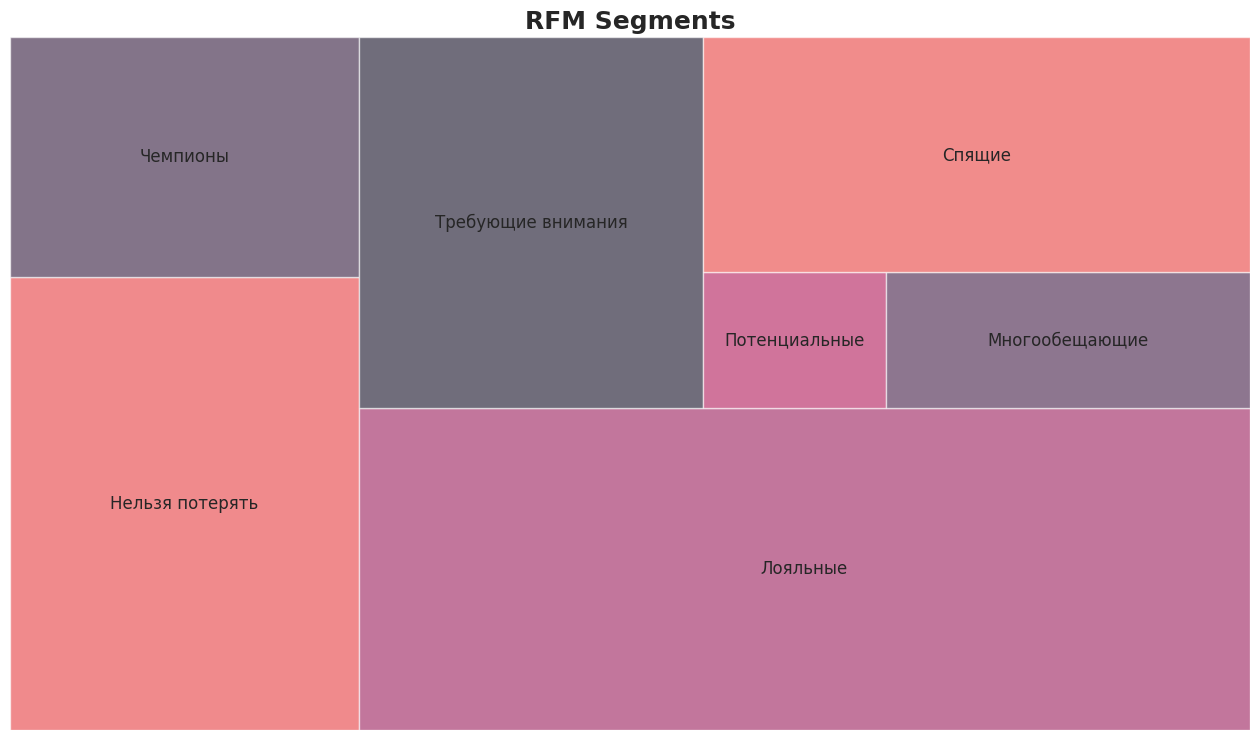

In [ ]:
import squarify
import matplotlib.pyplot as plt
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Нельзя потерять',
                     'Чемпионы',
                     'Лояльные',
                     'Требующие внимания',
                     'Потенциальные',
                     'Многообещающие',
                     'Спящие'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Нельзя потерять	5815
Лояльные	3198
Чемпионы	2608
Потенциальные	2593
Многообещающие	1696
Требующие внимания	999
Спящие	503

Если смотреть на график, полученный в результате второго варианта RFM - анализа, то возникают сомнения. Принцип суммирования баллов, видимо, неидеально работает. Самая большая группа клиентов - "нельзя потерять" (5815 - 33,4%) может включать в себя и "потерянных", и "уходящих". Чтобы не тратить ресурсы продавцов на бессмысленные звонки уже "ушедшим", их все-таки лучше разделять. Следующий по объему сегмент  - "лояльные" (3198 - 18,4%) - по сравнению с предыдущим вариантом расчета, их количество снизилось почти на 10%. "Чемпионов" же, напротив, стало почти в 2 раза больше (15% против 9%). "Требующих внимания" 5,7%, а спящих 2,9% (меньше, чем в предыдущем варианте)

### Товары

Рассмотрим товарные группы исследуемого датасета

In [ ]:
print(f'Средняя цена товаров: {round(df.unit_price.mean(), 1)} фунтов')
print(f'Средняя выручка: {round(df.revenue.mean(), 1)} фунтов')
print(f'Средняя прибыль: {round(df.profit.mean(), 1)} фунтов')
print(f'Средняя маржинальность товаров {round(df.marginality.mean(), 1)} %')

Средняя цена товаров: 503.7 фунтов
Средняя выручка: 790.1 фунтов
Средняя прибыль: 261.7 фунтов
Средняя маржинальность товаров 45.2 %


In [ ]:
p_profit = pd.pivot_table(data=df,
    index=['category', 'sub_category', 'productLine', 'model'],
    values=['profit'],
    aggfunc=['min','max', 'mean']).style.background_gradient()
p_profit

По данным за три года самые прибыльные товары входили в категорию «велосипеды», подкатегорию «горные велосипеды», модельный ряд "Mountain-100". Далее шли "дорожные велосипеды" "Road-150". Замыкали тройку лидеров по средней прибыли модели "горных велосипедов" "Mountain-200" Самыми низкоприбыльными оказались: велосипедная кепка (категория «одежда» - средняя прибыль 2,1 фунт) и патчи (1,9 фунтов).

Рассмотрим, как менялся модельный ряд и товары по годам

In [ ]:
p14_profit = pd.pivot_table(data=df14,
    index=['model','product'],
    values=['profit'],
    aggfunc=['mean']).style.background_gradient()
p14_profit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ассортимент товаров в 2014 был ограничен - всего 25 наименований велосипедов. Самыми прибыльными были "Mountain-100 Silver" (1910 - 2060 фунтов средняя прибыль), на втором месте - аналогичная модель в черном цвете (1636 - 1842 фунта средняя прибыль) и красный "Road-150 Red" (1666 - 1837 фунтов средняя прибыль). "Road-650" приносил гораздо меньше - от 284 до 504 фунтов средней прибыли.

In [ ]:
p15_profit = pd.pivot_table(data=df15,
    index=['model','product'],
    values=['profit'],
    aggfunc=['mean']).style.background_gradient()
p15_profit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


В 2015 году ассортимент изменился - немного расширился. Он составлял 4 линейки («Mountain-200», «Road-250», «Road-650» и «Road-550») и 31 модель. Появилась новая модель «Road-550W» желтого цвета. Старые модели заменили: "Mountain-100" на "Mountain-200" и "Road-150" на "Road-250". Прибыль по заменителям снизилась. На моделях "Mountain-200" средняя прибыль колебалась от 1105 до 1347 фунтов, на "Road-250" - от 1129 до 1206 фунтов. Прибыльность старой модели "Road-650" тоже снизилась и составляла в среднем 294-395 фунтов.
Средняя прибыль новых желтых велосипедов в 2015 г колебалась от 469 до 511 фунтов


In [ ]:
p_profit16 = pd.pivot_table(data=df5,
    index=[ 'model', 'product'],
    values=['profit'],
    aggfunc=['mean']).style.background_gradient()
p_profit16

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


В 2016  подкатегория «велосипеды» включала уже 10 модельных линий («Mountain-200», «Mountain-400», «Mountain-500», «Road-250», «Road-350», «Road-550», «Road-750», «Touring-1000», «Touring-2000», «Touring-3000»)  и 63 модели, самая высокая средняя прибыль была у "Mountain-200" - от 1274 до 1403 фунта. Средняя прибыль новых моделей туристических велосипедов была такой же, как и дорожных: от 314 до 1244 фунтов

Проанализируем товары из двух категорий (по среднему значению): доступные (стоимостью менее 505 фунтов) и дорогостоящие (более 505 фунтов).

In [ ]:
casual=df[df['unit_price']<=505]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cas_profit = pd.pivot_table(data=casual,
    index=['category', 'sub_category', 'productLine', 'model'],
    values=['profit', 'marginality'],
    aggfunc=['mean']).style.background_gradient()
cas_profit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


В целом средняя маржинальность товаров стоимостью менее 505 фунтов была выше (почти 55%), чем у более дорогого сегмента - за исключением кепок, лонг-сливов и шорт-сливов из джерси (15%). Средняя прибыль тоже была довольно низкой, за исключением двух товаров. Хитом по средней прибыли была подскавка под велосипед (144 фунта), на втором месте прицепная стойка (105 фунтов).

In [ ]:
expens=df[df['unit_price']>505]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exp_profit = pd.pivot_table(data=expens,
    index=['category', 'sub_category', 'productLine', 'model'],
    values=['profit', 'marginality'],
    aggfunc=['mean']).style.background_gradient()
exp_profit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя прибыль дорогих товаров (стоимостью более 505 фунтов) гораздо больше, чем дешевых. Лидерами были велосипеды моделей "Mountain-100" (1884 фунта), "Road-150" (1757 фунтов), "Mountain-200" (1317 фунтов). Однако маржинальность дорогих товаров была ниже - в среднем 30 - 38% (более дешевых - выше 54%)

In [ ]:
df.sub_category.value_counts()

sub_category
Tires and Tubes      16299
Road Bikes            8068
Bottles and Cages     7719
Helmets               6171
Mountain Bikes        4970
Jerseys               3179
Touring Bikes         2167
Caps                  2095
Fenders               2014
Gloves                1363
Shorts                 958
Cleaners               864
Hydration Packs        706
Socks                  543
Vests                  527
Bike Racks             308
Bike Stands            238
Name: count, dtype: int64

Рассмотрим подкатегории товаров. Чаще покупали шины и велосипедные камеры (16299 заказов), в два раза реже дорожные велосипеды (8068), бутылки и багажники (7719), а также шлемы (6171). Реже всего покупали подставки под велосипеды (238). В виду хорошей прибыльности данный товар исключать из ассортимента нельзя, как и редкопродающиеся велосипедные стойки (308)

In [ ]:
sub_profit = pd.pivot_table(data=expens,
    index=['year', 'month','sub_category', 'model'],
    values=['profit', 'revenue'],
    aggfunc=['mean']).style.background_gradient()
sub_profit

Средняя прибыль по подкатегориям «Горные велосипеды» и «Дорожные велосипеды» была выше в 2014 году. Для «Mountain -100» она составляла 1412 - 2579 фунтов, в 2015 году данную модель заменили на "Mountain-200", средняя прибыль которой в 2015 году колебалась от 1087 до 1347 фунтов и от 1051 до 1454 в 2016 году – в зависимости от месяца. Высокоприбыльная модель "Road-150", которая в 2014 приносила от 1681 до 1910 фунтов прибыли в месяц, в 2015 году была снята с производства, а ее преемница "Road 250" в 2015 году приносила уже меньше прибыли: от 937 до 1195 фунтов в месяц в 2015 году и от 937 до 1229 фунтов в месяц в 2016 году.  Модель "Road-650", которая приносила от 302 до 529 фунтов в месяц в 2014, в 2015 году приносила меньше: от 287 до 434 фунтов в месяц. В 2016 году ее заменила модель "Road-750", прибыль которой колебалась от 212 до 262 фунтов в месяц.
Если средняя прибыль отдельных товаров с годами снижалась, то суммарная выручка только увеличивалась.
Так как ударные модели, с которых начиналась торговля в 2014, имели самую высокую среднюю прибыль, и клиенты их покупающие - люди возрастные, возможно, имеет смысл провести рекламную кампанию, рассчитанную на людей старшего возраста, имеющих высшее образование, но не имеющих машину, проживающих в частных домах в окрестностях крупных городов. Стоит рассмотреть размещение рекламы на билбордах при въездах в гороода или, например, рекламу в общественном пригородном транспорте.


In [ ]:
import plotly.express as px
Frequency_of_items = df5.groupby(pd.Grouper(key='product_id')).size().reset_index(name='order_quantity')
fig = px.treemap(Frequency_of_items, path=['product_id'], values='order_quantity')
fig.update_layout(title_text='Частота продаж товаров датасета',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Чаще всего в 2016 году покупали: бутылки для воды (4076), патчи (3010), шины для горных(2908)  и дорожных (2216)велосипедов, красные шлемы (2150), кепки с логотипом (2095), синие шлемы (2029), комплект крыльев (2014), шины для спортивных велосипедов (1992), подсумники для горных(1941) и дорожных (1702) велосипедов, 1649 велосипедов ходовой модели "Mountain-200", по остальным наименованиям продажи были менее 500 шт.

Проведем XYZ анализ товаров по данным 2016 г

XYZ-анализ - это метод классификации, который подразделяет товары на три категории в зависимости от регулярности спроса на них.

Класс X: Представляет товары с регулярным и предсказуемым спросом.

Класс Y: Представляет товары с нерегулярным спросом.

Класс Z: Представляет товары с почти случайным и непредсказуемым спросом.

Анализ позволяет более эффективно управлять ассортиментом, запасами, осуществлять планирование.

In [ ]:
summarized_data_by_month2 = df5.groupby(['product_id','month'])['order_quantity'].sum().to_frame().reset_index()
summarized_data_by_month2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



product_id  month  order_quantity
0         214      1              73
1         214      2             246
2         214      3             248
3         214      4             205
4         214      5             274

In [ ]:
summarized_data_by_month2 = summarized_data_by_month2.pivot(index='product_id', columns='month', values='order_quantity')\
                           .add_prefix('month_').reset_index().fillna(0)
summarized_data_by_month2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0             214     73.0    246.0    248.0    205.0    274.0    390.0   
1             217     70.0    213.0    255.0    270.0    261.0    320.0   
2             222     74.0    220.0    218.0    236.0    258.0    312.0   
3             225     72.0    268.0    221.0    223.0    246.0    338.0   
4             228     11.0     46.0     40.0     41.0     49.0     68.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  
0        295.0    280.0    311.0     303.0     401.0     372.0  
1        229.0    247.0    288.0     268.0     313.0     360.0  
2        238.0    254.0    329.0     295.0     379.0     380.0  
3        267.0    303.0    307.0     276.0     333.0     324.0  
4         62.0     65.0     61.0      56.0      82.0      70.0

Рассчитаем стандартное отклонение по товарам

In [ ]:
summarized_data_by_month2['std_demand'] = summarized_data_by_month2[["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"]].std(axis=1)
summarized_data_by_month2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0             214     73.0    246.0    248.0    205.0    274.0    390.0   
1             217     70.0    213.0    255.0    270.0    261.0    320.0   
2             222     74.0    220.0    218.0    236.0    258.0    312.0   
3             225     72.0    268.0    221.0    223.0    246.0    338.0   
4             228     11.0     46.0     40.0     41.0     49.0     68.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  
0        295.0    280.0    311.0     303.0     401.0     372.0   89.182992  
1        229.0    247.0    288.0     268.0     313.0     360.0   71.836726  
2        238.0    254.0    329.0     295.0     379.0     380.0   83.048133  
3        267.0    303.0    307.0     276.0     333.0     324.0   72.667153  
4         62.0     65.0     61.0      56.0      82.0      70.0   18.528234

In [ ]:
summarized_data_by_month2['total_demand'] = summarized_data_by_month2.iloc[:, 1:13].sum(axis=1)
summarized_data_by_month2['average_demand'] = summarized_data_by_month2.iloc[:, 1:13].mean(axis=1)
summarized_data_by_month2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0             214     73.0    246.0    248.0    205.0    274.0    390.0   
1             217     70.0    213.0    255.0    270.0    261.0    320.0   
2             222     74.0    220.0    218.0    236.0    258.0    312.0   
3             225     72.0    268.0    221.0    223.0    246.0    338.0   
4             228     11.0     46.0     40.0     41.0     49.0     68.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
0        295.0    280.0    311.0     303.0     401.0     372.0   89.182992   
1        229.0    247.0    288.0     268.0     313.0     360.0   71.836726   
2        238.0    254.0    329.0     295.0     379.0     380.0   83.048133   
3        267.0    303.0    307.0     276.0     333.0     324.0   72.667153   
4         62.0     65.0     61.0      56.0      82.0      70.0   18.528234   

month  total_demand  average_demand  
0            3398.0      283.166667  
1            3094.0      257.833333  
2            3193.0      266.083333  
3            3178.0      264.833333  
4             651.0       54.250000

Рассчитаем коэффициент вариации

In [ ]:
summarized_data_by_month2['cov_demand'] = summarized_data_by_month2['std_demand'] / summarized_data_by_month2['average_demand']
summarized_data_by_month2.head()
#std делим на среднее

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
0             214     73.0    246.0    248.0    205.0    274.0    390.0   
1             217     70.0    213.0    255.0    270.0    261.0    320.0   
2             222     74.0    220.0    218.0    236.0    258.0    312.0   
3             225     72.0    268.0    221.0    223.0    246.0    338.0   
4             228     11.0     46.0     40.0     41.0     49.0     68.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
0        295.0    280.0    311.0     303.0     401.0     372.0   89.182992   
1        229.0    247.0    288.0     268.0     313.0     360.0   71.836726   
2        238.0    254.0    329.0     295.0     379.0     380.0   83.048133   
3        267.0    303.0    307.0     276.0     333.0     324.0   72.667153   
4         62.0     65.0     61.0      56.0      82.0      70.0   18.528234   

month  total_demand  average_demand  cov_demand  
0            3398.0      283.166667    0.314949  
1            3094.0      257.833333    0.278617  
2            3193.0      266.083333    0.312113  
3            3178.0      264.833333    0.274388  
4             651.0       54.250000    0.341534

In [ ]:
summarized_data_by_month2.sort_values(by='cov_demand', ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
67            569      4.0      2.0      5.0      2.0      6.0     11.0   
97            599      1.0      5.0      4.0      1.0      2.0     15.0   
84            586      8.0      8.0      5.0      7.0      1.0     16.0   
70            572      3.0      1.0      3.0      0.0      4.0     15.0   
65            567      0.0      4.0     18.0      3.0      1.0     10.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
67         3.0      6.0      7.0      20.0      21.0       5.0    6.471382   
97         8.0      6.0     10.0       5.0      22.0      12.0    6.287915   
84         4.0      2.0      1.0       4.0       4.0      17.0    5.282188   
70         5.0     12.0      4.0      12.0       6.0      11.0    4.905161   
65         3.0      6.0      7.0      13.0      15.0      13.0    5.925676   

month  total_demand  average_demand  cov_demand  
67             92.0        7.666667    0.844093  
97             91.0        7.583333    0.829176  
84             77.0        6.416667    0.823198  
70             76.0        6.333333    0.774499  
65             93.0        7.750000    0.764603

In [ ]:
print(summarized_data_by_month2['cov_demand'].min(), summarized_data_by_month2['cov_demand'].max(),summarized_data_by_month2['cov_demand'].mean())

0.21765343078789184 0.8440933334612616 0.43836841232404283


Минимальное значение коэффициента вариации (CV) равно 0,22, максимальное 0,84, среднее 0,43

Создадим функцию, которая берет значение cov_demand из нашего датафрейма, а затем присваивает соответствующий класс на основе правил коэффициента вариации XYZ, которые мы определили ниже.

In [ ]:
def xyz_classify_product(cov):
    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
summarized_data_by_month2['xyz_class'] = summarized_data_by_month2['cov_demand'].apply(xyz_classify_product)
summarized_data_by_month2.xyz_class.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



xyz_class
X    72
Y    30
Name: count, dtype: int64

По результатам анализа выделились 2 класса "X" (70,6%) и "Y" (29,4%)

In [ ]:
summarized_data_by_month2[60:110]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



month  product_id  month_1  month_2  month_3  month_4  month_5  month_6  \
60            562      4.0      9.0     13.0     16.0     26.0     26.0   
61            563      6.0      6.0      6.0     18.0     20.0     30.0   
62            564      6.0      9.0     11.0      9.0     15.0     28.0   
63            565     14.0      5.0      0.0      3.0     12.0      3.0   
64            566      6.0      6.0      1.0      9.0     10.0      4.0   
65            567      0.0      4.0     18.0      3.0      1.0     10.0   
66            568      0.0      7.0      4.0      9.0      3.0     10.0   
67            569      4.0      2.0      5.0      2.0      6.0     11.0   
68            570      0.0      4.0     10.0      5.0      8.0      7.0   
69            571      4.0      7.0      2.0      1.0      4.0     15.0   
70            572      3.0      1.0      3.0      0.0      4.0     15.0   
71            573      9.0      3.0     15.0     19.0     19.0     32.0   
72            574      7.0      1.0     12.0     23.0     19.0     24.0   
73            575      8.0     22.0      5.0     10.0     16.0     26.0   
74            576      5.0      7.0     18.0     12.0     16.0     27.0   
75            577      5.0      8.0     17.0     10.0      9.0     20.0   
76            578      5.0     10.0     12.0     10.0     11.0     19.0   
77            579      6.0     11.0      1.0     15.0     14.0     19.0   
78            580     15.0     14.0     22.0     16.0     35.0     35.0   
79            581     12.0      9.0     22.0     18.0     47.0     36.0   
80            582     16.0     13.0     10.0     10.0     27.0     39.0   
81            583     13.0     12.0     11.0     17.0     16.0     53.0   
82            584     28.0     35.0     46.0     29.0     36.0     63.0   
83            585      8.0      2.0      5.0      6.0      5.0      9.0   
84            586      8.0      8.0      5.0      7.0      1.0     16.0   
85            587     10.0      4.0     13.0     24.0     15.0     25.0   
86            588      9.0     15.0      8.0      8.0     10.0     29.0   
87            589      3.0      9.0     10.0     10.0     14.0     26.0   
88            590     14.0      9.0      7.0     14.0     16.0     17.0   
89            591      4.0      5.0      2.0      7.0      6.0      5.0   
90            592      3.0      1.0      3.0      1.0     11.0      4.0   
91            593      9.0      1.0      2.0      4.0      6.0      4.0   
92            594      3.0      6.0      1.0     10.0     13.0      6.0   
93            595      3.0      2.0      7.0      6.0      3.0     16.0   
94            596      6.0      4.0      6.0      1.0      4.0     11.0   
95            597      6.0      6.0      5.0      1.0      2.0     13.0   
96            598      4.0      4.0      3.0      4.0      5.0     10.0   
97            599      1.0      5.0      4.0      1.0      2.0     15.0   
98            600      1.0      2.0      0.0      6.0      2.0      5.0   
99            604     25.0     21.0     40.0     39.0     35.0     66.0   
100           605     26.0     52.0     43.0     46.0     41.0     62.0   
101           606     22.0     32.0     17.0     24.0     64.0     69.0   

month  month_7  month_8  month_9  month_10  month_11  month_12  std_demand  \
60        25.0     29.0     30.0      18.0      23.0      26.0    8.349832   
61        11.0     19.0     24.0      26.0      23.0      35.0    9.717214   
62        17.0     17.0     22.0      24.0      39.0      19.0    9.341987   
63         8.0     12.0      7.0       7.0       3.0       4.0    4.337993   
64         6.0      6.0      7.0      12.0       7.0       7.0    2.800162   
65         3.0      6.0      7.0      13.0      15.0      13.0    5.925676   
66         3.0      9.0     10.0       7.0      16.0      17.0    5.107184   
67         3.0      6.0      7.0      20.0      21.0       5.0    6.471382   
68         6.0      5.0      4.0       3.0      18.0       8.0    4.4822

Класс "Y" составили следующие товары: желтые модели дорожных велосипедов "Road-550" (388, 390), туристические рамы (503, 505), туристические велосипеды "Touring-1000" (561,568-573, 563-565, 579), желтые дорожные велосипеды "Road-350"(580, 582, 583), синие туристические велосипеды "Touring-3000" (586), серебрисные горные велосипеды "Mountain-400" (589), серебристые горные велосипеды "Mountain-500" (591-597), черные горные велосипеды "Mountain-500"
(598-600). Остальные товары вошли в класс "X" (продаются чаще)

In [ ]:
summarized_data_by_month2.groupby('xyz_class').agg(
    total_skus=('product_id', 'nunique'),
    total_demand=('total_demand', 'sum'),
    std_demand=('std_demand', 'mean'),
    avg_demand=('average_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

total_skus  total_demand  std_demand  avg_demand  avg_cov_demand
xyz_class                                                                  
X                  72       78327.0   28.350491   90.656250        0.357616
Y                  30        4557.0    7.540322   12.658333        0.632174

Таким образом, спрос на товары датасета стабильный, примерно две трети товаров характеризуются вариативностью ниже 10%, остальная треть - от 10 до 25%. Спрос можно прогнозировать.

Проведем АВС-анализ клиентов датасета за 2016 год

Группируем по столбцу id продукта с функцией агрегации сумма выручки

In [ ]:
df_8 = df5.groupby('product_id').agg(total_revenue=('revenue','sum')).sort_values(by='total_revenue', ascending=False).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_8['year_month']=df5['year'].map(str) + '-' + df5['month'].map(str)
df_8.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



product_id  total_revenue year_month
0         353     1582233.18     2016-1
1         361     1576658.13     2016-1
2         359     1558298.21     2016-1
3         363     1489448.51     2016-1
4         355     1449993.75     2016-1

Рассчитываем накопление по месяцам, нормируем кумулятивную сумму и смотрим, сколько товар вкладывает в выручку

In [ ]:
df_8['rev_cum_sum'] = df_8['total_revenue'].cumsum()
df_8['rev_all'] = df_8['total_revenue'].sum()
df_8['rev_percent'] = df_8['rev_cum_sum']/df_8['rev_all']
df_8.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



product_id  total_revenue year_month  rev_cum_sum      rev_all  \
0          353     1582233.18     2016-1   1582233.18  25983251.71   
1          361     1576658.13     2016-1   3158891.31  25983251.71   
2          359     1558298.21     2016-1   4717189.52  25983251.71   
3          363     1489448.51     2016-1   6206638.03  25983251.71   
4          355     1449993.75     2016-1   7656631.78  25983251.71   
5          357     1364154.12     2016-1   9020785.90  25983251.71   
6          573      698532.51     2016-1   9719318.41  25983251.71   
7          580      688900.95     2016-1  10408219.36  25983251.71   
8          582      615758.38     2016-1  11023977.74  25983251.71   
9          576      612705.99     2016-1  11636683.73  25983251.71   
10         581      610655.41     2016-1  12247339.14  25983251.71   
11         378      608394.15     2016-1  12855733.29  25983251.71   
12         583      598748.48     2016-1  13454481.77  25983251.71   
13         561      596017.50     2016-1  14050499.27  25983251.71   
14         562      584097.15     2016-1  14634596.42  25983251.71   
15         376      583960.65     2016-1  15218557.07  25983251.71   
16         575      581713.08     2016-1  15800270.15  25983251.71   
17         574      565024.59     2016-1  16365294.74  25983251.71   
18         374      554640.45     2016-1  16919935.19  25983251.71   
19         563      534031.68     2016-1  17453966.87  25983251.71   

    rev_percent  
0      0.060894  
1      0.121574  
2      0.181547  
3      0.238871  
4      0.294676  
5      0.347177  
6      0.374061  
7      0.400574  
8      0.424272  
9      0.447853  
10     0.471355  
11     0.494770  
12     0.517814  
13     0.540752  
14     0.563232  
15     0.585706  
16     0.608094  
17     0.629840  
18     0.651186  
19     0.671739

In [ ]:
def condition_abc(x):
 if x>0 and x<=0.80:
   return "A"
 elif x>0.80 and x<=0.90:
   return "B"
 else:
   return 'C'
df_8['ABC']=df_8['rev_percent'].apply(condition_abc)
df_8[:60]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



product_id  total_revenue year_month  rev_cum_sum      rev_all  \
0          353     1582233.18     2016-1   1582233.18  25983251.71   
1          361     1576658.13     2016-1   3158891.31  25983251.71   
2          359     1558298.21     2016-1   4717189.52  25983251.71   
3          363     1489448.51     2016-1   6206638.03  25983251.71   
4          355     1449993.75     2016-1   7656631.78  25983251.71   
5          357     1364154.12     2016-1   9020785.90  25983251.71   
6          573      698532.51     2016-1   9719318.41  25983251.71   
7          580      688900.95     2016-1  10408219.36  25983251.71   
8          582      615758.38     2016-1  11023977.74  25983251.71   
9          576      612705.99     2016-1  11636683.73  25983251.71   
10         581      610655.41     2016-1  12247339.14  25983251.71   
11         378      608394.15     2016-1  12855733.29  25983251.71   
12         583      598748.48     2016-1  13454481.77  25983251.71   
13         561      596017.50     2016-1  14050499.27  25983251.71   
14         562      584097.15     2016-1  14634596.42  25983251.71   
15         376      583960.65     2016-1  15218557.07  25983251.71   
16         575      581713.08     2016-1  15800270.15  25983251.71   
17         574      565024.59     2016-1  16365294.74  25983251.71   
18         374      554640.45     2016-1  16919935.19  25983251.71   
19         563      534031.68     2016-1  17453966.87  25983251.71   
20         564      514959.12     2016-1  17968925.99  25983251.71   
21         372      476453.25     2016-1  18445379.24  25983251.71   
22         380      461793.15     2016-1  18907172.39  25983251.71   
23         386      436991.10     2016-1  19344163.49  25983251.71   
24         382      403376.40     2016-1  19747539.89  25983251.71   
25         390      341749.45     2016-1  20089289.34  25983251.71   
26         388      338387.98     2016-1  20427677.32  25983251.71   
27         384      336147.00     2016-1  20763824.32  25983251.71   
28         606      328853.91     2016-1  21092678.23  25983251.71   
29         605      316974.13     2016-1  21409652.36  25983251.71   
30         604      300774.43     2016-1  21710426.79  25983251.71   
31         584      295914.52     2016-1  22006341.31  25983251.71   
32         578      207739.35     2016-1  22214080.66  25983251.71   
33         577      187086.90     2016-1  22401167.56  25983251.71   
34         579      182227.50     2016-1  22583395.06  25983251.71   
35         587      176982.70     2016-1  22760377.76  25983251.71   
36         589      164670.86     2016-1  22925048.62  25983251.71   
37         560      162789.90     2016-1  23087838.52  25983251.71   
38         590      157745.45     2016-1  23245583.97  25983251.71   
39         588      154667.49     2016-1  23400251.46  25983251.71   
40         214      118896.02     2016-1  23519147.48  25983251.71   
41         222      111723.07     2016-1  23630870.55  25983251.71   
42         217      108259.06     2016-1  23739129.61  25983251.71   
43         485       71193.22     2016-1  23810322.83  25983251.71   
44         537       70700.00     2016-1  23881022.83  25983251.71   
45         568       70523.25     2016-1  23951546.08  25983251.71   
46         567       69038.55     2016-1  24020584.63  25983251.71   
47         569       68296.20     2016-2  24088880.83  25983251.71   
48         585       64584.45     2016-2  24153465.28  25983251.71   
49         486       62646.00     2016-2  24216111.28  25983251.71   
50         487       61753.77     2016-2  24277865.05  25983251.71   
51         566       60130.35     2016-2  24337995.40  25983251.71   
52         483       59160.00     2016-2  24397155.40  25983251.71   
53         571       57903.30     2016-2  24455058.70  25983251.71   
54         570       57903.30     2016-2  24512962.00  25983251.71   
55         565       57903.30     2016-2  24570865.30  25983251.71   
56         586

В "А" класс вошли: горный велосипед "Mountain-200" (353, 355, 357, 359, 361, 363), дорожный велосипед "Road-250" (372, 374, 376, 378, 380), желтый дорожный велосипед "Road-550" (382, 386, 384, 388, 390), туристические "Touring-2000" (560, 577-579), "Touring-1000" (561-564, 573-576), "Road-350 "(580-583),
класс "В": "Road-750" (584, 604-606), горный велосипед "Mountain-400" (587-590)

In [ ]:
print(f"Количество товаров в классе А: {len(df_8.loc[df_8['ABC'] == 'A'])} - 27,5%")
print(f"Количество товаров в классе B: {len(df_8.loc[df_8['ABC'] == 'B'])} - 10,8%")
print(f"Количество товаров в классе C: {len(df_8.loc[df_8['ABC'] == 'C'])} - 61,7")

Количество товаров в классе А: 28 - 27,5%
Количество товаров в классе B: 11 - 10,8%
Количество товаров в классе C: 63 - 61,7


Группируем по столбцу и считаем выручку внутри классов

In [ ]:
df_8_check = df_8.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()
df_8_check
df_8_check.head()

<ipython-input-172-c03d57f86410>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_8_check = df_8.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()


ABC  total_revenue
0   A    20763824.32
1   B     2481759.65
2   C     2737667.74

Выручка товаров "А" класса составила 20763824,3 фунта, "В" - 2481759.7 фунтов, "С" - 2737667.74 фунтов

Посчитаем наценку на товары по 2016 году

In [ ]:
df5['наценка'] = 100*(df5['unit_price'] - df5['cost'])/df5['cost']

<ipython-input-191-85b1a5341d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['наценка'] = 100*(df5['unit_price'] - df5['cost'])/df5['cost']


In [ ]:
na_profit = pd.pivot_table(data=df5,
    index=['category', 'sub_category', 'model'],
    values=['наценка'],
    aggfunc=['mean']).style.background_gradient()
na_profit

Самая высокая средняя наценка была на все "Аксессуары", а также шорты, носки и майки -  167% (не считая налогов) Наценка на велосипеды была примернао в два раза ниже - от 61 до 83%. Самая низкая наценка на Short-Sleeve Classic и Long-Sleeve Logo из подкатегории "джерси" - 29,9%

<ipython-input-47-5cc2efa46fe4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="days_manufacture",


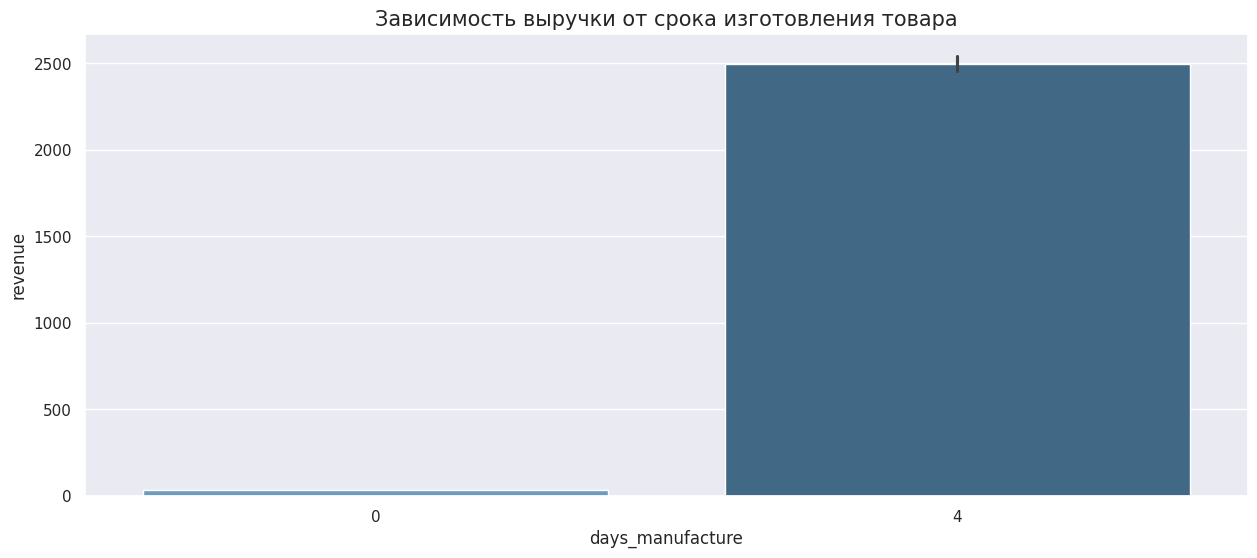

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="days_manufacture",
                 y="revenue",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость выручки от срока изготовления товара",fontsize=15)

Исходя из графика: чем дольше изготавливался товар, тем больше выручки он приносил.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-99-d233b469398a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




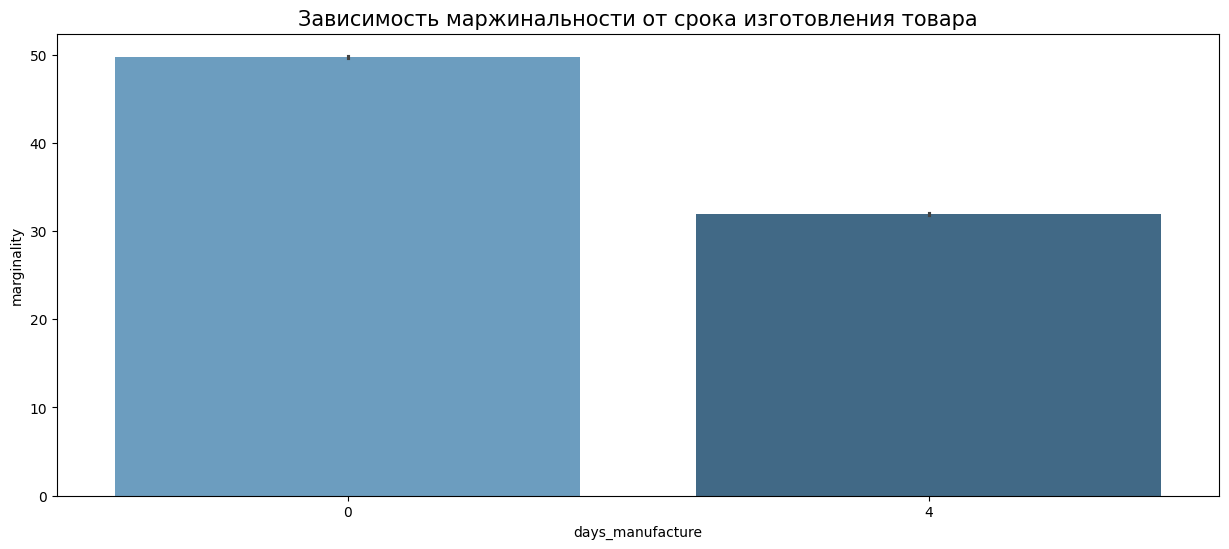

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="days_manufacture",
                 y="marginality",
                 data=df5,
                 palette="Blues_d")\
                .set_title("Зависимость маржинальности от срока изготовления товара",fontsize=15)

Маржинальность имела противоположную тенденцию: на товарах, отгружаемых в течение суток она была в полтора выше, чем на тех, которые изготавливались 4 дня

In [ ]:
df.promotion_id.value_counts()

promotion_id
1     56038
2      2118
13       20
14       13
Name: count, dtype: int64

Одним промокодом воспользоались 56038 раз (92%), двумя - 2118 раз (4%), 13-ю - 20 раз (0,03%), 14-ю - 13 раз (0,02%)

In [ ]:
df5 = df.loc[df['year']==2016]

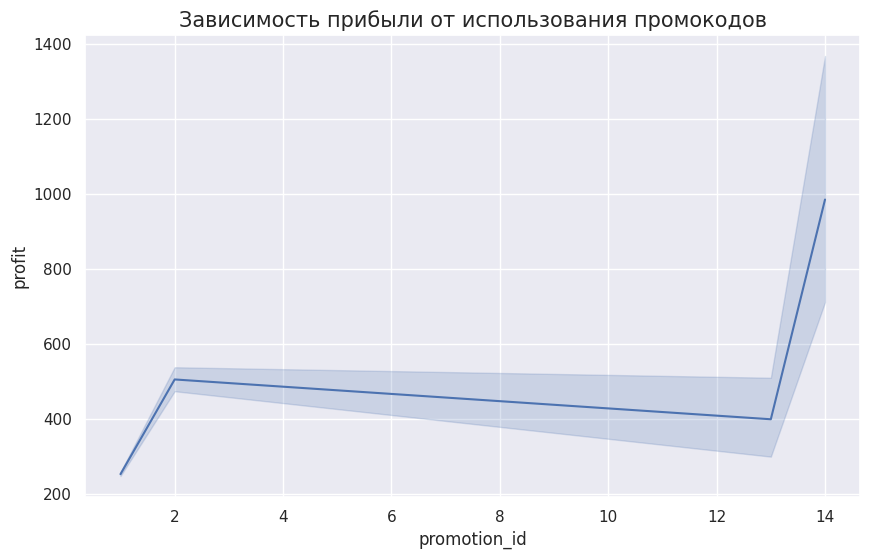

In [ ]:
plt.figure(figsize = (10, 6))
sns.set(style = 'darkgrid')
sns.lineplot(x='promotion_id', y='profit', data=df)
plt.title('Зависимость прибыли от использования промокодов', fontsize=15);

При использовании двух прокодов прибыль увеличивалась почти в два раза, а при 13-14 вырастала скачкообразно. Либо это работающий инструмент, и его нужно развивать, либо ошибка в данных. Желательно проанализировать, какие промокоды привлекли наибольшее количество покупателей и продолжить их распространение согласно полученной обратной связи. Так как наш покупатель живет загородом, и он человек в возрасте, значит можно попробовать рассылку по почте или размещение купонов в продуктовых супермаркетах на окраинах города.

Сделаем анализ корзины - это метод интеллектуального анализа данных, используемый в розничных продажах для увеличения продаж за счет понимания моделей покупок клиентов. Он включает в себя анализ продуктов, которые, вероятно, будут приобретены вместе. Согласно приведенному выше запросу была создана матрица «клиенты-товары» по 2016 году. Каждая строка представляет покупки каждого клиента, а каждый столбец — купленные товары. Числа, соответствующие матрице, обозначают количество раз, когда этот товар покупается отдельным клиентом.

In [ ]:
baskets = df5.groupby(['customer_id', 'product_id'])['product_id'].count().unstack().fillna(0).reset_index()
baskets.head()

product_id  customer_id  214  217  222  225  228  231  234  237  353  ...  \
0                 11000  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
1                 11001  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
2                 11002  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3                 11003  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
4                 11004  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

product_id  594  595  596  597  598  599  600  604  605  606  
0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 103 columns]

Кодируем товары, проданные более одного раза

In [ ]:
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final.head()

<ipython-input-58-a84294db3eb1>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)


product_id  214  217  222  225  228  231  234  237  353  355  ...  594  595  \
0             1    0    0    0    0    0    0    0    1    0  ...    0    0   
1             0    1    0    1    0    0    0    0    1    0  ...    0    0   
2             0    0    1    0    0    0    0    0    0    0  ...    0    0   
3             0    0    0    1    0    0    0    0    0    0  ...    0    0   
4             1    1    0    0    0    0    0    0    0    1  ...    0    0   

product_id  596  597  598  599  600  604  605  606  
0             0    0    0    0    0    0    0    0  
1             0    0    0    0    0    1    0    0  
2             0    0    0    0    0    0    0    0  
3             0    0    0    0    0    0    0    0  
4             0    0    0    0    0    0    0    0  

[5 rows x 102 columns]

In [ ]:
!pip install mlxtend

Поиск товаров, чаще всего продаваемых вместе:

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(baskets_final, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support    itemsets
25  0.025040  (217, 477)
4   0.026189       (463)
27  0.026189  (477, 222)
5   0.026591       (465)
35  0.027108  (528, 535)
24  0.027739  (528, 214)
23  0.028314  (477, 214)
28  0.028486  (528, 222)
26  0.028601  (528, 217)
34  0.028716  (480, 537)
38  0.030266  (529, 538)
40  0.030783  (529, 540)
39  0.033253  (529, 539)
33  0.035493  (480, 529)
29  0.039628  (225, 477)
12  0.039800       (487)
41  0.043189  (530, 541)
36  0.043763  (528, 536)
21  0.044222       (540)
16  0.044452       (535)
10  0.047955       (484)
20  0.049219       (539)
22  0.049851       (541)
32  0.050999  (528, 480)
37  0.054847  (528, 537)

Создадим ассоциативные правила для указания сопутствующих товаров

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(baskets_final, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)
# Создание ассоциативных правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets)).sort_values('lift', ascending=False)
# Добавили аргумент num_itemsets
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents consequents   support  confidence       lift
24       (530)       (541)  0.043189    0.566265  11.359225
25       (541)       (530)  0.043189    0.866359  11.359225
16       (529)       (540)  0.030783    0.256951   5.810432
17       (540)       (529)  0.030783    0.696104   5.810432
19       (539)       (529)  0.033253    0.675613   5.639390
18       (529)       (539)  0.033253    0.277565   5.639390
14       (529)       (538)  0.030266    0.252637   4.544327
15       (538)       (529)  0.030266    0.544421   4.544327
31       (537)       (528)  0.054847    0.717506   4.481065
30       (528)       (537)  0.054847    0.342539   4.481065
26       (528)       (536)  0.043763    0.273314   4.394226
27       (536)       (528)  0.043763    0.703601   4.394226
32       (477)       (479)  0.086894    0.385969   3.976627
33       (479)       (477)  0.086894    0.895266   3.976627
3        (535)       (528)  0.027108    0.609819   3.808526
2        (528)       (535)  0.027108    0.169297   3.808526
34       (477)       (478)  0.093901    0.417092   3.778566
35       (478)       (477)  0.093901    0.850676   3.778566
13       (537)       (480)  0.028716    0.375657   2.337722
12       (480)       (537)  0.028716    0.178699   2.337722
28       (528)       (480)  0.050999    0.318508   1.982080
29       (480)       (528)  0.050999    0.317370   1.982080
20       (480)       (529)  0.035493    0.220872   1.843636
21       (529)       (480)  0.035493    0.296261   1.843636
11       (217)       (528)  0.028601    0.256833   1.604011

Судя по таблице, чаще всего совместно заказывали шиномонтажные трубки и шины, шлемы и шиномонтажные трубки, бутылки для воды и различные крепления для них, а также патчи. Это высокомаржинальные товары - важно, чтобы они всегда предлагались в подсказках на сайте магазина.

In [ ]:
df.order_quantity.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



order_quantity
1    41585
2     8340
4     8264
Name: count, dtype: int64

Количество товаров в заказе в подавляющем большинстве было равно 1 (41585), заказов с двумя и четырьмя товарами было примерно поровну (8340 и 8264 соответственно)

Перейдем к анализу суммарной выручки и других показателей продаж в динамике.

In [ ]:
df5 = df.loc[df['year']==2016]
df14 = df.loc[df['year']==2014]
df15 = df.loc[df['year']==2015]

In [ ]:
print(f"Суммарная выручка в 2014 году составила: {round(df14.revenue.sum(), 1)} фунтов")
print(f"Суммарная прибыль в 2014 году составила: {round(df14.profit.sum(), 1)} фунтов")
print(f"Средняя маржинальность в 2014 году составила: {round(df14.marginality.mean(), 1)} %")

Суммарная выручка в 2014 году составила: 11096566.9 фунтов
Суммарная прибыль в 2014 году составила: 3573018.6 фунтов
Средняя маржинальность в 2014 году составила: 32.3 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Суммарная выручка в 2015 году составила: {round(df15.revenue.sum(), 1)} фунтов")
print(f"Суммарная прибыль в 2015 году составила: {round(df15.profit.sum(), 1)} фунтов")
print(f"Средняя маржинальность в 2015 году составила: {round(df15.marginality.mean(), 1)} %")

Суммарная выручка в 2015 году составила: 8897974.2 фунтов
Суммарная прибыль в 2015 году составила: 2985140.4 фунтов
Средняя маржинальность в 2015 году составила: 33.1 %


In [ ]:
print(f"Суммарная выручка в 2016 году составила: {round(df5.revenue.sum(), 1)} фунтов")
print(f"Суммарная прибыль в 2016 году составила: {round(df5.profit.sum(), 1)} фунтов")
print(f"Средняя маржинальность в 2016 году составила: {round(df5.marginality.mean(), 1)} %")

Суммарная выручка в 2016 году составила: 25983251.7 фунтов
Суммарная прибыль в 2016 году составила: 8667911.9 фунтов
Средняя маржинальность в 2016 году составила: 46.4 %


Таким образом, можно говорить о небольшом снижении общей выручки и прибыли в 2015 по сравнению с 2014 и существенном увеличении данных показателей в 2016 году (выручки на 134% по сравнению с 2014 годом и прибыли на 143% по сравнению с 2014 годом). Средняя маржинальность росла от года к году. Что объясняется конечно резким увеличием ассортимента товаров и, видимо, инвестициями в торговлю.

In [ ]:
year_profit = pd.pivot_table(data=df,
    index=['year'],
    values=['revenue', 'profit', 'marginality'],
    aggfunc=['mean']).style.background_gradient()
year_profit

За годы исследования средняя прибыль сократилась почти в 10 раз.
Средняя маржинальность в 2014 году составляла 32,3% в 2014 г., 33,1% в 2015 году и 46,3% в 2016 - т.е. уверенно росла. Таким образом, средняя выручка и средняя прибыль падают, а маржинальность растет.

In [ ]:
mon_profit = pd.pivot_table(data=df,
    index=['month'],
    values=['revenue','profit','marginality'],
    aggfunc=['mean']).style.background_gradient()
mon_profit

Если рассматривать динамику средней прибыли и выручки по месяцам за три года, то показатели снижались с января по апрель, затем росли с пиком в июне и небольшим падением в июле, далее опять росли, но не набирая в декабре январского пика. Распределение средней маржинальности было более равномерным, не считая более низких значений в январе (40,4%). Рассмотрим динамику 2016 года:

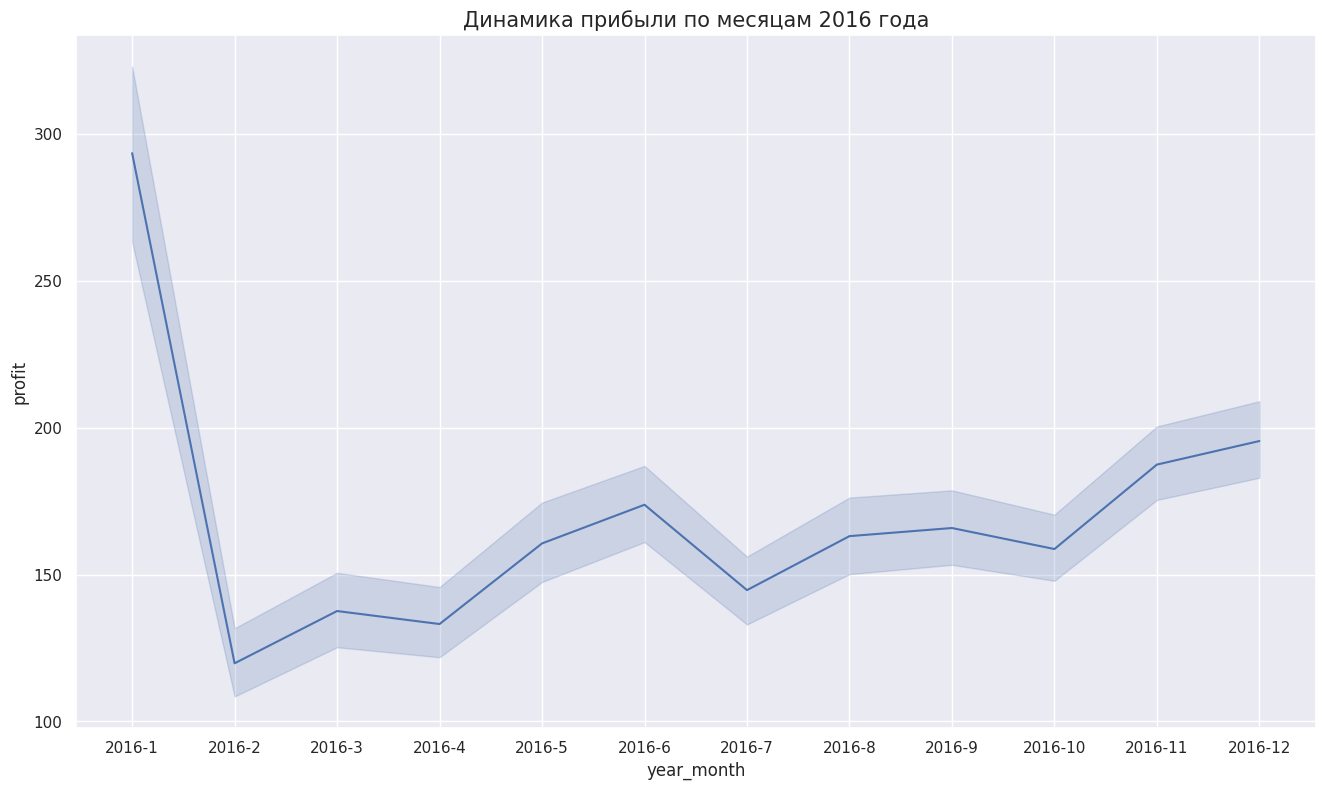

In [ ]:
plt.figure(figsize = (16, 9))
sns.set(style = 'darkgrid')
sns.lineplot(x='year_month', y='profit', data=df5)
plt.title('Динамика средней прибыли по месяцам 2016 года', fontsize=15);

На графике наблюдается резкое падение прибыли в феврале, что может быть связано с тем, что покупки планировались и совершались в декабре предыдущего года, а т.к. доставка заказов в среднем составляет 7 дней, то деньги поступили на счета компании в январе, чем возможно и объясняется пик. С февраля прослеживается положительная динамика прибыли вплоть до конца года с небольшим промежуточным пиком в июне и небольшим спадом в июле. Рост продаж в ноябре-декабре, возможно, объясняется рекламными мероприятиями: черная пятница, рождественские распродажи и т.п., а если учесть, что почти половина покупателей пенсионного возраста и их конек - это экономия, то траты на подарки именно в эти периодны тоже вероятны (закупки начинались с конца ноября и продолжались до следующего года)

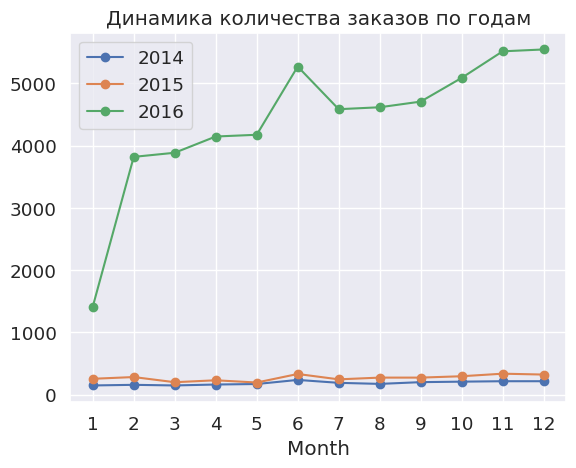

In [ ]:
latest_years = df['year'].sort_values(ascending=False).unique()
monthly_data = df[df['year'].isin(latest_years)].groupby(['year',"month"])["order_quantity"].count().reset_index()
pivot_data = monthly_data.pivot(index="month", columns="year", values="order_quantity")
for y in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[y], label = y, marker = 'o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('')
plt.title('Динамика количества заказов по годам')
plt.xticks(pivot_data.index)
plt.legend()
plt.grid(True)
plt.show()

Если рассматривать сезонную динамику заказов, то в 2014-2015 годах она практически не наблюдалась - продажи шли равномерно. А в 2016 году на фоне поступательной динамики прослеживается пик июня, после чего в июле идет спад и снова поступательное движение до ноября.

Гипотеза_3: Существует разница в прибыли между сезонами
H0: вся прибыль за четыре сезона одинакова.
H1: по крайней мере, в одном сезоне прибль отличаются от других.
Рассмотрим прибыли по сезонам 2016 года. Проверяем тест Левина (дисперсии не равны). При помощи ANOVA передаем 4 выборки:

In [ ]:
spring_profit = df5.loc[(df5.month>=3)&(df5.month<=5), 'profit']   # весна
summer_profit = df5.loc[(df5.month>=6)&(df5.month<=8), 'profit']   # лето
fall_profit = df5.loc[(df5.month>=9)&(df5.month<=11), 'profit']    # осень
winter_profit = df5.loc[(df5.month<=12)&(df5.month<=2), 'profit']  # зима

In [ ]:
from scipy import stats
print('Variance test:', stats.levene(spring_profit, summer_profit, fall_profit, winter_profit))

Variance test: LeveneResult(statistic=8.963468012346066, pvalue=6.229305937343866e-06)


Поскольку P-value<0,5 мы можем говорить о том, что различия по сезонам не случайны

Выполним односторонний ANOVA. Будем использовать функцию f_oneway() из библиотеки SciPy для выполнения однофакторного дисперсионного анализа. F-значение — это мера того, насколько различаются значения каждой группы, p-значение — это мера вероятности того, что различия прибылей по сезонам не случайны

In [ ]:
from scipy.stats import f_oneway
f_oneway(spring_profit, summer_profit, fall_profit, winter_profit)

fvalue, pvalue = stats.f_oneway(spring_profit, summer_profit, fall_profit, winter_profit)
print("F-statistic value: ", fvalue)
print("P-Value: ", pvalue)

F-statistic value:  9.157635605138832
P-Value:  4.702891230902425e-06


F-значение равно 9,2, P-value <0,5, соответственно мы можем говорить, что различия по сезонам есть, и они не случайны

In [ ]:
t_stat, p_value = stats.ttest_ind(summer_profit, spring_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  3.2504325827196103
P-Value:  0.9994231379202516


Если сравнивать между собой весну и лето, то различия по прибыли не подтвердились, т.к. P-value>0,05

In [ ]:
t_stat, p_value = stats.ttest_ind(summer_profit, winter_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -0.7802974742674651
P-Value:  0.21761258735572658


Различия между летом и зимой тоже не подтвердились (P-value>0,05)

In [ ]:
t_stat, p_value = stats.ttest_ind(summer_profit, fall_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -1.95058896824381
P-Value:  0.02555766393675046


А вот различия между прибылью летом и осенью 2016 года подтвердились (P-value<0,05)

Рассмотрим сезонную динамику заказов по месяцам 2016 года

Начало периода:  2016-01-01 00:00:00
Конец периода:  2016-12-30 00:00:00


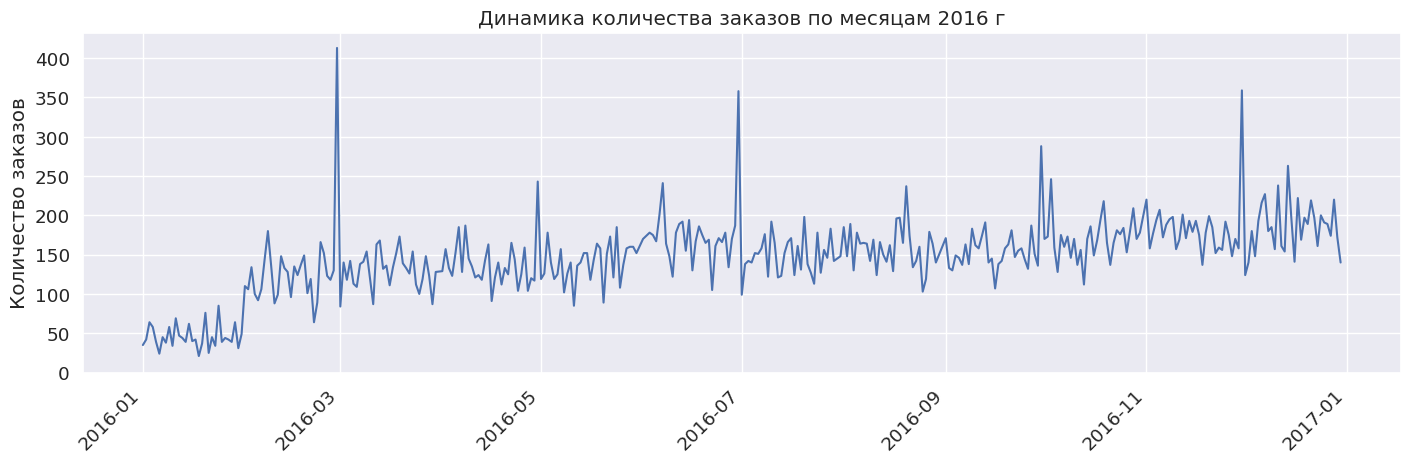

In [ ]:
print('Начало периода: ', df5['order_date'].min())
print('Конец периода: ', df5['order_date'].max())
orn_transaction = df5.groupby('order_date')['order_number'].count().reset_index()
sns.set(font_scale=1.2)
plot = orn_transaction.plot( x = 'order_date', y = 'order_number',
                        grid = True, rot=45,
                        legend=False, figsize=(17,5))
plt.title('Динамика количества заказов по месяцам 2016 г')
plt.xlabel('')
plt.ylabel('Количество заказов')
plt.ylim(bottom=0);

Отчетливо наблюдается 3 пика - практически поквартально. С чем это связано? Возможно, проводились рекламные акции - пики четкие и распределены на протяжении года равномерно - выглядят искусственно, т.е. не как результат стихийных продаж, а как результат каких-то сезонных мероприятий. Чтобы получить ответ, нужно получить маркетинговую информацию - годовой отчет за 2016 год, дабы проанализировать корреляцию мероприятий с выручкой, прибылью и количеством заказов.

Начало периода:  2014-01-01 00:00:00
Конец периода:  2016-12-30 00:00:00


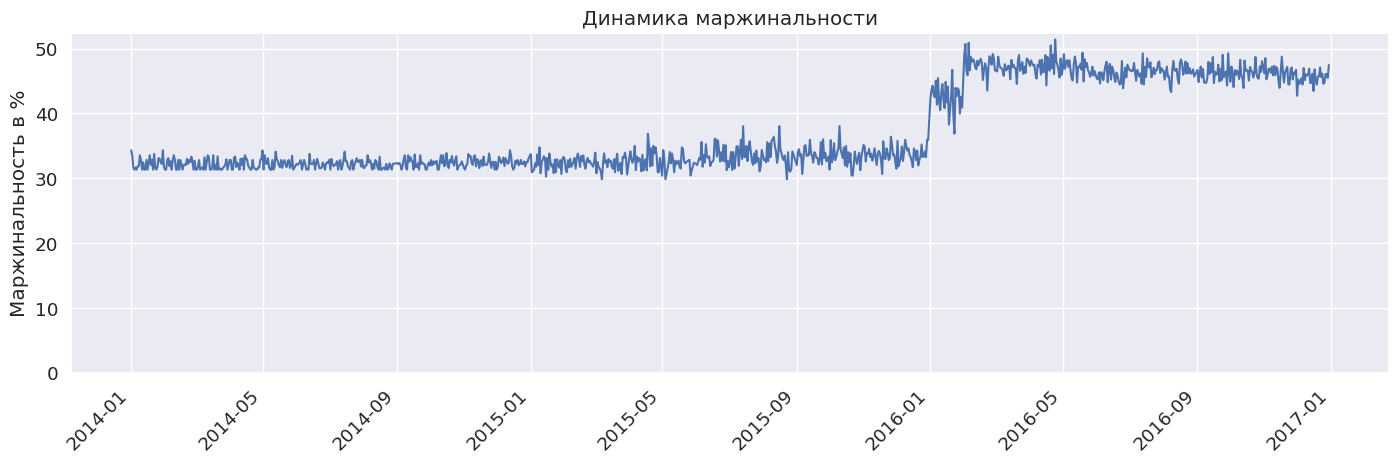

In [ ]:
print('Начало периода: ', df['order_date'].min())
print('Конец периода: ', df['order_date'].max())
mar_transaction = df.groupby('order_date')['marginality'].mean().reset_index()
sns.set(font_scale=1.2)
plot = mar_transaction.plot( x = 'order_date', y = 'marginality',
                        grid = True, rot=45,
                        legend=False, figsize=(17,5))
plt.title('Динамика маржинальности')
plt.xlabel('')
plt.ylabel('Маржинальность в %')
plt.ylim(bottom=0);

Если рассмотреть динамику средней маржинальности за 3 года, то мы увидим резкий скачок - на 18% в начале 2016. Он произошел в феврале (а выручка, напротив, в феврале резко снизилась).

Начало периода:  2016-01-01 00:00:00
Конец периода:  2016-12-30 00:00:00


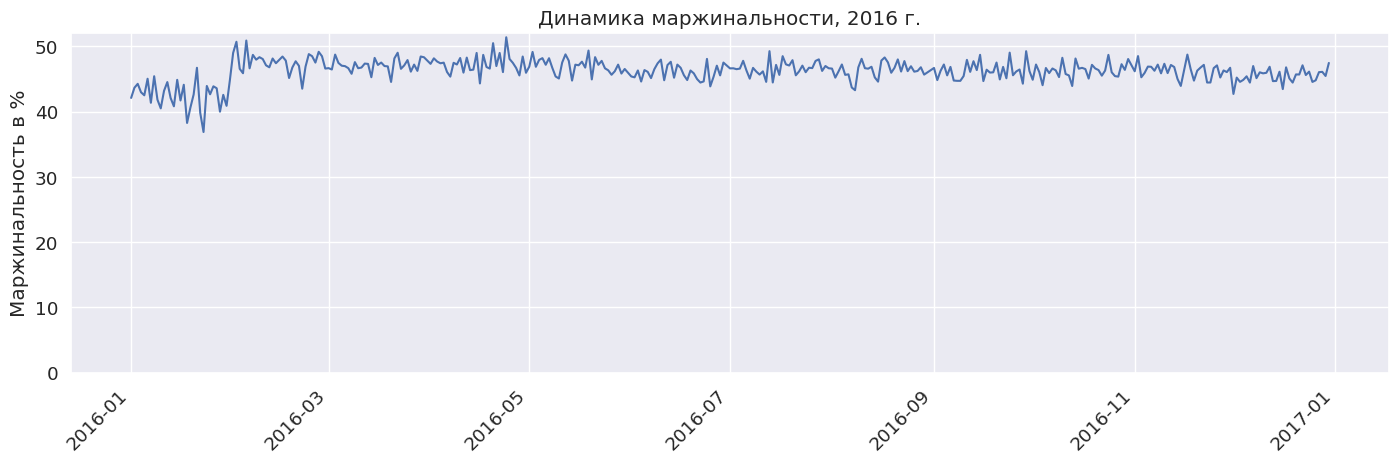

In [ ]:
print('Начало периода: ', df5['order_date'].min())
print('Конец периода: ', df5['order_date'].max())
mar_transaction = df5.groupby('order_date')['marginality'].mean().reset_index()
sns.set(font_scale=1.2)
plot = mar_transaction.plot( x = 'order_date', y = 'marginality',
                        grid = True, rot=45,
                        legend=False, figsize=(17,5))
plt.title('Динамика маржинальности, 2016 г.')
plt.xlabel('')
plt.ylabel('Маржинальность в %')
plt.ylim(bottom=0);

После резкого скачка в феврале, распределение заказов с марта было более-менее равномерным

Рассчитаем выручку с одного заказа. Разброс выручки с заказа довольно большой: от 2 до 57252 фунтов.

In [ ]:
group_date_tr = (df5.groupby(['month','order_number'], as_index=False).agg({'revenue':'sum'})
                 .sort_values(by='month'))
month_average_cheack = group_date_tr.groupby('month', as_index=False).agg({'order_number':'nunique',
                                                    'revenue':'sum'})
month_average_cheack['order_number'] = month_average_cheack['order_number'].astype(int)
month_average_cheack['average_check'] = ((month_average_cheack['revenue'] / month_average_cheack['order_number'])
                                         .astype(int))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



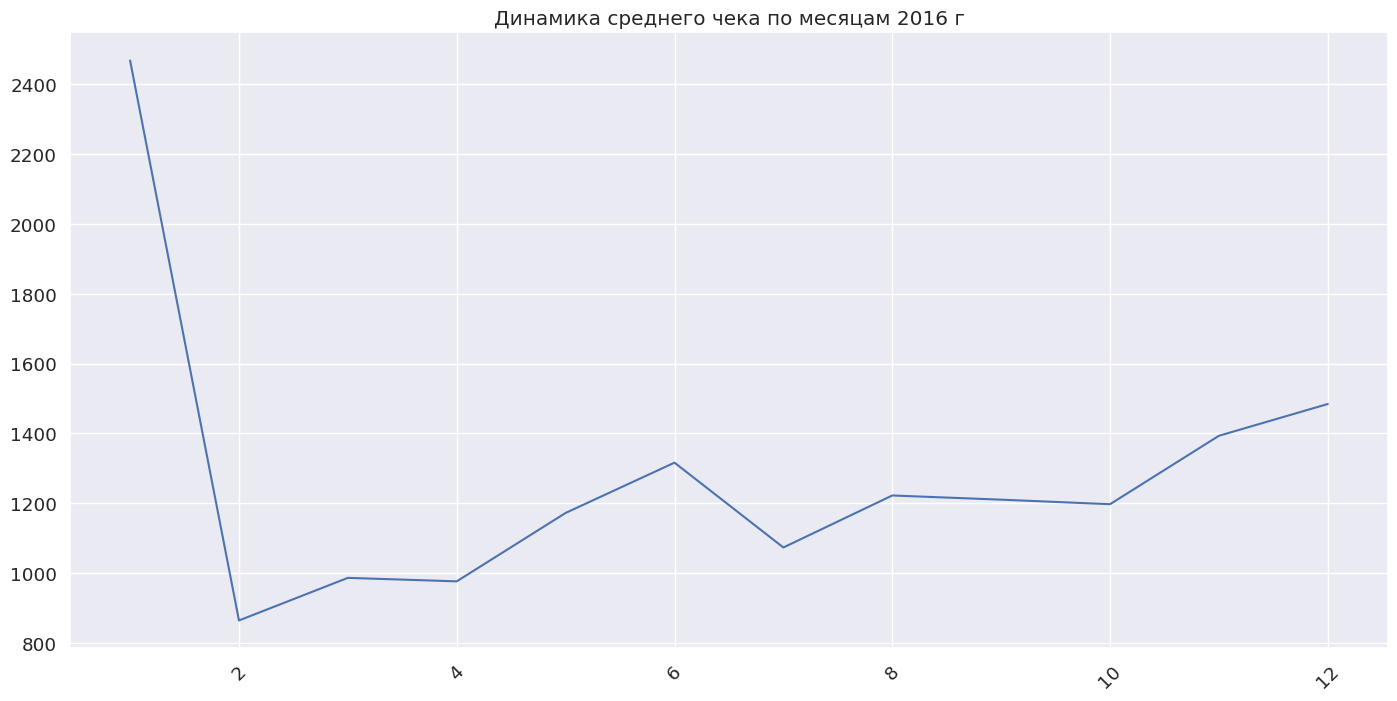

In [ ]:
plot = month_average_cheack.plot(x = 'month', y = 'average_check',
                        grid=True, rot=45,
                        legend=False, figsize=(17,8))
plt.title('Динамика среднего чека по месяцам 2016 г')
plt.xlabel('')
plt.ylabel('')
plt.show();

Динамика среднего чека повторяет динамику прибыли - резкий провал в феврале и равномерное повышение к декабрю.
Возможно январский пик объясняется мощной рекламной акцией - выходом новых товаров на велосипедный рынок. Нужно было знакомить с новыми товарами покупателей, что предполагает какие-то для него преференции. В 2014 и 2015 таких огромных пиков не было - выручка росла равномерно.

Рассмотрим ARPU (Average Revenue Per User) — показатель среднего дохода от каждого покупателя по месяцам 2016 года.

In [ ]:
group_custom = (df5.groupby(['month','customer_id'], as_index=False).agg({'revenue':'sum'}).sort_values(by='month'))
month_ARPU = group_custom.groupby('month', as_index=False).agg({'customer_id':'nunique','revenue':'sum'})
month_ARPU['customer_id'] = month_ARPU['customer_id'].astype(int)
month_ARPU['ARPU'] = ((month_ARPU['revenue'] / month_ARPU['customer_id']).astype(int))

In [ ]:
month_ARPU

month  customer_id     revenue  ARPU
0       1          511  1268803.71  2482
1       2         1509  1359966.57   901
2       3         1553  1586039.46  1021
3       4         1624  1641274.90  1010
4       5         1634  2005019.00  1227
5       6         2037  2758529.49  1354
6       7         1777  1986569.02  1117
7       8         1794  2268204.49  1264
8       9         1879  2340094.36  1245
9      10         1981  2436517.76  1229
10     11         2145  3073740.22  1432
11     12         2135  3258492.73  1526

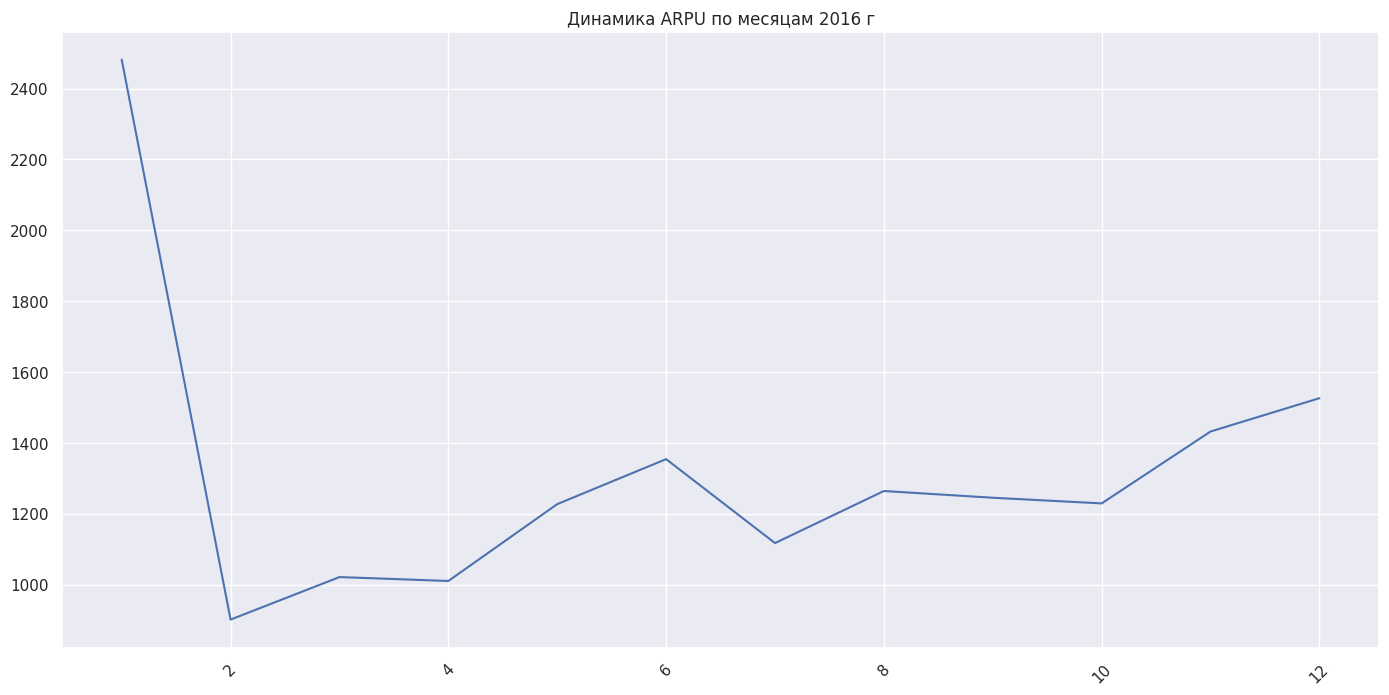

In [ ]:
plot = month_ARPU.plot(x = 'month', y = 'ARPU',
                        grid=True, rot=45,
                        legend=False, figsize=(17,8))
plt.title('Динамика ARPU по месяцам 2016 г')
plt.xlabel('')
plt.ylabel('')
plt.show();

Динамика средней выручки на одного покупателя такая же, как и динамика среднего чека (выручка на Заказ)

### ГЕОГРАФИЯ ПРОДАЖ

In [ ]:
country_group = (df.groupby('country_y', as_index=False)['revenue'].sum()
                 .sort_values(by='revenue', ascending=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-112-ace252548fc0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




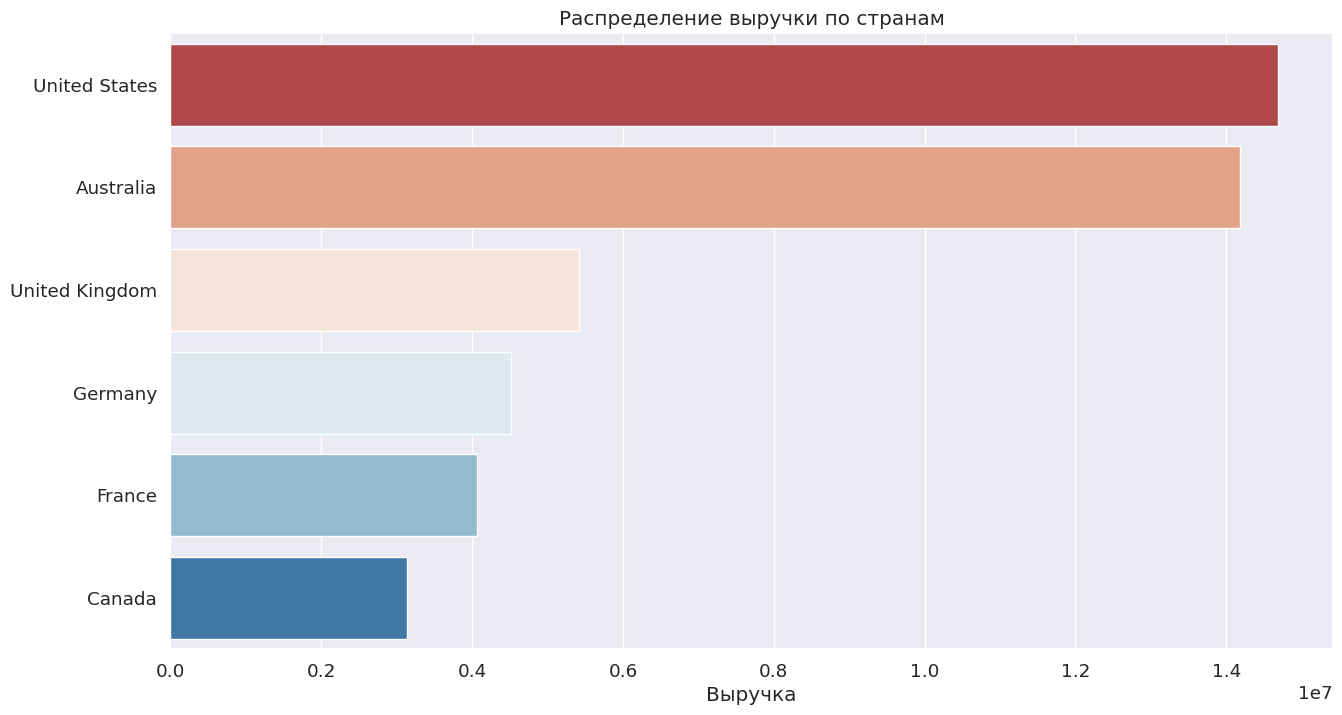

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(y = 'country_y',
            x = 'revenue',
            data = country_group,
            palette = 'RdBu')

plt.title('Распределение выручки по странам')
plt.xlabel('Выручка')
plt.ylabel('');

Исходя из графика, с большим отрывом лидируют США и Австралия - почти в три раза по выручке опережая остальные страны. Канада приносит выручки меньше всех, что странно, т.к. в стране популяризирется здоровый образ жизни, доход высокий, и граждане могут себе позволить покупать недешевые английские велосипеды. Следовательно, это недоработка международного отдела продаж. Нужно лучше изучить рынок (в частности конкурентов, их объемы продаж), спланировать мероприятия и вложения для увеличения прибыли в данной стране. Если конкуренция слишком сильна и велика, то стоит вообще отказаться от поставок туда, либо увеличить стоимость товаров для данного направления.



Рассмотрим распределение выручки по основым городам поставок товаров.

In [ ]:
city_group = (df.groupby('city', as_index=False)['revenue'].sum()
                 .sort_values(by='revenue', ascending=False)
                 .head(15))

<ipython-input-48-1827ac6e4b21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'city',


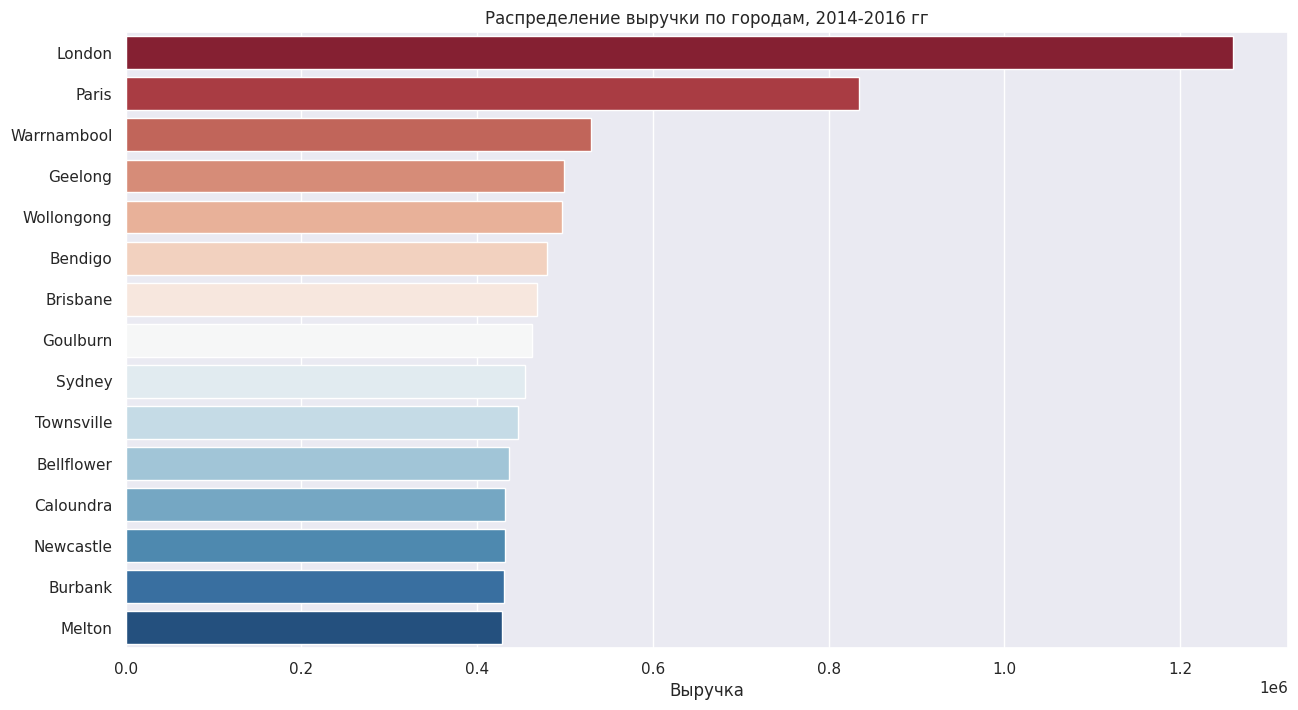

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(y = 'city',
            x = 'revenue',
            data = city_group,
            palette = 'RdBu')

plt.title('Распределение выручки по городам, 2014-2016 гг')
plt.xlabel('Выручка')
plt.ylabel('');

По выручке с большим отрывом (при анализе за три года) лидировал Лондон (почти 1,25 млн фунтов), далее идет Париж. По остальным странам наблюдалось более равномерное распределение. В пятерку входили: Warrnambul, Geelong, Wollongong. Рассмотрим отдельно 2016 год:

In [ ]:
city_group_16 = (df5.groupby('city', as_index=False)['revenue'].sum()
                 .sort_values(by='revenue', ascending=False)
                 .head(20))

<ipython-input-46-210786069c4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'city',


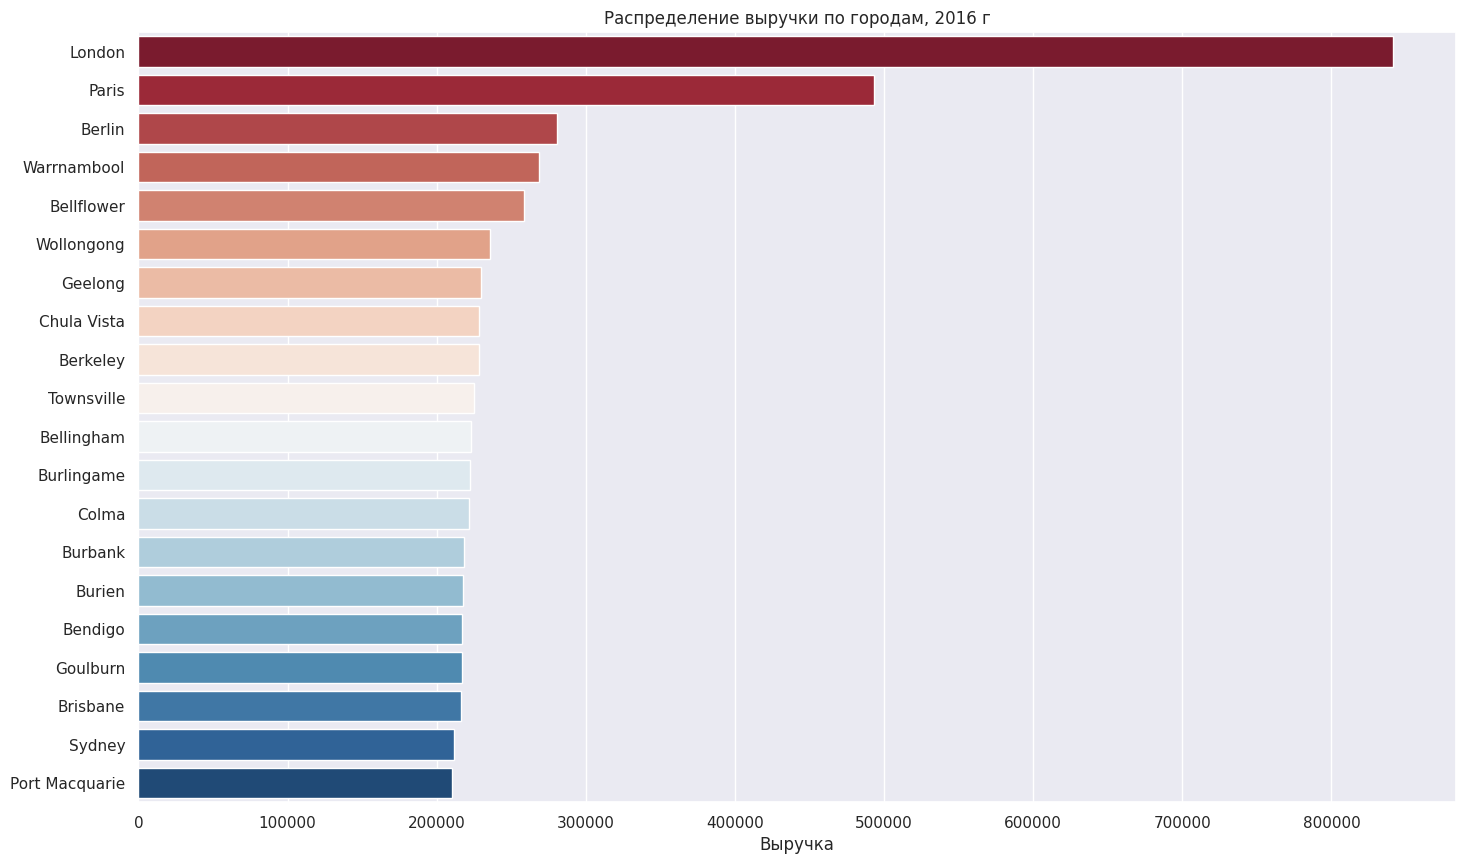

In [ ]:
plt.figure(figsize=(17,10))
sns.set_style('darkgrid')
sns.barplot(y = 'city',
            x = 'revenue',
            data = city_group_16,
            palette = 'RdBu')

plt.title('Распределение выручки по городам, 2016 г')
plt.xlabel('Выручка')
plt.ylabel('');

В 2016 году Лондон лидерство сохранил (более 800 тыс. фунтов), на втором месте тоже Париж, а на третьем - Берлин, который обогнал Warrnambool по продажам, отодвинув его на следующую позицию. На пятое место вырвался Bellflower.

Рассмотрим маржинальность по странам и штатам

In [ ]:
country_marg = pd.pivot_table(data=df,
    index=['country_y', 'state'],
    values=['marginality'],
    aggfunc=['mean']).style.background_gradient()
country_marg

Самая высокая маржинальность была в канадской провинции Онтарио - 54,5%, а также штатах США: Кентуки, Миссури, Монтане - 54,5%. Самая низкая средняя маржинальность выявлена в Вайоминге (США) - 33,5% и Миссисипи - 34,8%

In [ ]:
df_al = df.loc[df['state']=='Alabama']
df_al

product_id order_date  ship_date  customer_id  promotion_id  \
31037         480 2016-05-15 2016-05-22        11533             1   

       territory_id  order_number  order_quantity  unit_price  total_cost  \
31037             5         57966               1        2.29      0.8565   

       ...          group  education_code  occupation_code  subcategory_code  \
31037  ...  North America               3                0                14   

      category_code productline_code  region_code  group_code  profit  \
31037             0                2            7           1  1.2503   

       marginality  
31037    54.598253  

[1 rows x 52 columns]

In [ ]:
df_mas = df.loc[df['state']=='Massachusetts']
df_mas

product_id order_date  ship_date  customer_id  promotion_id  \
15172         360 2015-11-09 2015-11-16        27421             1   

       territory_id  order_number  order_quantity  unit_price  total_cost  \
15172             2         50425               1   2049.0982     1105.81   

       ...          group  education_code  occupation_code  subcategory_code  \
15172  ...  North America               3                3                10   

      category_code productline_code  region_code  group_code    profit  \
15172             1                0            5           1  779.3603   

       marginality  
15172    38.034307  

[1 rows x 52 columns]

Заказ из Алабамы принес 1,25 фунтов прибыли, а из Массачусетса – 779,4 фунта.
После анализа рынка в данных штатах, нужно понять: работать ли с ними вообще? Стоит ли проводить рекламную кампанию дабы увеличить количество заказов?

In [ ]:
country_marg = pd.pivot_table(data=df5,
    index=['country_y', 'state'],
    values=['marginality'],
    aggfunc=['mean']).style.background_gradient()
country_marg

В 2016 году увеличилась маржинальность продаж в штате Аризона (США) - на 18%

Рассмотрим количество продаж по странам и штатам (за 3 года)

In [ ]:
state_quantity = pd.pivot_table(data=df,
    index=['country_y', 'state'],
    values=['order_quantity'],
    aggfunc=['min', 'max', 'count']).style.background_gradient()
state_quantity

Самое большое число заказов пришло из Калифорнии - 11847, самое малое - из Массачусетса и Алабамы - всего по одному, из Новой Каролины - 2. Насколько велики почтовые расходы? Какая окупаемость у данных заказов?
Посмотрим хотя бы маржинальность данных заказов:



In [ ]:
df_a = df.loc[df['state']=='Alabama']
df_a.marginality.value_counts()

marginality
54.598253    1
Name: count, dtype: int64

In [ ]:
df_m = df.loc[df['state']=='Massachusetts']
df_m.marginality.value_counts()

marginality
38.034307    1
Name: count, dtype: int64

Как ни странно, но по единственному заказу из Алабамы маржинальность довольно высокая - 52,2% А с заказом из Массачусетса дела обстоят хуже - маржинальность 38%.

In [ ]:
# корреляционный анализ
numeric_col = ['revenue', 'profit', 'marginality', 'order_quantity']
corr = df.loc[:,numeric_col].corr()
print(corr)

                 revenue    profit  marginality  order_quantity
revenue         1.000000  0.993397    -0.376081        0.284360
profit          0.993397  1.000000    -0.352269        0.286294
marginality    -0.376081 -0.352269     1.000000        0.000744
order_quantity  0.284360  0.286294     0.000744        1.000000


При рассмотрении таблицы выявлены следующие коэффициенты корреляции: выручки и количества товаров +0,28,4, выручкой и прибылью - 0,99, выручкой и маржинальностью -0,38

Построим тепловой график для визуализации корреляций числовых признаков

In [ ]:
df_t = df.copy()
df_t = df_t.drop(['territory_id', 'order_number', 'year_month',
       'client_name', 'children', 'education', 'education_code',
       'occupation_code', 'gender', 'occupation', 'house', 'cars',
       'city', 'state', 'product', 'sub_category', 'category', 'cost', 'list_price', 'productLine', 'model', 'start_date', 'region',
       'country_y', 'group', 'category_code', 'region_code', 'group_code'], axis= 1)

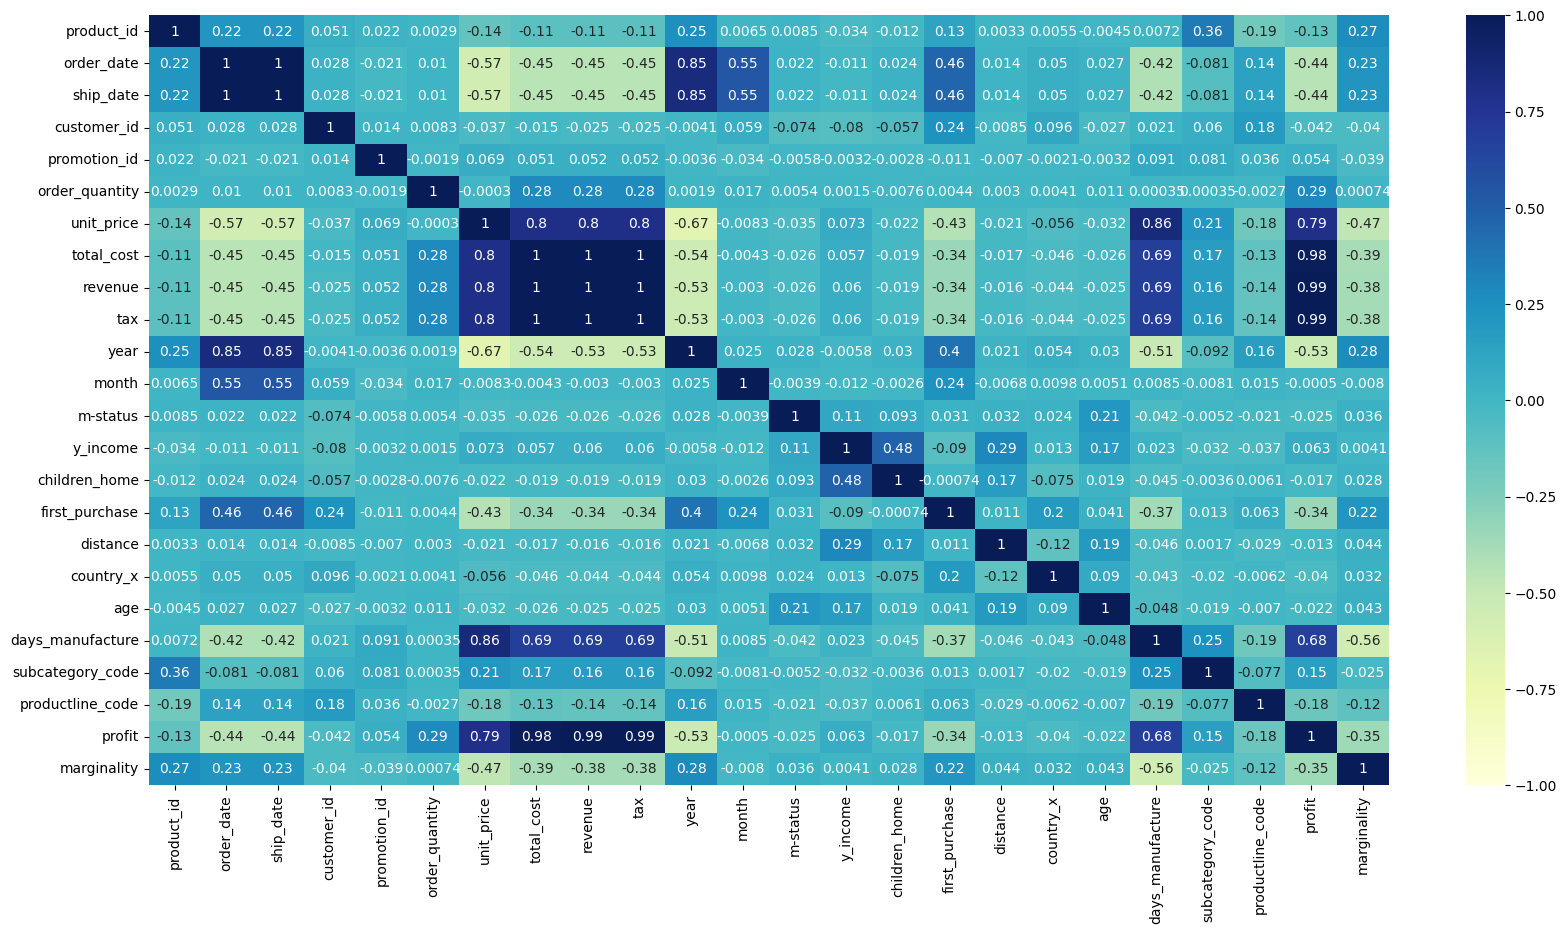

In [ ]:
corr_matrix = df_t.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.heatmap(corr_matrix, vmin=-1, cmap="YlGnBu", annot=True)

Высокая корреляция выявлена между прибылью и розничной ценой (0,79), себестоимостью товара (0,98), выручкой (0,99), а также сроками изготовления товара (0,68)

<a href=#3>3.  Машинное обучение</a><br>

In [ ]:
# подготовим датасет для анализа - удалим столбцы с нечисловыми значениями:
df_noncat = df.drop(['ship_date', 'client_name', 'education', 'occupation', 'city', 'state', 'productLine','region', 'year_month', 'product','cost', 'list_price', 'sub_category', 'category','country_y', 'group','model', 'order_date', 'first_purchase', 'start_date'],axis=1)


###Линейная регрессия

In [ ]:
x = df_noncat.drop(columns = ['revenue'])
y = df_noncat['revenue']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape
x_train.shape

(46551, 29)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(x_train.shape[1]):
  print(x.columns[i], "=", lin_reg.coef_[i].round(2))

Model coefficients:

product_id = -0.0
customer_id = 0.0
promotion_id = 0.03
territory_id = 0.01
order_number = -0.0
order_quantity = -0.0
unit_price = 0.0
total_cost = 0.0
tax = 12.5
year = 0.17
month = 0.01
m-status = 0.03
gender = 0.01
y_income = 0.0
children = 0.0
children_home = 0.01
house = 0.03
cars = -0.02
distance = 0.01
country_x = 0.03
age = -0.01
days_manufacture = -0.12
education_code = 0.03
occupation_code = -0.01
subcategory_code = -0.0
category_code = -0.0
productline_code = -0.03
region_code = -0.02
group_code = -0.03


Модель линейной регрессии довольно неплохо описывает влияние анализируемых признаков на выручку. R_squared приближается к единице. Хотя, исходя из таблицы коэффициентов, можно говорить только о существенном вкладе налогов (coeff_tax = 12.5) на выручку.

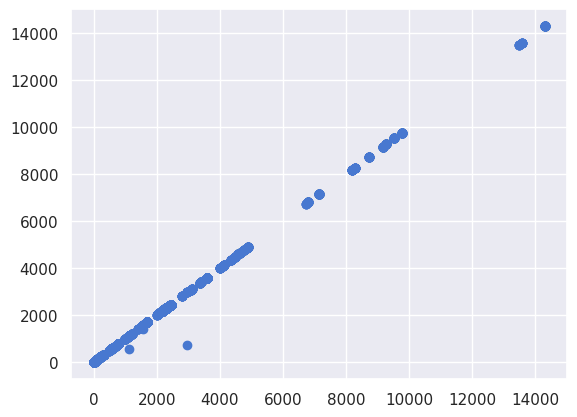

In [ ]:
ypred_test = lin_reg.predict(x_test)
plt.scatter(ypred_test, y_test)

In [ ]:
comp = pd.DataFrame({'ygt': y_test,'ypr': ypred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt           ypr         error
count  11638.000000  11638.000000  1.163800e+04
mean     772.808733    773.037089  4.558379e+02
std     1834.234706   1834.344169  4.604886e+04
min        2.290000      1.985826  2.731661e-13
25%        9.160000      9.164815  1.178936e-03
50%       34.990000     35.007548  5.451600e-03
75%      539.990000    539.586829  1.714883e-02
max    14313.080000  14313.224082  4.957444e+06

Средняя ошибка 4.558379e+02

Оценка на трейне: 0.9999945396565776
Оценка на тесте: 0.9998645004110833


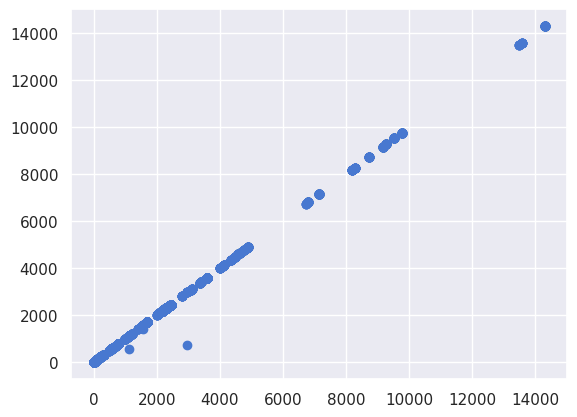

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)
lin_reg1 = LinearRegression()
lin_reg1.fit(x1_train, y1_train)
print('Оценка на трейне:', lin_reg1.score(x1_train, y1_train))
print('Оценка на тесте:', lin_reg1.score(x1_test, y1_test))
y1pred_test = lin_reg1.predict(x1_test)
plt.scatter(y1pred_test, y1_test)

In [ ]:
comp = pd.DataFrame({'ygt': y1_test,'ypr': y1pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt           ypr         error
count  11638.000000  11638.000000  1.163800e+04
mean     772.808733    773.037089  4.558379e+02
std     1834.234706   1834.344169  4.604886e+04
min        2.290000      1.985826  2.731661e-13
25%        9.160000      9.164815  1.178936e-03
50%       34.990000     35.007548  5.451600e-03
75%      539.990000    539.586829  1.714883e-02
max    14313.080000  14313.224082  4.957444e+06

In [ ]:
# удалим выбросы по выручке:
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5* IQR
high = Q3 + 1.5 * IQR
df_new = df[df.revenue > low]
df_new = df_new[df_new.revenue < high]
# с выбросами удалилось 9586 строк - почти 16,5% анализируемых данных

In [ ]:
Xnorm = df_new.drop(['order_date', 'ship_date', 'client_name','education', 'occupation','first_purchase','city', 'state', 'product', 'sub_category', 'category','productLine', 'model', 'start_date', 'region', 'country_y', 'year_month', 'group'],axis=1)
Ynorm = df_new['revenue']

In [ ]:
Xnorm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47290 entries, 0 to 58188
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        47290 non-null  int64  
 1   customer_id       47290 non-null  int64  
 2   promotion_id      47290 non-null  int64  
 3   territory_id      47290 non-null  int64  
 4   order_number      47290 non-null  int64  
 5   order_quantity    47290 non-null  int64  
 6   unit_price        47290 non-null  float64
 7   total_cost        47290 non-null  float64
 8   revenue           47290 non-null  float64
 9   tax               47290 non-null  float64
 10  year              47290 non-null  int32  
 11  month             47290 non-null  int32  
 12  m-status          47290 non-null  int64  
 13  gender            47290 non-null  int64  
 14  y_income          47290 non-null  int64  
 15  children          47290 non-null  int64  
 16  children_home     47290 non-null  int64  
 17

Трейн: 1.0
Тест: 1.0


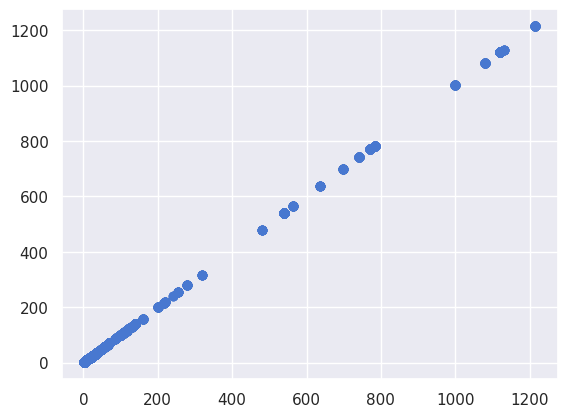

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(Xnorm, Ynorm, test_size=0.2, random_state=42)
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)
print('Трейн:', lin_reg2.score(X2_train, y2_train))
print('Тест:', lin_reg2.score(X2_test, y2_test))
y2pred_test = lin_reg2.predict(X2_test)
plt.scatter(y2pred_test, y2_test)

После удаления выбросов R-squared стал равен единице. Причем, как на тестовой, так и на обучающей выборке. Ошибка  - в минус 23 степени!

In [ ]:
comp = pd.DataFrame({'ygt': y2_test,'ypr': y2pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt          ypr         error
count  9458.000000  9458.000000  9.458000e+03
mean    107.447888   107.447888  1.462181e-23
std     242.999902   242.999902  1.692247e-23
min       2.290000     2.290000  0.000000e+00
25%       8.990000     8.990000  2.137273e-24
50%      24.990000    24.990000  8.322091e-24
75%      53.990000    53.990000  2.146227e-23
max    1214.850000  1214.850000  1.266750e-22

Дерево решений

Трейн: 1.0
Тест: 1.0


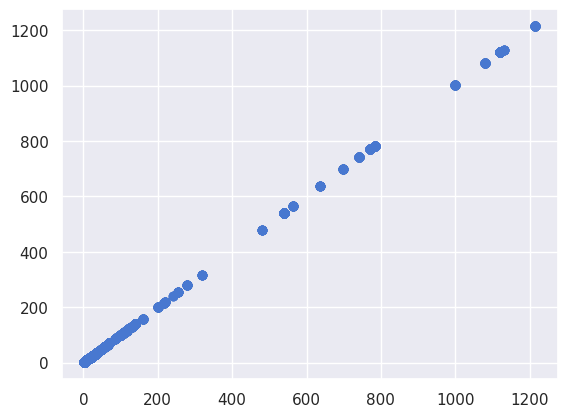

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X2_train, y2_train)
print('Трейн:', dt_reg.score(X2_train, y2_train))
print('Тест:', dt_reg.score(X2_test, y2_test))
y2pred_test = dt_reg.predict(X2_test)
plt.scatter(y2pred_test, y2_test)

Модель "дерево решений" выдает коэффициент детерминации, равный единице! Ошибка минимальная среди всех исследованных моделей.

In [ ]:
comp = pd.DataFrame({'ygt': y2_test,'ypr': y2pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt          ypr         error
count  9458.000000  9458.000000  9.458000e+03
mean    107.447888   107.447888  7.328402e-25
std     242.999902   242.999902  2.327924e-24
min       2.290000     2.290000  0.000000e+00
25%       8.990000     8.990000  2.019484e-28
50%      24.990000    24.990000  7.977277e-26
75%      53.990000    53.990000  1.465396e-25
max    1214.850000  1214.850000  1.494095e-23

Трейн: 1.0
Тест: 0.999999813325112


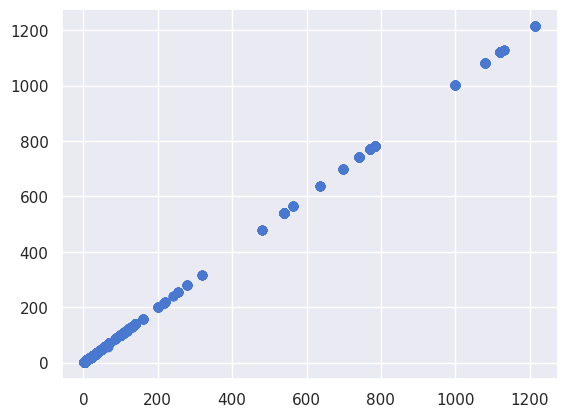

In [ ]:
from sklearn.tree import ExtraTreeRegressor
et_reg = ExtraTreeRegressor(random_state=0)
et_reg.fit(X2_train, y2_train)
print('Трейн:', et_reg.score(X2_train, y2_train))
print('Тест:', et_reg.score(X2_test, y2_test))
y2pred_test = et_reg.predict(X2_test)
plt.scatter(y2pred_test, y2_test)

Модель "Экстра Дерево решений" показала аналогичные результаты "Дереву решений"

In [ ]:
comp = pd.DataFrame({'ygt': y2_test,'ypr': y2pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt          ypr         error
count  9458.000000  9458.000000  9.458000e+03
mean    107.447888   107.448968  1.102179e-02
std     242.999902   242.999691  1.071894e+00
min       2.290000     2.290000  0.000000e+00
25%       8.990000     8.990000  8.077936e-28
50%      24.990000    24.990000  3.412928e-26
75%      53.990000    53.990000  1.465396e-25
max    1214.850000  1214.850000  1.042441e+02

Модель "Случайный лес" (RandomForestRegressor)

Трейн: 0.9999998397805462
Тест: 0.9999985230459177


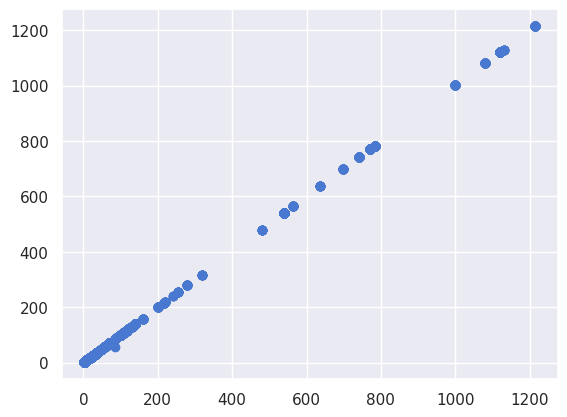

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=16, random_state=0)
rf_regr.fit(X2_train, y2_train)
print('Трейн:', rf_regr.score(X2_train, y2_train))
print('Тест:', rf_regr.score(X2_test, y2_test))
y2pred_test = rf_regr.predict(X2_test)
plt.scatter(y2pred_test, y2_test)

In [ ]:
comp = pd.DataFrame({'ygt': y2_test,'ypr': y2pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt          ypr         error
count  9458.000000  9458.000000  9.458000e+03
mean    107.447888   107.450925  8.720337e-02
std     242.999902   242.999426  8.480724e+00
min       2.290000     2.290000  0.000000e+00
25%       8.990000     8.990000  7.099748e-28
50%      24.990000    24.990000  6.108939e-27
75%      53.990000    53.990000  5.169879e-26
max    1214.850000  1214.850000  8.247695e+02

Градиентный бустинг

Трейн: 0.9999996536857259
Тест: 0.999998927435458


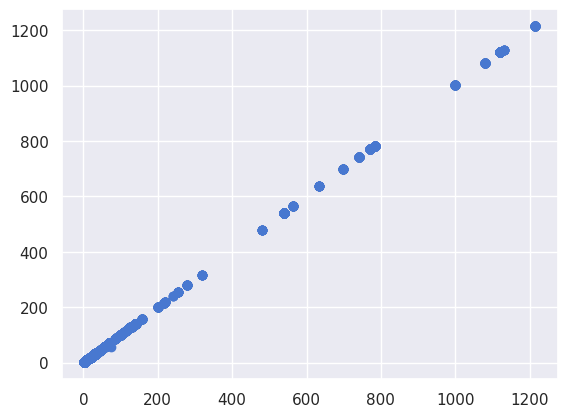

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X2_train, y2_train)
print('Трейн:', gb_reg.score(X2_train, y2_train))
print('Тест:', gb_reg.score(X2_test, y2_test))
y2pred_test = gb_reg.predict(X2_test)
plt.scatter(y2pred_test, y2_test)

In [ ]:
comp = pd.DataFrame({'ygt': y2_test,'ypr': y2pred_test})
comp['error'] = (comp['ygt'] - comp['ypr'])**2
comp.describe()

ygt          ypr         error
count  9458.000000  9458.000000  9.458000e+03
mean    107.447888   107.450612  6.332712e-02
std     242.999902   242.984640  4.157717e+00
min       2.290000     2.334672  8.016702e-07
25%       8.990000     9.008443  1.168071e-04
50%      24.990000    24.997471  4.592091e-04
75%      53.990000    53.998985  1.995627e-03
max    1214.850000  1214.716756  4.042163e+02

Модель "Градиентный бустинг" совсем немного отличается от рассмотренных выше моделей (коэффициент детерминации, ошибка немного больше, чем у "Дерева решений")

In [ ]:
df_reg = df_new[['product_id', 'promotion_id', 'territory_id',  'order_quantity', 'unit_price', 'total_cost', 'revenue', 'tax', 'year', 'month', 'm-status', 'gender', 'y_income', 'children_home','house', 'cars', 'distance', 'age', 'cost', 'days_manufacture','education_code', 'occupation_code', 'country_x', 'subcategory_code','category_code', 'productline_code']]

In [ ]:
X = df_reg.drop(columns = ['revenue'])
y = df_reg['revenue'][:48603]

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import shap

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

product_id = -0.00032
promotion_id = 0.09539
territory_id = -0.01199
order_quantity = 2.68742
unit_price = 0.54386
total_cost = 0.42116
tax = 8.70228
year = 2.66303
month = -0.01836
m-status = -0.1399
gender = -0.07244
y_income = -0.0
children_home = 0.05374
house = 0.0068
cars = 0.04849
distance = 0.0125
age = -0.00101
cost = -0.79413
days_manufacture = -1.41844
education_code = -0.02421
occupation_code = 0.00501
country_x = -0.01447
subcategory_code = 0.00042
category_code = 0.32876
productline_code = 0.23183


В модели линейной регрессии все числовые признаки имеют разный вес. Наибольшее влияние на выручку оказывали налоги, далее по значимости - количество товара, год покупки. Наблюдалась обратная зависимость выручки от сроков производства товара.

Величина коэффициента не всегда является хорошей мерой важности признака в линейной модели. Исходя из значений коэффициентов, возраст, ежемесячный доход, наличие детей, образование, профессиональная сфера, категория и подкатегория товара, а также его себестоимость не оказывали существенного влияния на выручку.

На выручку сильнее всего влияли: себестоимость, код товара, год, ценник, образование покупателя. В меньшей степени влияло наличие дома и семейный статус покупателя, категории м модельный ряд товаров, а также регионы проживания покупателей. Влияние остальных признаков не так ярко выражено. Абсолютно не влияли на выручку пколичество детей и пол покупателей. Результаты проведенных промо-акций, по-видимому, тоже не отличались.

<a href=#5>4.  Выводы</a><br>  



1. На основании анализа датасета был составлен портрет покупателя. Его можно использовать для разработки рекламных мероприятий. В частности, если лучшие клиенты – владельцы недвижимости, можно размещать рекламу на риэлторских сайтах. Так как подавляющее большинство клиентов – пожилые люди, можно договориться о перекрестной рекламе с онлайн-аптеками.

2. Так как все покупатели пользовались промокодами, и при увеличении их количества выручка росла, нужно и далее развивать эту тему, дабы стимулировать рост продаж. Пожилые клиенты могли бы получать промокоды не только онлайн, но и в пригородных супермаркетах, например.

3. Ввиду того, что продажи по выходным дням снижались, нужно активнее проводить рекламные мероприятия по их стимуляции именно в выходные дни («2-3% скидки при заказе онлайн в выходной», «купоны выходного дня» и т.п.).  Тоже самое касается и сезонных колебаний – нужно активнее проводить акции в периоды спада продаж: в начале феврале, конце апреля, июля и в начале октября.

4. Важно проводить более тщательную работу с клиентами сегментов «BEST» («чемпионы») и «лояльные». Поскольку сегмент «BEST» состоит из клиентов, которые чаще всех тратят деньги и могут легко адаптироваться к новым продуктам, к ним можно применять стратегии перекрестных продаж, знакомить с новинками; они должны чувствовать к себе особое отношение: их можно поздравлять с праздниками, приглашать на мероприятия.

5. Анализ 2016 года показал, что «уходящих» клиентов было в несколько раз больше «новых» - нужно срочно исправлять ситуацию, привлекая именно новых покупателей! В частности, если в датасете нет клиентов моложе 33 лет, нужно понять почему. Либо это ошибка в датасете, либо дело в плохой рекламе или в конкуренции, например, с электросамокатами из той же ценовой категории (расстояние до мили на электросамокатах преодолевать комфортнее). Если дело в рекламе, подумать о более эффективной, например, контекстной или у популярных блогеров.

6. Так как товары Long-Sleeve Logo Jersey и Short-Sleeve Classic Jersey отличались довольно низкой маржинальностью и реже продавались, возможно, стоит заменить их поставщика или рассмотреть другой дизайн, например, более модный, либо отказаться от логотипа, сделав их более универсальными. Совсем отказаться от спортивной одежды нельзя, так как ее часто заказывали совместно с другими товарами.

7. В виду того, что маржинальность дорогих моделей велосипедов была на 25-30% ниже остальных товаров, нужно ее повышать, по возможности снижая затраты и/или сроки изготовления. Хотя ассортимент и сбалансирован, стоит подумать о небольшом сужении модельного ряда туристических велосипедов. Как вариант, можно провести опрос потенциальных покупателей на предмет их популярности, цвета, дизайна, дабы потом сосредоточиться на более ходовых моделях.

8. Важно дополнительно проанализировать особенности продаж в Сиднее и Брисбене,  пока продажи там не начали заваливаться окончательно (тенденция уже прослеживается).

9. Нужно определиться с продажами в Канаде и окончательно решить: вкладывать средства в местную рекламу или нет. Маржинальность по Канаде хорошая, клиенты небедные, везде пропагандируется здоровый образ жизни, но продажи буксуют. Возможно, это плоды работы конкурентов, и/или недоработка отдела продаж.

10. С помощью библиотек sklearn и H2О созданы модели для предсказания выручки и прибыли, установлена степень влияния  на данные показатели признаков датасета. Все это можно использовать при выработке дальнейших маркетинговых мероприятий.